In [43]:
import math
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
import lightgbm as lgb
import seaborn as sns

In [44]:
xlsx_file = pd.ExcelFile('./2021-2022_O3&气象五参.xlsx')
sheet_names = xlsx_file.sheet_names
data = pd.DataFrame()

# datat= pd.read_excel('./预测数据.xlsx')
# datat

#得到2021和2022年的数据
df1 = xlsx_file.parse(sheet_names[0])
df2 = xlsx_file.parse(sheet_names[1])
data = pd.concat([df1,df2])
data = data.reset_index(drop=True)
# datat.info()
columns_to_interpolate = ['O3VAL', 'QIWENVAL', 'FSVAL', 'FXVAL', 'SHIDUVAL', 'YALIVAL']
for column in columns_to_interpolate:
        if column in data.columns:
            data[column] = data[column].interpolate(method='linear')

def daypart(hour):
    if hour in [2,3,4,5]:
        return "dawn"
    elif hour in [6,7,8,9]:
        return "morning"
    elif hour in [10,11,12,13]:
        return "noon"
    elif hour in [14,15,16,17]:
        return "afternoon"
    elif hour in [18,19,20,21]:
        return "evening"
    else: return "midnight"
data['C1705_DATETIME'] = pd.to_datetime(data['C1705_DATETIME'])
data['year'] = data.C1705_DATETIME.dt.year
data['month'] = data.C1705_DATETIME.dt.month
data['day'] = data.C1705_DATETIME.dt.day
data['hour'] = data.C1705_DATETIME.dt.hour
# data['weekday'] = data.C1705_DATETIME.dt.weekday
# data['day_of_Week'] = data.C1705_DATETIME.dt.dayofweek
to_one_hot = data['C1705_DATETIME'].dt.day_name()
# second: one hot encode to 7 columns
days = pd.get_dummies(to_one_hot)
#display data
for column in days.columns:
    data[column] = days[column]
    
raw_dayparts = data['hour'].apply(daypart)
# one hot encoding
dayparts = pd.get_dummies(raw_dayparts)
for column in dayparts.columns:
    data[column] = dayparts[column]


mask = data['O3VAL'] < 0  # 创建一个布尔掩码，表示负值
data.loc[mask, 'O3VAL'] *= -1  # 将负值取反
data1 = data[data['C0007_PNAME']=='八大关街道']
data2 = data[data['C0007_PNAME']=='北宅街道']
data3 = data[data['C0007_PNAME']=='登州路街道']
data4 = data[data['C0007_PNAME']=='上马街道']
data5 = data[data['C0007_PNAME']=='兴城路街道']


import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# data2['O3VAL'] = scaler.fit_transform(np.array(data2['O3VAL'].values.reshape(-1, 1)))
data3['QIWENVAL'] = scaler.fit_transform(np.array(data3['QIWENVAL'].values.reshape(-1, 1)))
data3['FSVAL'] = scaler.fit_transform(np.array(data3['FSVAL'].values.reshape(-1, 1)))
data3['FXVAL'] = scaler.fit_transform(np.array(data3['FXVAL'].values.reshape(-1, 1)))
data3['SHIDUVAL'] = scaler.fit_transform(np.array(data3['SHIDUVAL'].values.reshape(-1, 1)))
data3['YALIVAL'] = scaler.fit_transform(np.array(data3['YALIVAL'].values.reshape(-1, 1)))


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10568\905948625.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['QIWENVAL'] = scaler.fit_transform(np.array(data3['QIWENVAL'].values.reshape(-1, 1)))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10568\905948625.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['FSVAL'] = scaler.fit_transform(np.array(data3['FSVAL'].values.reshape(-1, 1)))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10568\905948625.py:70: SettingWithCopyWarning: 
A value is tr

In [45]:
datat= pd.read_excel('7.30预测.xls')
datat = datat[datat['C0007_PNAME'] == '登州路街道']
datat = datat.rename(columns={"TO_CHAR(H.C1705_DATETIME,'YYYY": '日期'})

zhihou = 28*24+1

datat

C0007_SUBSTATION_ID C0007_PNAME             日期  QIWENVAL  FSVAL  \
4333                13741       登州路街道  2024-04-01 00     7.916  2.284   
4334                13741       登州路街道  2024-04-01 01     7.978  2.169   
4335                13741       登州路街道  2024-04-01 02     7.867  1.693   
4336                13741       登州路街道  2024-04-01 03     7.892  1.801   
4337                13741       登州路街道  2024-04-01 04     7.816  2.004   
...                   ...         ...            ...       ...    ...   
6512                13741       登州路街道  2024-06-30 19    25.972  1.321   
6513                13741       登州路街道  2024-06-30 20    24.037  1.288   
6514                13741       登州路街道  2024-06-30 21    23.568  1.606   
6515                13741       登州路街道  2024-06-30 22    23.483  1.303   
6516                13741       登州路街道  2024-06-30 23    23.480  1.610   

        FXVAL  SHIDUVAL   YALIVAL  O3VAL  
4333  146.221    78.694  1008.948   66.0  
4334  138.333    80.788  1009.005   71.0  
4335  149.378    83.051  1009.131   71.0  
4336  144.087    85.234  1008.852   70.0  
4337  144.953    86.989  1008.809   62.0  
...       ...       ...       ...    ...  
6512  171.674    75.551   995.724  137.0  
6513  160.620    84.166   996.115  136.0  
6514  157.692    87.752   996.369  107.0  
6515  165.584    89.060   996.818   90.0  
6516      NaN    89.723   997.153   69.0  

[2184 rows x 9 columns]

In [46]:
datat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, 4333 to 6516
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   C0007_SUBSTATION_ID  2184 non-null   int64  
 1   C0007_PNAME          2184 non-null   object 
 2   日期                   2184 non-null   object 
 3   QIWENVAL             2175 non-null   float64
 4   FSVAL                2175 non-null   float64
 5   FXVAL                2138 non-null   float64
 6   SHIDUVAL             2175 non-null   float64
 7   YALIVAL              2175 non-null   float64
 8   O3VAL                2155 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 170.6+ KB


In [47]:
columns_to_interpolate = ['O3VAL', 'QIWENVAL', 'FSVAL', 'FXVAL', 'SHIDUVAL', 'YALIVAL']
for column in columns_to_interpolate:
    if column in datat.columns:
        datat[column] = datat[column].interpolate(method='linear')

In [48]:
datat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, 4333 to 6516
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   C0007_SUBSTATION_ID  2184 non-null   int64  
 1   C0007_PNAME          2184 non-null   object 
 2   日期                   2184 non-null   object 
 3   QIWENVAL             2184 non-null   float64
 4   FSVAL                2184 non-null   float64
 5   FXVAL                2184 non-null   float64
 6   SHIDUVAL             2184 non-null   float64
 7   YALIVAL              2184 non-null   float64
 8   O3VAL                2184 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 170.6+ KB


In [49]:
datat['日期'] = pd.to_datetime(datat['日期'])

In [50]:
for day in range(1, 31):
    # 格式化日期字符串
    formatted_day = f'{day:02d}'  # 确保天数始终是两位数
    date_str = f'06-{formatted_day}'
    
    # 过滤数据并打印形状
    filtered_data = datat[datat['日期'].dt.strftime('%m-%d') == date_str]
    print(f'Day {day}:', filtered_data.shape)

Day 1: (24, 9)
Day 2: (24, 9)
Day 3: (24, 9)
Day 4: (24, 9)
Day 5: (24, 9)
Day 6: (24, 9)
Day 7: (24, 9)
Day 8: (24, 9)
Day 9: (24, 9)
Day 10: (24, 9)
Day 11: (24, 9)
Day 12: (24, 9)
Day 13: (24, 9)
Day 14: (24, 9)
Day 15: (24, 9)
Day 16: (24, 9)
Day 17: (24, 9)
Day 18: (24, 9)
Day 19: (24, 9)
Day 20: (24, 9)
Day 21: (24, 9)
Day 22: (24, 9)
Day 23: (24, 9)
Day 24: (24, 9)
Day 25: (24, 9)
Day 26: (24, 9)
Day 27: (24, 9)
Day 28: (24, 9)
Day 29: (24, 9)
Day 30: (24, 9)


In [51]:
import os
import pandas as pd
def get_season(month):
    if month in [2, 3, 4]:
        return 1
    elif month in [5, 6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
    elif month in [12, 1]:
        return 4
def calculate_wind_speed(U, V):
    return np.sqrt(U**2 + V**2)   

def calculate_wind_direction(U, V):
    # 确保U和V没有缺失值
    U = np.nan_to_num(U)
    V = np.nan_to_num(V)
    direction = np.arctan2(U, V) * (180 / np.pi)  # 转换为角度
    direction = np.mod(direction + 360, 360)  # 确保风向在0到360度之间
    return direction

folder_path = "./wrfout/"
files = os.listdir(folder_path)
columns_to_convert = ['U10', 'V10', '气温开尔文', 'YALIVAL', 'SHIDUVAL']
df_list = []
date_format = "%Y-%m-%d_%H_%M_%S"
for file in files:
    # 获取完整路径
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, delimiter='\s+', header=None, engine='python',skiprows=1,
                       usecols=[0, 1, 2, 3, 5, 6, 7],
                       names=['日期', '站点', 'U10', 'V10', '气温开尔文', 'YALIVAL', 'SHIDUVAL'])
    data = data[data['站点'] == 'dengzhoulu']
    data['year'] = data['日期'].str[:4].astype(int)
    data['month'] = data['日期'].str[5:7].astype(int)
    data['day'] = data['日期'].str[8:10].astype(int)
    data['hour'] = data['日期'].str[11:13].astype(int)
    for column in columns_to_convert:
        data[column] = pd.to_numeric(data[column], errors='coerce')
        data['FSVAL'] = calculate_wind_speed(data['U10'], data['V10'])
        data['FXVAL'] = calculate_wind_direction(data['U10'], data['V10'])
    data['QIWENVAL'] = data['气温开尔文'] - 273.15
    columns_to_interpolate = ['O3VAL', 'QIWENVAL', 'FSVAL', 'FXVAL', 'SHIDUVAL', 'YALIVAL']
    for column in columns_to_interpolate:
        if column in data.columns:
            data[column] = data[column].interpolate(method='linear')
    data['日期'] = pd.to_datetime(data['日期'], format=date_format)
    df_list.append(data)

def is_weekend_series(series):
    def is_weekday(date):
        weekday = date.weekday()
        return weekday >= 5

    return series.apply(is_weekday)

df_list 

[                     日期          站点   U10   V10   气温开尔文  YALIVAL  SHIDUVAL  \
 2   2024-05-09 00:00:00  dengzhoulu -0.33  2.97  286.26  1020.35     82.03   
 7   2024-05-09 01:00:00  dengzhoulu -0.29  2.33  286.07  1020.68     80.16   
 12  2024-05-09 02:00:00  dengzhoulu -0.10  2.21  285.98  1020.65     79.16   
 17  2024-05-09 03:00:00  dengzhoulu  0.48  2.34  285.94  1020.67     75.59   
 22  2024-05-09 04:00:00  dengzhoulu  0.37  2.39  285.90  1021.03     67.99   
 ..                  ...         ...   ...   ...     ...      ...       ...   
 937 2024-05-16 19:00:00  dengzhoulu -4.86  2.34  286.73  1019.04     94.60   
 942 2024-05-16 20:00:00  dengzhoulu -4.06  2.76  286.90  1019.31     90.48   
 947 2024-05-16 21:00:00  dengzhoulu -2.47  2.95  286.63  1019.63     92.56   
 952 2024-05-16 22:00:00  dengzhoulu -2.47  3.62  286.63  1019.90     93.87   
 957 2024-05-16 23:00:00  dengzhoulu -3.51  3.60  286.49  1019.67     96.80   
 
      year  month  day  hour     FSVAL       FXVAL

In [52]:
from datetime import date
from datetime import date 
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(2 * np.pi * x / period))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(2 * np.pi * x / period))

cyclic_cossin_transformer = ColumnTransformer(
    transformers=[
        ("month_sin", sin_transformer(12), ["month"]),
        ("month_cos", cos_transformer(12), ["month"]),
        ("day_sin", sin_transformer(7), ["day"]),
        ("day_cos", cos_transformer(7), ["day"]),
        ("hour_sin", sin_transformer(24), ["hour"]),
        ("hour_cos", cos_transformer(24), ["hour"]),
    ],
    remainder=MinMaxScaler(),
)
o3_columns = ['O3VAL_' + str(i) for i in range(1,28*24+1)]
holidays_2024 = [
    "2024-01-01 00:00:00",  # 元旦
    "2024-02-10 00:00:00",  # 除夕
    "2024-02-11 00:00:00",  # 春节（初一）
    "2024-02-12 00:00:00",  # 春节（初二）
    "2024-02-13 00:00:00",  # 春节（初三）
    "2024-02-14 00:00:00",  # 春节（初四）
    "2024-02-15 00:00:00",  # 春节（初五）
    "2024-02-16 00:00:00",  # 春节（初六）
    "2024-04-04 00:00:00",  # 清明节
    "2024-05-01 00:00:00",  # 劳动节
    "2024-06-10 00:00:00",  # 端午节
    "2024-09-17 00:00:00",  # 中秋节
    "2024-10-01 00:00:00",  # 国庆节
    "2024-10-02 00:00:00",  # 国庆节
    "2024-10-03 00:00:00",  # 国庆节
    "2024-10-04 00:00:00",  # 国庆节
    "2024-10-05 00:00:00",  # 国庆节
    "2024-10-06 00:00:00",  # 国庆节
    "2024-10-07 00:00:00"   # 国庆节
]
datat['日期'] = pd.to_datetime(datat['日期'])
datat['year'] = datat.日期.dt.year
datat['month'] = datat.日期.dt.month
datat['day'] = datat.日期.dt.day
datat['hour'] = datat.日期.dt.hour

X_transformed = cyclic_cossin_transformer.fit_transform(datat[['month','day','hour']])
datat = datat.reset_index(drop=True)
X_transformed_df = pd.DataFrame(X_transformed, columns=['month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos'])
X_transformed_df = X_transformed_df.reset_index(drop=True)
datat = pd.concat([datat, X_transformed_df], axis=1)

datat['quarter']=datat['日期'].dt.quarter
datat['hour_section'] = (datat['hour'] // 6)
datat['diff'] = datat['日期'] - pd.Timestamp('2024-01-01')
datat['diff_hours'] = datat['diff'].values.astype("timedelta64[h]").astype('int')


datat['is_weekend'] = is_weekend_series(datat.日期)
datat['day_of_year'] = datat.日期.dt.dayofyear
datat['day_of_week'] = datat.日期.dt.dayofweek
datat['week_of_year'] = datat.日期.dt.isocalendar().week
datat['is_year_start']    = datat['日期'].dt.is_year_start
datat['is_year_end']    = datat['日期'].dt.is_year_end
datat['is_quarter_start'] = datat['日期'].dt.is_quarter_start 
datat['is_quarter_end'] = datat['日期'].dt.is_quarter_end
datat['is_month_start']   = datat['日期'].dt.is_month_start 
datat['is_month_end']     = datat['日期'].dt.is_month_end
datat['day_to_year_start'] = (datat['日期'] - pd.to_datetime(datat['日期'].dt.year, format='%Y')) / pd.Timedelta(days=1)
datat['is_holiday'] = datat['日期'].apply(lambda x: 1 if x in holidays_2024 else 0)
day_of_week = datat['日期'].dt.dayofweek
datat['day_to_weekend'] = (6 - day_of_week) % 7 
# datat1['O3_roll_mean_24'] = datat1['O3VAL'].rolling(window=24).mean()
# datat1['O3_roll_max_24'] = datat1['O3VAL'].rolling(window=24).max()
# datat1['O3_roll_min_24'] = datat1['O3VAL'].rolling(window=24).min()


columns_to_interpolate = ['O3VAL', 'QIWENVAL', 'FSVAL', 'FXVAL', 'SHIDUVAL', 'YALIVAL']
for column in columns_to_interpolate:
    if column in datat.columns:
        datat[column] = datat[column].interpolate(method='linear')


to_one_hot1 = datat['日期'].dt.day_name()
days1 = pd.get_dummies(to_one_hot1)
for column in days1.columns:
    datat[column] = days[column]
    
raw_dayparts = datat['hour'].apply(daypart)
dayparts = pd.get_dummies(raw_dayparts)
for column in dayparts.columns:
    datat[column] = dayparts[column]
datat['Trend'] = 0
datat['Seasonal'] = 0
# datat['O3VAL'] = np.sqrt(datat['O3VAL'])
# datat['O3_roll_mean_24'] = datat['O3VAL'].rolling(window=24).mean()
# datat['O3_roll_max_24'] = datat['O3VAL'].rolling(window=24).max()
# datat['O3_roll_min_24'] = datat['O3VAL'].rolling(window=24).min()

    
    # if row['日期'].strftime('%Y-%m-%d %H:%M:%S') == '2024-05-09 00:00:00':
    #     num = 1
    # # if row['日期'].strftime('%Y-%m-%d %H:%M:%S') == '2024-05-17 00:00:00':
    # #     num = 0   
    # if num != 0:
    #     if num > 24:
    #         row['O3_roll_mean_24'] = 0
    #         row['O3_roll_max_24'] = 0
    #         row['O3_roll_min_24'] = 0
    #     else:
    #         row['O3_roll_mean_24'] = datat.loc[index-num, 'O3_roll_mean_24']
    #         row['O3_roll_max_24'] = datat.loc[index-num, 'O3_roll_max_24']
    #         row['O3_roll_min_24'] = datat.loc[index-num, 'O3_roll_min_24']
    #     num += 1


In [53]:
datat

C0007_SUBSTATION_ID C0007_PNAME                  日期  QIWENVAL  FSVAL  \
0                   13741       登州路街道 2024-04-01 00:00:00     7.916  2.284   
1                   13741       登州路街道 2024-04-01 01:00:00     7.978  2.169   
2                   13741       登州路街道 2024-04-01 02:00:00     7.867  1.693   
3                   13741       登州路街道 2024-04-01 03:00:00     7.892  1.801   
4                   13741       登州路街道 2024-04-01 04:00:00     7.816  2.004   
...                   ...         ...                 ...       ...    ...   
2179                13741       登州路街道 2024-06-30 19:00:00    25.972  1.321   
2180                13741       登州路街道 2024-06-30 20:00:00    24.037  1.288   
2181                13741       登州路街道 2024-06-30 21:00:00    23.568  1.606   
2182                13741       登州路街道 2024-06-30 22:00:00    23.483  1.303   
2183                13741       登州路街道 2024-06-30 23:00:00    23.480  1.610   

        FXVAL  SHIDUVAL   YALIVAL  O3VAL  year  ...  Tuesday  Wednesday  \
0     146.221    78.694  1008.948   66.0  2024  ...    False      False   
1     138.333    80.788  1009.005   71.0  2024  ...    False      False   
2     149.378    83.051  1009.131   71.0  2024  ...    False      False   
3     144.087    85.234  1008.852   70.0  2024  ...    False      False   
4     144.953    86.989  1008.809   62.0  2024  ...    False      False   
...       ...       ...       ...    ...   ...  ...      ...        ...   
2179  171.674    75.551   995.724  137.0  2024  ...    False      False   
2180  160.620    84.166   996.115  136.0  2024  ...    False      False   
2181  157.692    87.752   996.369  107.0  2024  ...    False      False   
2182  165.584    89.060   996.818   90.0  2024  ...    False      False   
2183  165.584    89.723   997.153   69.0  2024  ...    False      False   

      afternoon   dawn  evening  midnight  morning   noon  Trend  Seasonal  
0         False  False    False      True    False  False      0         0  
1         False  False    False      True    False  False      0         0  
2         False   True    False     False    False  False      0         0  
3         False   True    False     False    False  False      0         0  
4         False   True    False     False    False  False      0         0  
...         ...    ...      ...       ...      ...    ...    ...       ...  
2179      False  False     True     False    False  False      0         0  
2180      False  False     True     False    False  False      0         0  
2181      False  False     True     False    False  False      0         0  
2182      False  False    False      True    False  False      0         0  
2183      False  False    False      True    False  False      0         0  

[2184 rows x 51 columns]

In [54]:
def add_columns(df):
    for i in range(1, 28*24+1):  # Loop through 1 to 24
        new_col_name = f"O3VAL_{i}"  # New column name based on index
        df[new_col_name] = df['O3VAL'].shift(i)
    # 结束之后
    # df.dropna(axis=0,
    #       how='any',
    #       subset=None,
    #       inplace=True)
    # for i in range(2, 7*24+1):
    #     old_col_name = f"O3VAL_{i-1}"
    #     cur_col_name = f"O3VAL_{i}"
    #     df[cur_col_name] = df[old_col_name] + df[cur_col_name]

    # sum = 0
    # label_sum = 1
    # for i in range(7*24 + 1, 28*24 + 1):
    #     # 构建列名
    #     col_name = f"WEEK_O3VAL_{label_sum}"
    #     del_col_name = f"O3VAL_{i}"
    #     fur_col_name = f"O3VAL_{i + 1}"
    #     if i == 7 * 24 + 7*24+1 or i == 7 * 24 + 14*24+1 or i == 7 * 24 + 21*24:
    #         del_col_name = f"WEEK_O3VAL_{label_sum -1}"
    #     # 累加本周的值
    #     if fur_col_name in df.columns:
    #         df[fur_col_name] = df[del_col_name] + df[fur_col_name]
    #     else:
    #         df[col_name] = df[del_col_name]
    #     del_col_name = f"O3VAL_{i}"
    #     # 计算累加和
    #     sum += 1
        
    #     # 如果累加到一周 (7 * 24 个时间步)
    #     if sum == 7 * 24:
    #         # 构建新特征列
    #         df[col_name] = df[del_col_name]
    #         # 重置累加器
    #         sum = 0
    #         label_sum += 1
    #     df.drop(del_col_name, axis=1, inplace=True)



# Call the function to add columns
add_columns(datat)
datat.dropna(axis=0,
          how='any',
          subset=None,
          inplace=True)
# datat['max_O3'] = datat[o3_columns].max(axis=1)
# datat['min_O3'] = datat[o3_columns].min(axis=1)
# datat['avg_O3'] = datat[o3_columns].mean(axis=1)
# datat['median_O3'] = datat[o3_columns].median(axis=1)
# datat['stddev_O3'] = datat[o3_columns].std(axis=1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10568\568507486.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df['O3VAL'].shift(i)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10568\568507486.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df['O3VAL'].shift(i)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10568\568507486.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

In [55]:
# Merge the DataFrames on the date
# pd.set_option('display.max_rows', None)  # 取消行数限制
# pd.set_option('display.max_columns', None)  # 取消列数限制
sta_data = pd.read_csv('sta.csv')
day_time_columns = ['dawn','morning','noon','afternoon','evening','midnight']
which_day = ['month_sin','month_cos','day_sin','day_cos','hour_sin','hour_cos','diff_hours', 'hour_section','quarter','is_weekend', 'day_of_year', 'day_of_week',  
               'is_year_start', 'is_year_end', 'is_quarter_start', 'is_quarter_end',
               'is_month_start', 'is_month_end', 'day_to_year_start', 'is_holiday', 'day_to_weekend']
windows_columns = ['max_O3','min_O3','avg_O3','median_O3','stddev_O3']
# windows_o3 = ['O3_roll_mean_24','O3_roll_max_24','O3_roll_min_24']
merged_df_list = [] 
X_list = []
y_list = []
for i in range(len(df_list)):
    merged_df = pd.merge_asof(df_list[i], datat[['日期', 'O3VAL','Trend','Seasonal']+o3_columns+which_day], left_on='日期', right_on='日期', direction='nearest')
    # merged_df['O3VAL'] = scaler.fit_transform(np.array(merged_df['O3VAL'].values.reshape(-1, 1)))

    # merged_df['QIWENVAL'] = scaler.fit_transform(np.array(merged_df['QIWENVAL'].values.reshape(-1, 1)))
    # merged_df['FSVAL'] = scaler.fit_transform(np.array(merged_df['FSVAL'].values.reshape(-1, 1)))
    # merged_df['FXVAL'] = scaler.fit_transform(np.array(merged_df['FXVAL'].values.reshape(-1, 1)))
    # merged_df['SHIDUVAL'] = scaler.fit_transform(np.array(merged_df['SHIDUVAL'].values.reshape(-1, 1)))
    # merged_df['YALIVAL'] = scaler.fit_transform(np.array(merged_df['YALIVAL'].values.reshape(-1, 1)))

    # merged_df['O3VAL'] = np.sqrt(merged_df['O3VAL'])
    merged_df_list.append(merged_df)
    X = merged_df[['year', 'month', 'day', 'hour'] +o3_columns+which_day+['QIWENVAL'	,'FSVAL'	,'SHIDUVAL'	,'YALIVAL']]
    y = merged_df['O3VAL']
    X = pd.merge(X , sta_data, on=['month', 'day', 'hour'], how='left')
    # X['max_O3'] = np.sqrt(X['max_O3'])
    # X['min_O3'] = np.sqrt(X['min_O3'])
    # X['avg_O3'] = np.sqrt(X['avg_O3'])
    # X['median_O3'] = np.sqrt(X['median_O3'])
    # X['stddev_O3'] = np.sqrt(X['stddev_O3'])
    X_list.append(X)
    y_list.append(y)
    print(X)


     year  month  day  hour  O3VAL_1  O3VAL_2  O3VAL_3  O3VAL_4  O3VAL_5  \
0    2024      5    9     0    132.0    140.0    119.0    138.0    157.0   
1    2024      5    9     1    134.0    132.0    140.0    119.0    138.0   
2    2024      5    9     2    108.0    134.0    132.0    140.0    119.0   
3    2024      5    9     3     82.0    108.0    134.0    132.0    140.0   
4    2024      5    9     4     67.0     82.0    108.0    134.0    132.0   
..    ...    ...  ...   ...      ...      ...      ...      ...      ...   
187  2024      5   16    19    160.0    168.0    172.0    172.0    144.0   
188  2024      5   16    20    156.0    160.0    168.0    172.0    172.0   
189  2024      5   16    21    149.0    156.0    160.0    168.0    172.0   
190  2024      5   16    22    139.0    149.0    156.0    160.0    168.0   
191  2024      5   16    23    137.0    139.0    149.0    156.0    160.0   

     O3VAL_6  ...  day_to_weekend  QIWENVAL     FSVAL  SHIDUVAL  YALIVAL  \
0      170.

In [56]:
model = lgb.Booster(model_file='lgb_first_attempt2.txt')

In [57]:
y_pred_list = []
import random
for i in range(len(X_list)):
    y_pred = np.array([])
    X_test = X_list[i].values
    for i, x in enumerate(X_test):
        y_pred = np.append(y_pred, model.predict(x.reshape(1, -1)))
        for j in range(1,min(28*24+1, len(X_test) - i)):  # Loop through 1 to 48
            # if 0.8 < random.random():
                X_test[i+j,3+j]= y_pred[i]
    y_pred_list.append(y_pred)
    # data2['max_O3'] = data1[o3_columns].max(axis=1)
    # data2['min_O3'] = data1[o3_columns].min(axis=1)
    # data1['avg_O3'] = data1[o3_columns].mean(axis=1)
    # data1['median_O3'] = data1[o3_columns].median(axis=1)
    # data1['stddev_O3'] = data1[o3_columns].std(axis=1)
    # y_pred = np.append(y_pred, model.predict(x.reshape(1, -1)))
    # old_sum = 0
    # if i != 0:
    #     if i < 7 * 24 + 5:
    #         old_sum = X_test[i, i-1]
    #     else:
    #         old_sum = X_test[7 * 24 + 5, 7 * 24 + 4]
    # for j in range(1, 7*24+1):
    #     if i + j < 8 * 24:
    #         if j == 1:
    #             X_test[i+j, 4+j] = y_pred[i]
    #         else:
    #             X_test[i+j, 4+j] = X_test[i+j, 4+j] - old_sum + y_pred[i]
    # for j in range(3):
    #     if i + j < 8 * 24:
    #         X_test[i+j, 173 +j] = X_test[i+j, 173 +j] - old_sum +  y_pred[i]

    
    

    # for j in range(1,min(171, len(X_test) - i)): # Loop through 1 to 48
    #     X_test[i+j, 4+j] = y_pred[i] 


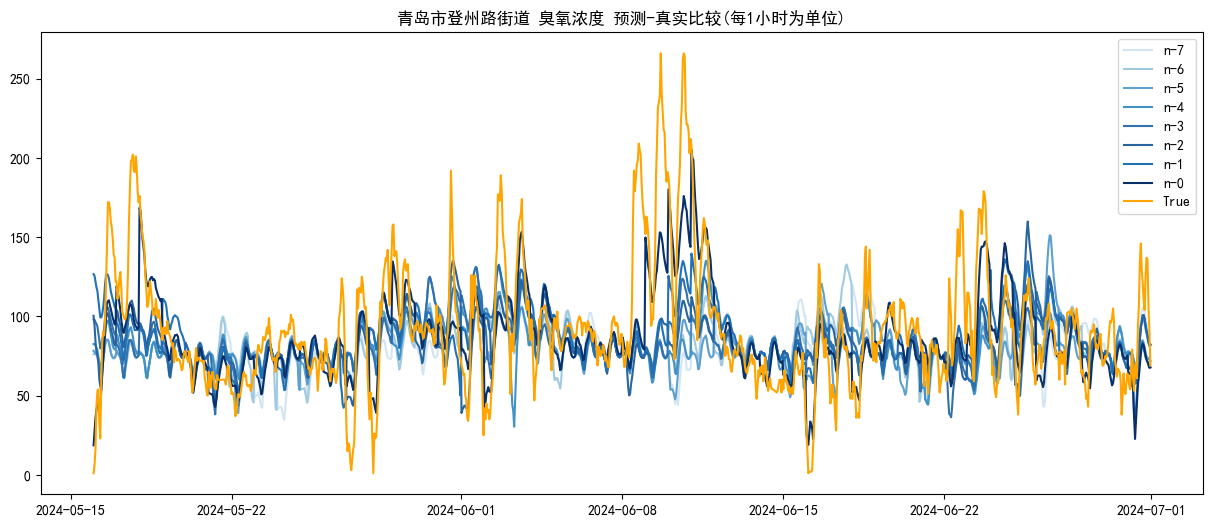

n-7 MASE: 42.47711614563071
n-7 R2: -0.12984910132290728
n-6 MASE: 41.74782436453736
n-6 R2: -0.09138527998825308
n-5 MASE: 39.93032834203187
n-5 R2: 0.0015733624167902915
n-4 MASE: 39.95294319031454
n-4 R2: 0.0004421089641504228
n-3 MASE: 38.19087764785738
n-3 R2: 0.08666589674399539
n-2 MASE: 36.813792880670775
n-2 R2: 0.15134431322509423
n-1 MASE: 35.83318578444851
n-1 R2: 0.1959533643295277
n-0 MASE: 27.76131852752632
n-0 R2: 0.5173963804018438


In [58]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.dates as mdates
from datetime import datetime, timedelta
date_range_list = []
start_date111 = datetime(2024, 5, 16, 0, 0, 0) 
end_date111 = datetime(2024, 6, 30, 23, 0, 0)
true_value_list = []
date_range111 = pd.date_range(start=start_date111, end=end_date111, freq='H')
merged_data = pd.merge(pd.DataFrame(date_range111, columns=['日期']), datat, on='日期', how='inner')

true_value_list = merged_data['O3VAL'].tolist()

start_date = datetime(2024, 5, 16, 0, 0, 0) 
end_date = datetime(2024, 5, 16, 23, 0, 0)
while end_date < datetime(2024, 7, 1, 0, 0, 0):
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    date_range_list.append(date_range)
    end_date += timedelta(hours=1)
    start_date = end_date
    end_date += timedelta(days=1)
    end_date -= timedelta(hours=1)

num = 0
colors = [
 '#d3e5f3','#a1cae1', 
    '#5d9fcd', '#4292c6',  '#3171ad',
    '#2864a0', '#2171b5',   '#08306b','orange'
]
true_legend_added = 0 
pred_value_list_7 = np.array([])
pred_value_list_6 = np.array([])
pred_value_list_5 = np.array([])
pred_value_list_4 = np.array([])
pred_value_list_3 = np.array([])
pred_value_list_2 = np.array([])
pred_value_list_1 = np.array([])
pred_value_list_0 = np.array([])

for date_ranges in date_range_list:
    num = 7
    for i in range(len(df_list)):
        is_in_list = df_list[i]['日期'].isin(date_ranges)
        rmse_list = []
        r2_list = []
        if is_in_list.any():
            matching_indices = df_list[i].index[is_in_list].tolist()
            matching_values = df_list[i].loc[is_in_list, '日期'].tolist()
            if num == 7:
                pred_value_list_7 = np.concatenate((pred_value_list_7, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
            elif num == 6:
                pred_value_list_6 = np.concatenate((pred_value_list_6, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
            elif num == 5:
                pred_value_list_5 = np.concatenate((pred_value_list_5, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
            elif num == 4:
                pred_value_list_4 = np.concatenate((pred_value_list_4, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
            elif num == 3:
                pred_value_list_3 = np.concatenate((pred_value_list_3, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
            elif num == 2:
                pred_value_list_2 = np.concatenate((pred_value_list_2, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
            elif num == 1:
                pred_value_list_1 = np.concatenate((pred_value_list_1, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
            elif num == 0:
                pred_value_list_0 = np.concatenate((pred_value_list_0, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
            num-=1



plt.figure(figsize=(15, 6))
plt.title("青岛市登州路街道 臭氧浓度 预测-真实比较(每1小时为单位)")
plt.plot(date_range111,pred_value_list_7,color=colors[0], label='n-7')
plt.plot(date_range111,pred_value_list_6,color=colors[1], label='n-6')
plt.plot(date_range111,pred_value_list_5,color=colors[2], label='n-5')
plt.plot(date_range111,pred_value_list_4,color=colors[3], label='n-4')
plt.plot(date_range111,pred_value_list_3,color=colors[4], label='n-3')
plt.plot(date_range111,pred_value_list_2,color=colors[5], label='n-2')
plt.plot(date_range111,pred_value_list_1,color=colors[6], label='n-1')
plt.plot(date_range111,pred_value_list_0,color=colors[7], label='n-0')
plt.plot(date_range111,true_value_list,color=colors[-1], label='True')
plt.legend()
plt.show()   


print('n-7 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_7)))
print('n-7 R2:',r2_score(true_value_list, pred_value_list_7))
print('n-6 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_6)))
print('n-6 R2:',r2_score(true_value_list, pred_value_list_6))
print('n-5 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_5)))
print('n-5 R2:',r2_score(true_value_list, pred_value_list_5))
print('n-4 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_4)))
print('n-4 R2:',r2_score(true_value_list, pred_value_list_4))
print('n-3 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_3)))
print('n-3 R2:',r2_score(true_value_list, pred_value_list_3))
print('n-2 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_2)))
print('n-2 R2:',r2_score(true_value_list, pred_value_list_2))
print('n-1 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_1)))
print('n-1 R2:',r2_score(true_value_list, pred_value_list_1))
print('n-0 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_0)))
print('n-0 R2:',r2_score(true_value_list, pred_value_list_0))

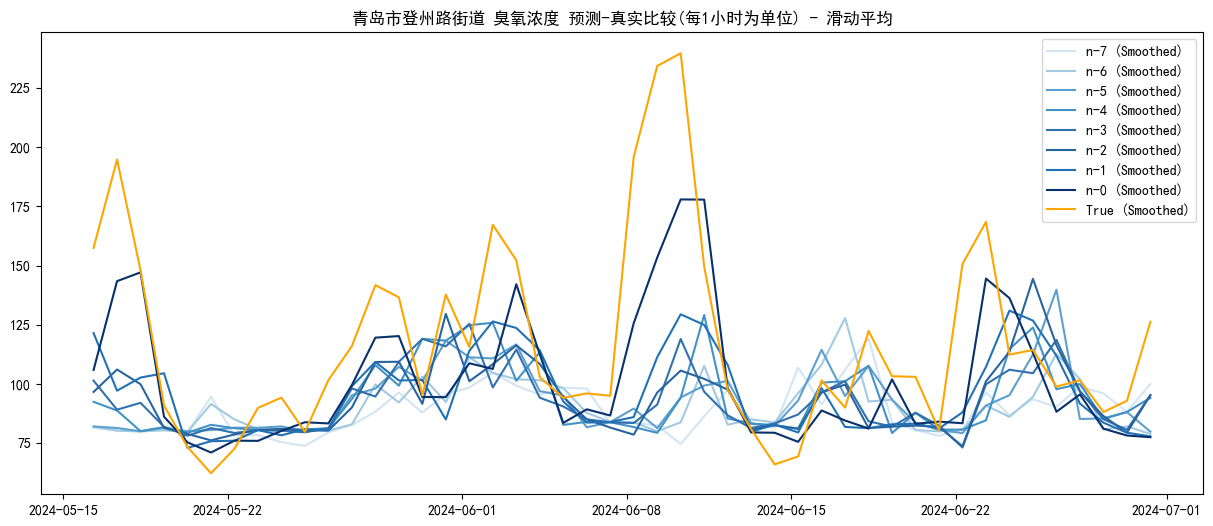

n-7 RMSE: 51.56775130098789
n-7 R2: -0.5738653451970219
n-6 RMSE: 51.13860390667641
n-6 R2: -0.5477788951309226
n-5 RMSE: 48.584245331308686
n-5 R2: -0.3970183405156491
n-4 RMSE: 47.50662353464355
n-4 R2: -0.33573256685726305
n-3 RMSE: 45.57129455908274
n-3 R2: -0.22911895784972103
n-2 RMSE: 44.68605321504488
n-2 R2: -0.18183046835133143
n-1 RMSE: 40.76939176196298
n-1 R2: 0.016261541856099737
n-0 RMSE: 29.620540840596828
n-0 R2: 0.48072531196182144


In [59]:
def sliding_window_average(data, window_size):
    # 保存滑动平均值的列表
    averaged_data = []
    # 用滑动窗口计算平均值
    len1 = len(data)
    for i in range(len1 - window_size + 1):
        avg = np.mean(data[i:i + window_size])
        averaged_data.append(avg)
    return averaged_data


def max_values(data, interval):
    averaged_data = []
    for i in range(0, len(data), 24):
        avg = max(data[i:i+interval])
        averaged_data.append(avg)
    return averaged_data
# 使用滑动窗口大小为8来计算滑动平均值
window_size = 8

# 对每个预测值列表应用滑动窗口函数
smoothed_pred_value_list_7 = sliding_window_average(pred_value_list_7, window_size)
smoothed_pred_value_list_6 = sliding_window_average(pred_value_list_6, window_size)
smoothed_pred_value_list_5 = sliding_window_average(pred_value_list_5, window_size)
smoothed_pred_value_list_4 = sliding_window_average(pred_value_list_4, window_size)
smoothed_pred_value_list_3 = sliding_window_average(pred_value_list_3, window_size)
smoothed_pred_value_list_2 = sliding_window_average(pred_value_list_2, window_size)
smoothed_pred_value_list_1 = sliding_window_average(pred_value_list_1, window_size)
smoothed_pred_value_list_0 = sliding_window_average(pred_value_list_0, window_size)

# 对真实值列表应用滑动窗口函数
smoothed_true_value_list = sliding_window_average(true_value_list, window_size)

# 再次应用 max_values 函数
interval = 24
smoothed_pred_value_list_7 = max_values(smoothed_pred_value_list_7, interval)
smoothed_pred_value_list_6 = max_values(smoothed_pred_value_list_6, interval)
smoothed_pred_value_list_5 = max_values(smoothed_pred_value_list_5, interval)
smoothed_pred_value_list_4 = max_values(smoothed_pred_value_list_4, interval)
smoothed_pred_value_list_3 = max_values(smoothed_pred_value_list_3, interval)
smoothed_pred_value_list_2 = max_values(smoothed_pred_value_list_2, interval)
smoothed_pred_value_list_1 = max_values(smoothed_pred_value_list_1, interval)
smoothed_pred_value_list_0 = max_values(smoothed_pred_value_list_0, interval)

# 由于 max_values 可能会减少列表长度，我们也需要对 smoothed_true_value_list 应用相同的操作
smoothed_true_value_list = max_values(smoothed_true_value_list, interval)

# 获取用于绘图的时间范围，减去窗口大小 + 1，以匹配滑动平均后的长度
# 并且需要进一步减去由 max_values 函数导致的长度减少
smoothed_date_range111 = date_range111[window_size - 1::interval]

plt.figure(figsize=(15, 6))
plt.title("青岛市登州路街道 臭氧浓度 预测-真实比较(每1小时为单位) - 滑动平均")
plt.plot(smoothed_date_range111, smoothed_pred_value_list_7, color=colors[0], label='n-7 (Smoothed)')
plt.plot(smoothed_date_range111, smoothed_pred_value_list_6, color=colors[1], label='n-6 (Smoothed)')
plt.plot(smoothed_date_range111, smoothed_pred_value_list_5, color=colors[2], label='n-5 (Smoothed)')
plt.plot(smoothed_date_range111, smoothed_pred_value_list_4, color=colors[3], label='n-4 (Smoothed)')
plt.plot(smoothed_date_range111, smoothed_pred_value_list_3, color=colors[4], label='n-3 (Smoothed)')
plt.plot(smoothed_date_range111, smoothed_pred_value_list_2, color=colors[5], label='n-2 (Smoothed)')
plt.plot(smoothed_date_range111, smoothed_pred_value_list_1, color=colors[6], label='n-1 (Smoothed)')
plt.plot(smoothed_date_range111, smoothed_pred_value_list_0, color=colors[7], label='n-0 (Smoothed)')
plt.plot(smoothed_date_range111, smoothed_true_value_list, color=colors[-1], label='True (Smoothed)')
plt.legend()
plt.show()

# 计算滑动平均后的性能指标
print('n-7 RMSE:', np.sqrt(mean_squared_error(smoothed_true_value_list, smoothed_pred_value_list_7)))
print('n-7 R2:', r2_score(smoothed_true_value_list, smoothed_pred_value_list_7))
print('n-6 RMSE:', np.sqrt(mean_squared_error(smoothed_true_value_list, smoothed_pred_value_list_6)))
print('n-6 R2:', r2_score(smoothed_true_value_list, smoothed_pred_value_list_6))
print('n-5 RMSE:', np.sqrt(mean_squared_error(smoothed_true_value_list, smoothed_pred_value_list_5)))
print('n-5 R2:', r2_score(smoothed_true_value_list, smoothed_pred_value_list_5))
print('n-4 RMSE:', np.sqrt(mean_squared_error(smoothed_true_value_list, smoothed_pred_value_list_4)))
print('n-4 R2:', r2_score(smoothed_true_value_list, smoothed_pred_value_list_4))
print('n-3 RMSE:', np.sqrt(mean_squared_error(smoothed_true_value_list, smoothed_pred_value_list_3)))
print('n-3 R2:', r2_score(smoothed_true_value_list, smoothed_pred_value_list_3))
print('n-2 RMSE:', np.sqrt(mean_squared_error(smoothed_true_value_list, smoothed_pred_value_list_2)))
print('n-2 R2:', r2_score(smoothed_true_value_list, smoothed_pred_value_list_2))
print('n-1 RMSE:', np.sqrt(mean_squared_error(smoothed_true_value_list, smoothed_pred_value_list_1)))
print('n-1 R2:', r2_score(smoothed_true_value_list, smoothed_pred_value_list_1))
print('n-0 RMSE:', np.sqrt(mean_squared_error(smoothed_true_value_list, smoothed_pred_value_list_0)))
print('n-0 R2:', r2_score(smoothed_true_value_list, smoothed_pred_value_list_0))

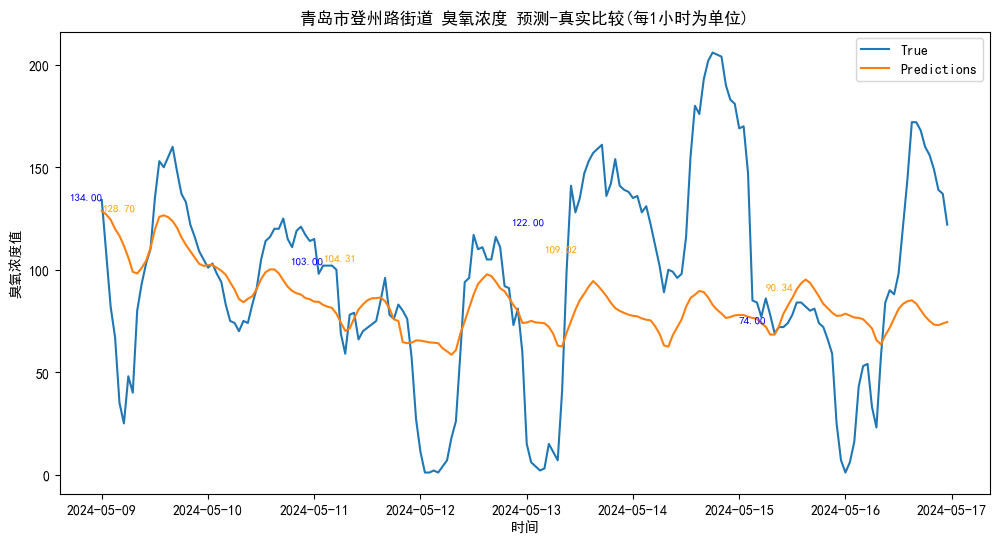

rmse: 46.954318370267124
r2 score: 0.06289052824365438
all
rmse: 46.954318370267124
r2 score: 0.06289052824365438
all-1
rmse: 46.60229225969225
r2 score: 0.08339911889297791
all-2
rmse: 36.971544606303105
r2 score: 0.290999032288046


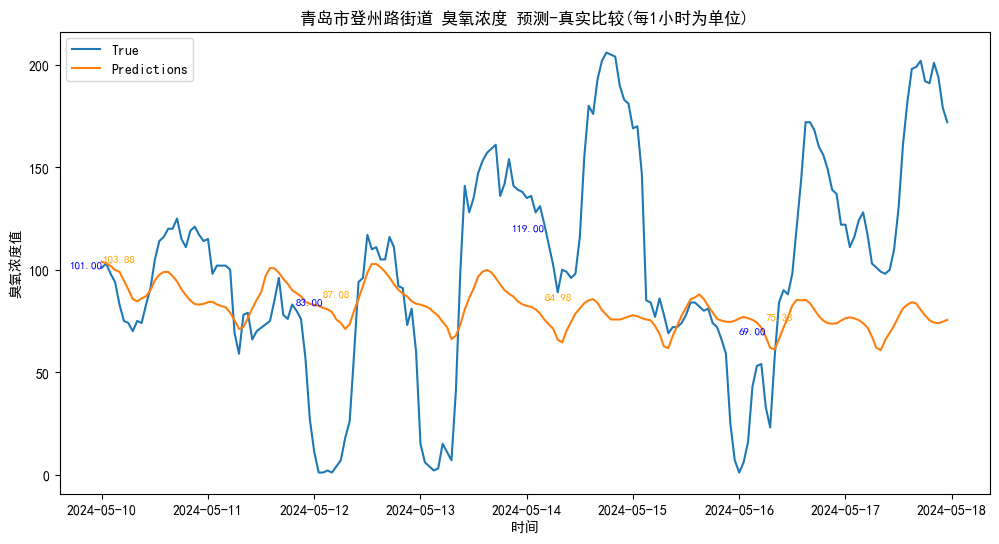

rmse: 54.37167469862584
r2 score: -0.11811540360964301
all
rmse: 54.37167469862584
r2 score: -0.11811540360964301
all-1
rmse: 48.123537315600885
r2 score: 0.008125091699567877
all-2
rmse: 50.268652630060565
r2 score: -0.003452401780621006


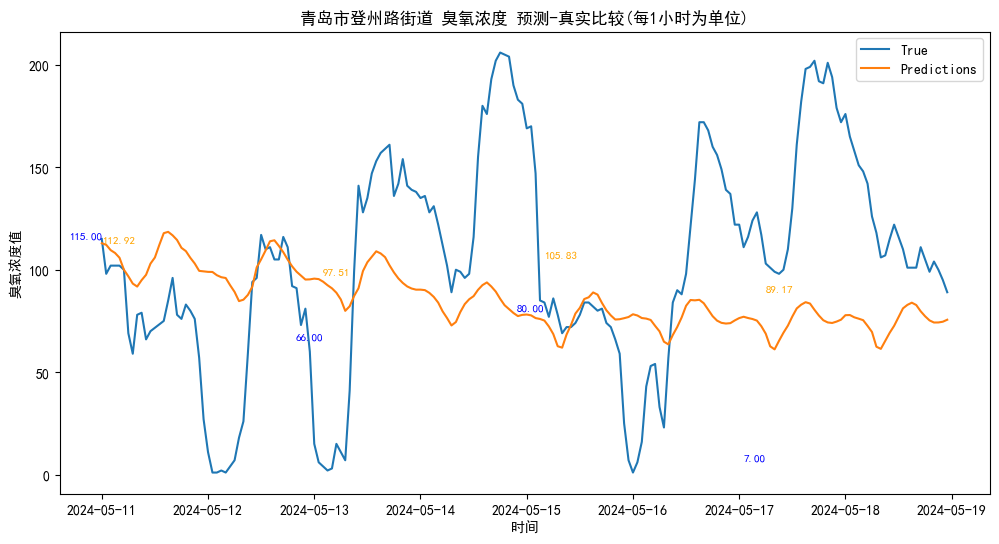

rmse: 57.77396620696007
r2 score: -0.2313559549079116
all
rmse: 57.77396620696007
r2 score: -0.2313559549079116
all-1
rmse: 54.16675548762795
r2 score: -0.04902017849511253
all-2
rmse: 53.58322124557025
r2 score: -0.05273954011282633


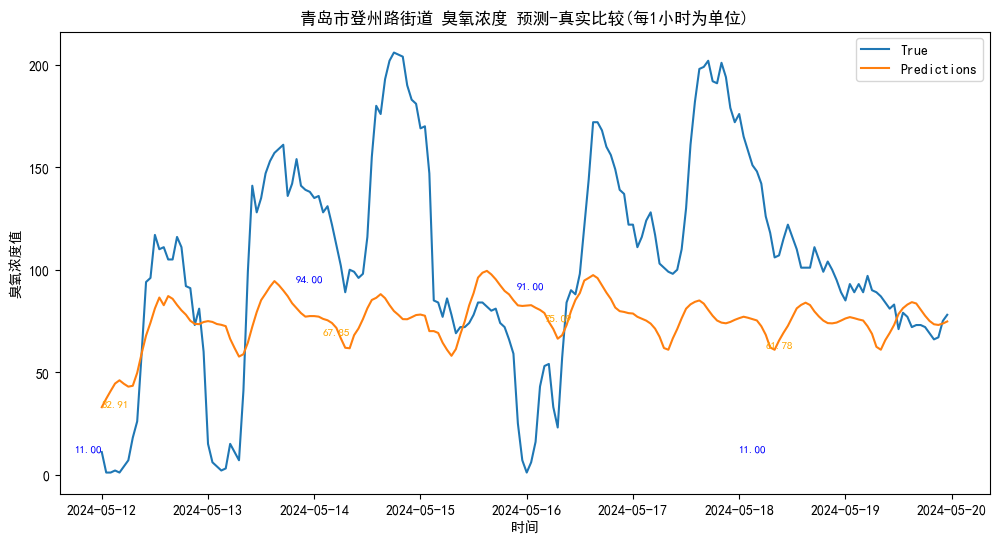

rmse: 55.101327392578646
r2 score: -0.1349358710170565
all
rmse: 55.101327392578646
r2 score: -0.1349358710170565
all-1
rmse: 59.84124842048774
r2 score: -0.07573677998915063
all-2
rmse: 54.787722331713276
r2 score: 0.07518211273063502


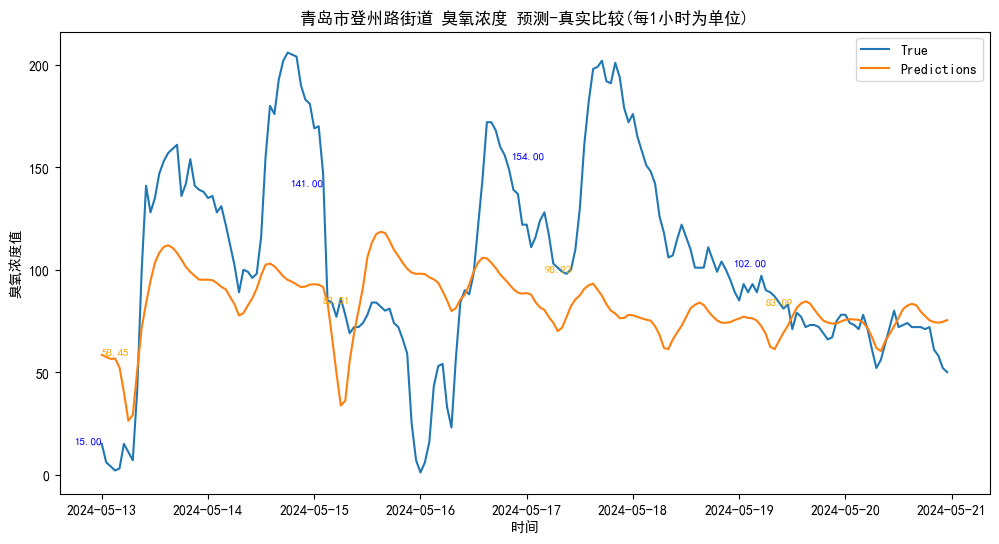

rmse: 49.382446033507634
r2 score: -0.025314320740423613
all
rmse: 49.382446033507634
r2 score: -0.025314320740423613
all-1
rmse: 56.59645645758959
r2 score: -0.17151641953047458
all-2
rmse: 57.651224141593545
r2 score: -0.05106645077795502


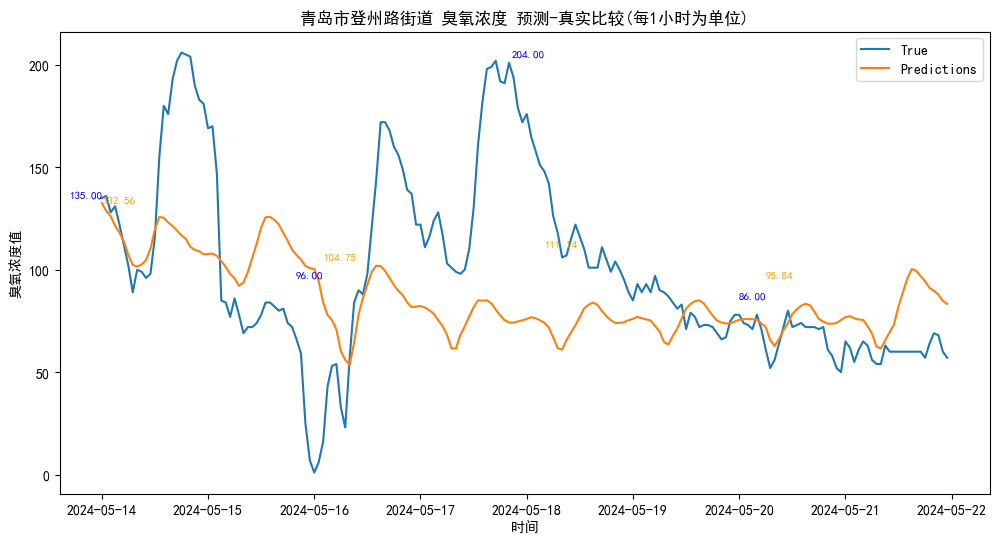

rmse: 46.129519534041044
r2 score: -0.03096603229496986
all
rmse: 46.129519534041044
r2 score: -0.03096603229496986
all-1
rmse: 52.23032102568959
r2 score: -0.26199218247336553
all-2
rmse: 56.90556576356844
r2 score: -0.3838292244095507


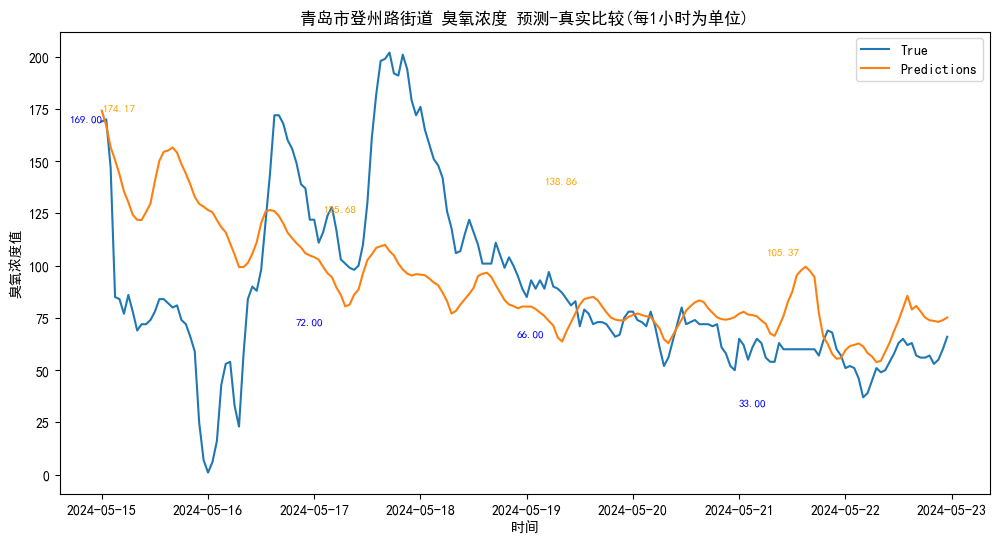

rmse: 41.64034731276619
r2 score: -0.014263172946340719
all
rmse: 41.64034731276619
r2 score: -0.014263172946340719
all-1
rmse: 46.85207101461782
r2 score: -0.19661121154931194
all-2
rmse: 51.11964763924946
r2 score: -0.3347047691142826


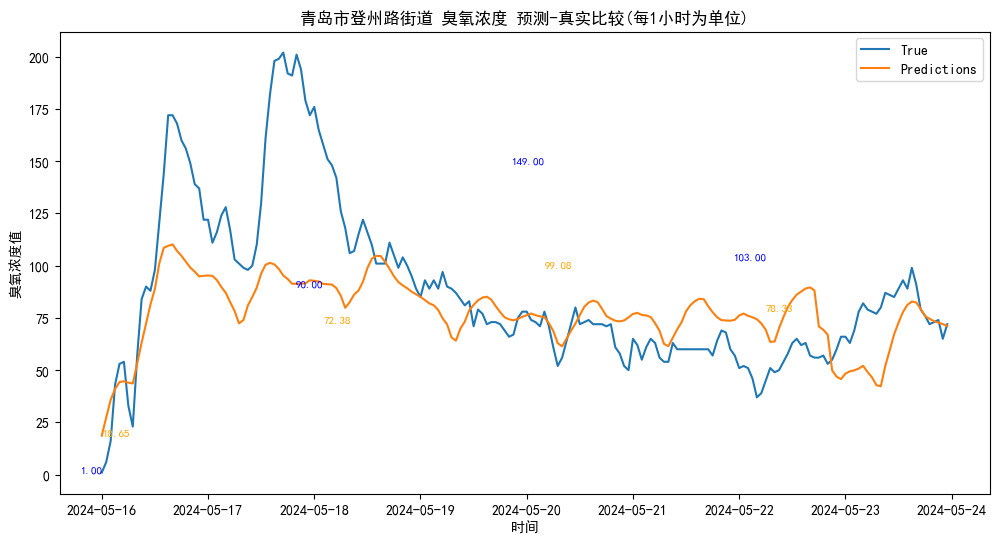

rmse: 32.51660928443146
r2 score: 0.32648333896892334
all
rmse: 32.51660928443146
r2 score: 0.32648333896892334
all-1
rmse: 35.33485707822265
r2 score: 0.3118192384738552
all-2
rmse: 38.07617386102882
r2 score: 0.23183198802532556


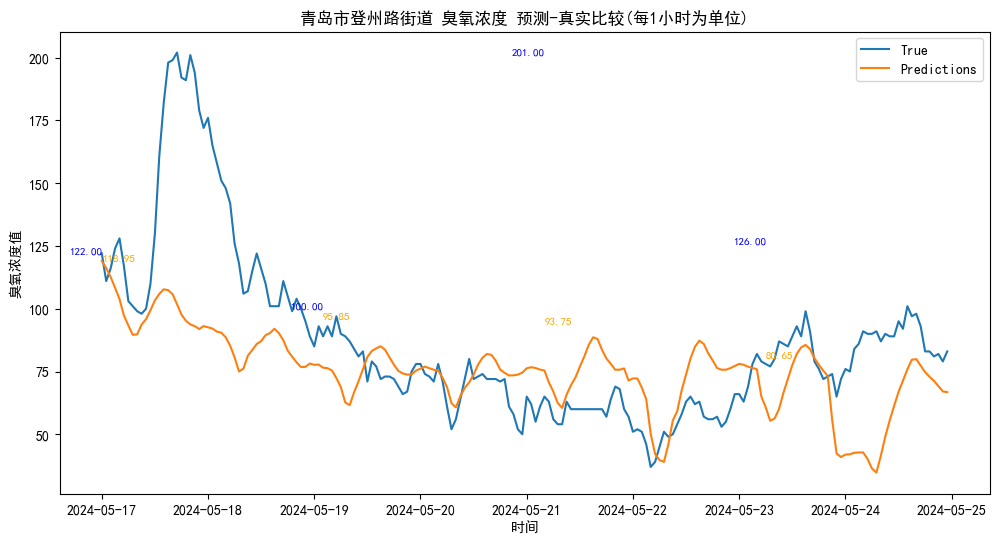

rmse: 30.8585000469612
r2 score: 0.18975146952978628
all
rmse: 30.8585000469612
r2 score: 0.18975146952978628
all-1
rmse: 32.42227533640579
r2 score: 0.3148603404476591
all-2
rmse: 34.654901681565036
r2 score: 0.22468199179356108


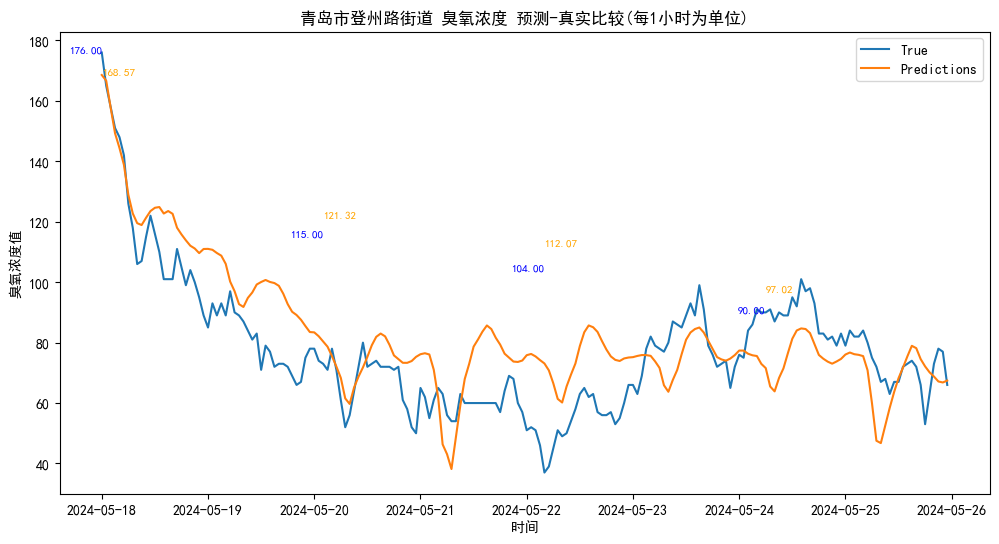

rmse: 14.592300327099535
r2 score: 0.5514382355706153
all
rmse: 14.592300327099535
r2 score: 0.5514382355706153
all-1
rmse: 15.298313107981926
r2 score: 0.6061493421037754
all-2
rmse: 16.245892065933237
r2 score: 0.6203455718785846


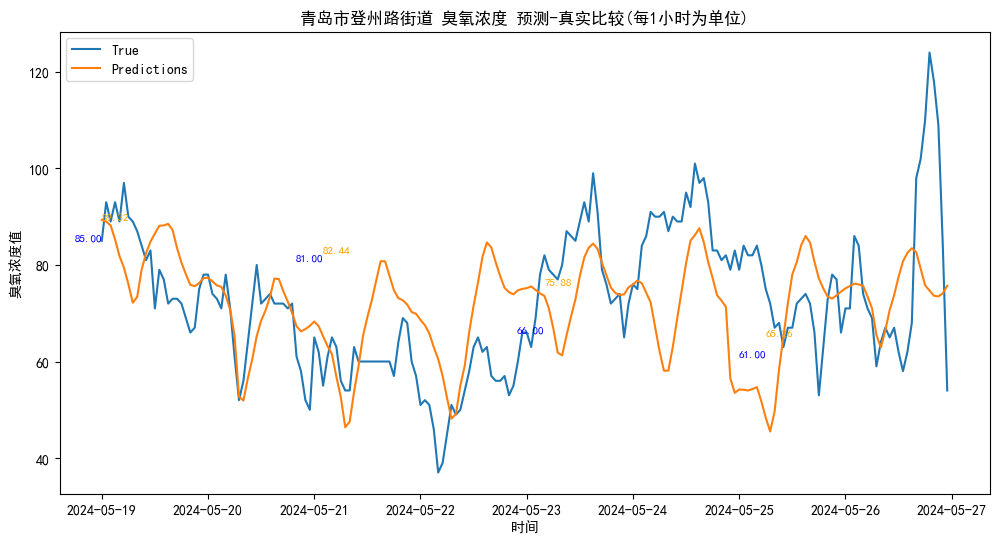

rmse: 14.692802811211182
r2 score: -0.018770273081704092
all
rmse: 14.692802811211182
r2 score: -0.018770273081704092
all-1
rmse: 12.723717550912461
r2 score: 0.1851860737727562
all-2
rmse: 11.413885003598063
r2 score: 0.22359820292005683


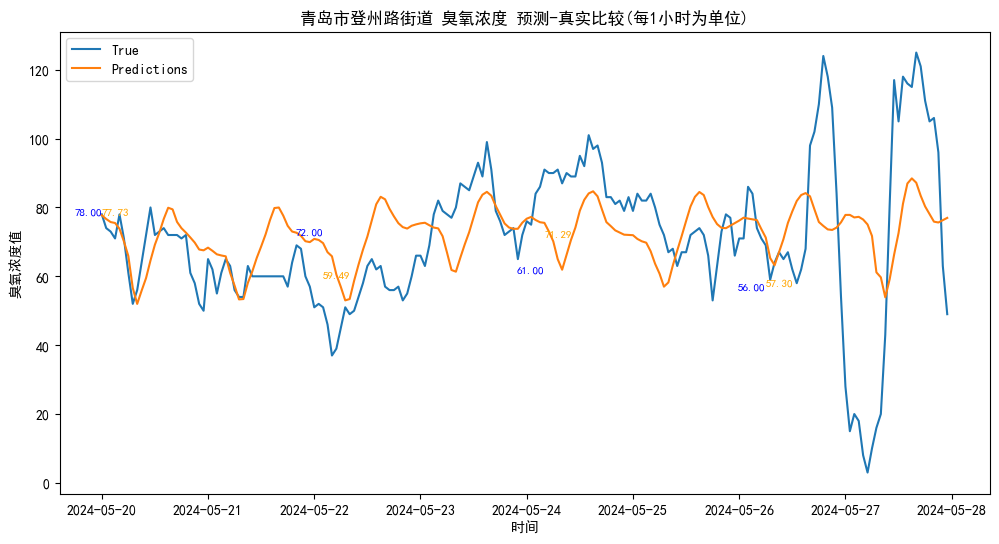

rmse: 20.014452658034497
r2 score: 0.109660229747221
all
rmse: 20.014452658034497
r2 score: 0.109660229747221
all-1
rmse: 12.469818618029437
r2 score: 0.1368555245199835
all-2
rmse: 12.655497325645822
r2 score: 0.2141597384348558


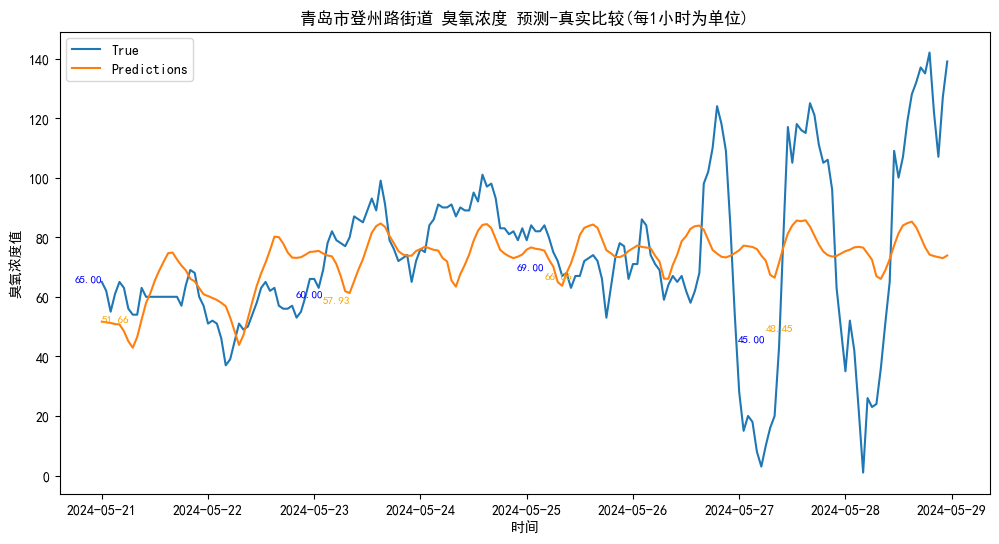

rmse: 24.997858937954764
r2 score: 0.14140481872829647
all
rmse: 24.997858937954764
r2 score: 0.14140481872829647
all-1
rmse: 13.600324520580676
r2 score: 0.23777975837533516
all-2
rmse: 11.63889648710937
r2 score: 0.3224242344754268


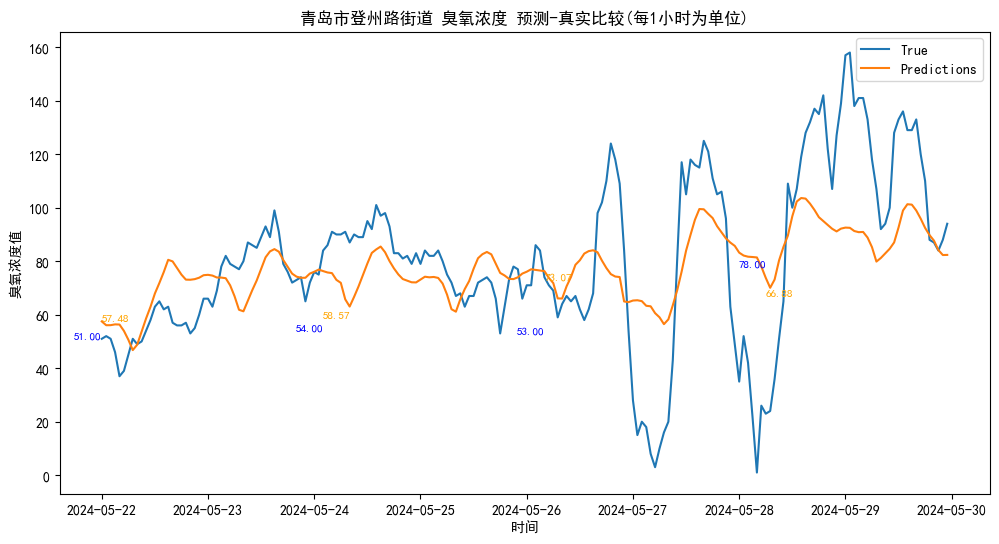

rmse: 24.62846549358553
r2 score: 0.37889072235217236
all
rmse: 24.62846549358553
r2 score: 0.37889072235217236
all-1
rmse: 18.90098466271465
r2 score: 0.3622481209581092
all-2
rmse: 14.042794844715326
r2 score: 0.22928386367242615


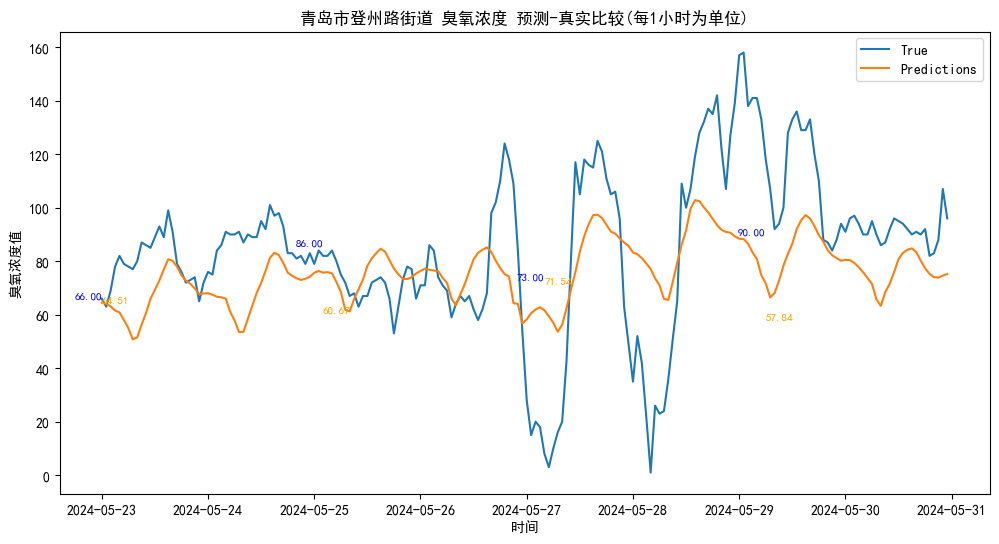

rmse: 26.60419138725754
r2 score: 0.19873384029865482
all
rmse: 26.60419138725754
r2 score: 0.19873384029865482
all-1
rmse: 25.033470290350145
r2 score: 0.26096659044783743
all-2
rmse: 21.522948217834976
r2 score: 0.19091272613880061


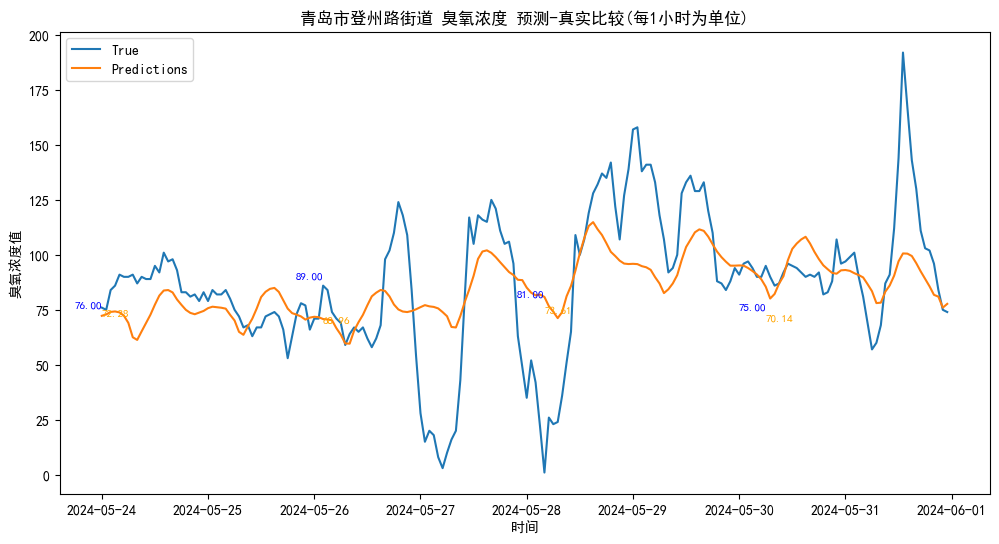

rmse: 26.346927305907677
r2 score: 0.32564821260455
all
rmse: 26.346927305907677
r2 score: 0.32564821260455
all-1
rmse: 27.662570179543827
r2 score: 0.33243247320442626
all-2
rmse: 27.10660167769716
r2 score: 0.2656543432430747


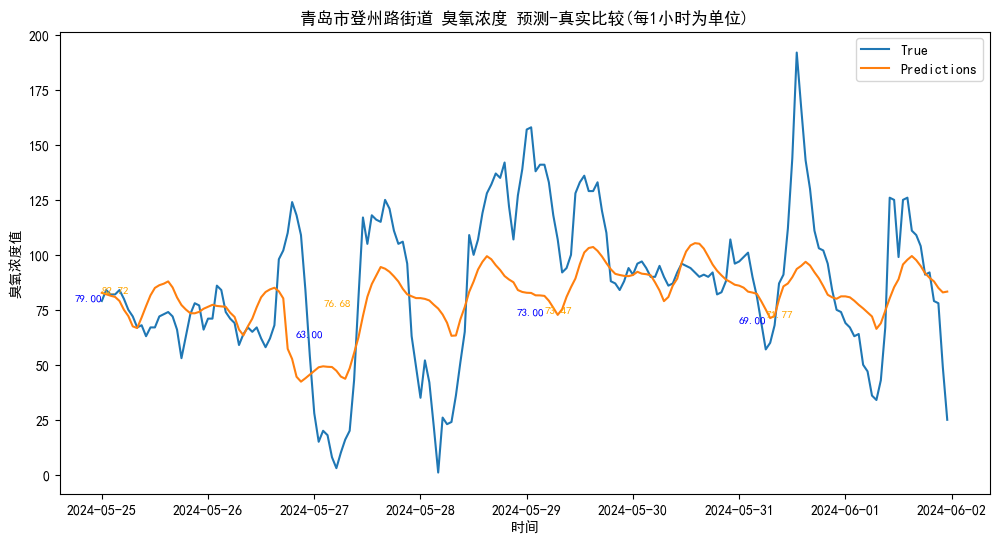

rmse: 28.603576944270277
r2 score: 0.2923768553194426
all
rmse: 28.603576944270277
r2 score: 0.2923768553194426
all-1
rmse: 28.530221815653803
r2 score: 0.29219393889827505
all-2
rmse: 31.015498770768914
r2 score: 0.29492778471739367


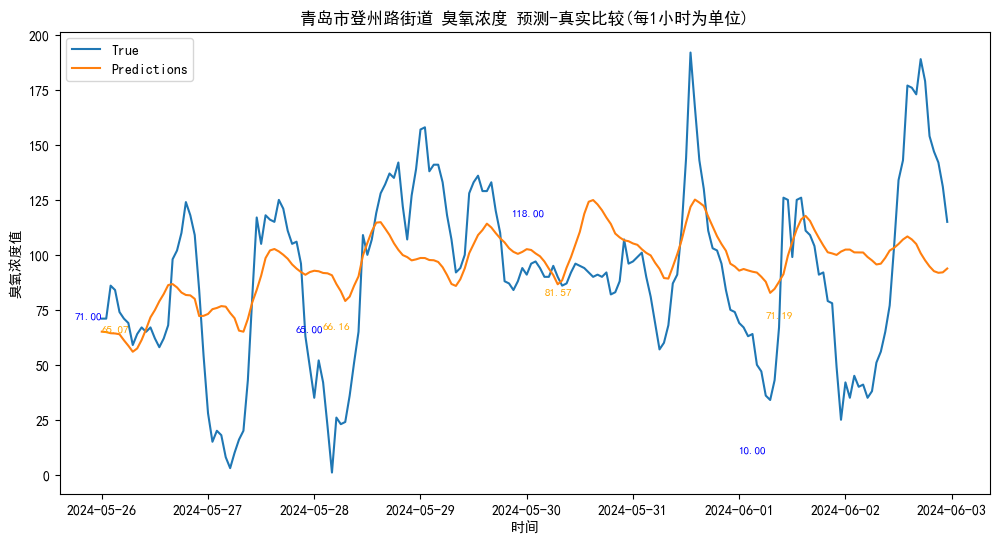

rmse: 34.441607117651266
r2 score: 0.22547828191476804
all
rmse: 34.441607117651266
r2 score: 0.22547828191476804
all-1
rmse: 29.868183007887016
r2 score: 0.3197007838157362
all-2
rmse: 30.942011700502103
r2 score: 0.27976970121805045


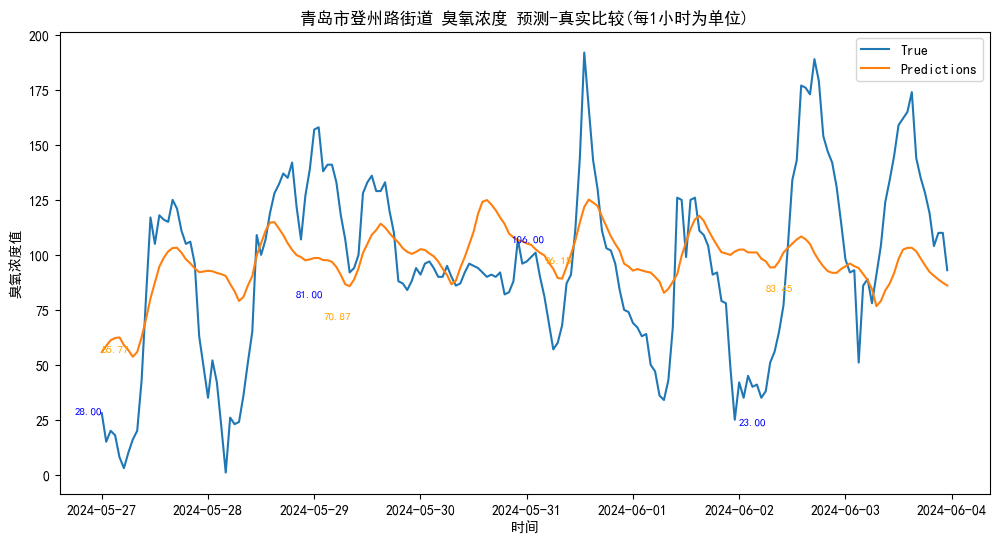

rmse: 35.18903035070775
r2 score: 0.24744686678369587
all
rmse: 35.18903035070775
r2 score: 0.24744686678369587
all-1
rmse: 30.428013349410183
r2 score: 0.3441154809355057
all-2
rmse: 29.90717567808115
r2 score: 0.3893911363355731


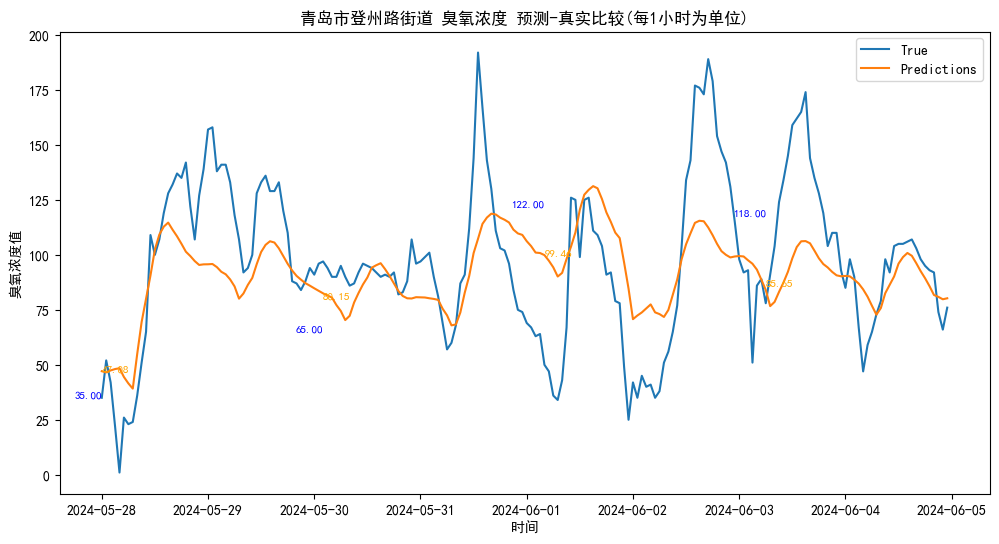

rmse: 29.311245137250776
r2 score: 0.35490487653112013
all
rmse: 29.311245137250776
r2 score: 0.35490487653112013
all-1
rmse: 30.238837014036474
r2 score: 0.38732811259177835
all-2
rmse: 27.52450329332127
r2 score: 0.3477685731218797


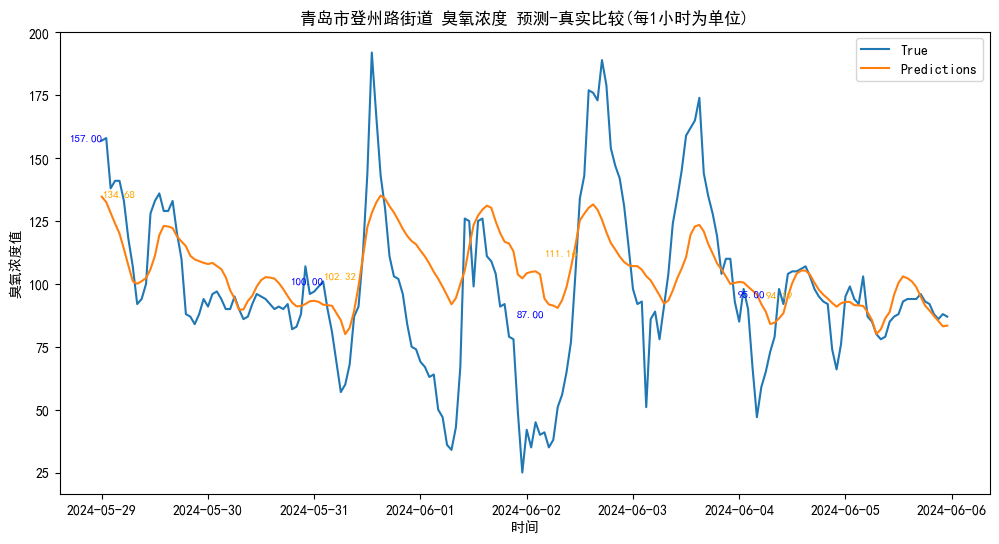

rmse: 26.59375404626387
r2 score: 0.3200226728227449
all
rmse: 26.59375404626387
r2 score: 0.3200226728227449
all-1
rmse: 29.816558798446405
r2 score: 0.3098524400734409
all-2
rmse: 30.40229092250325
r2 score: 0.2930410481395599


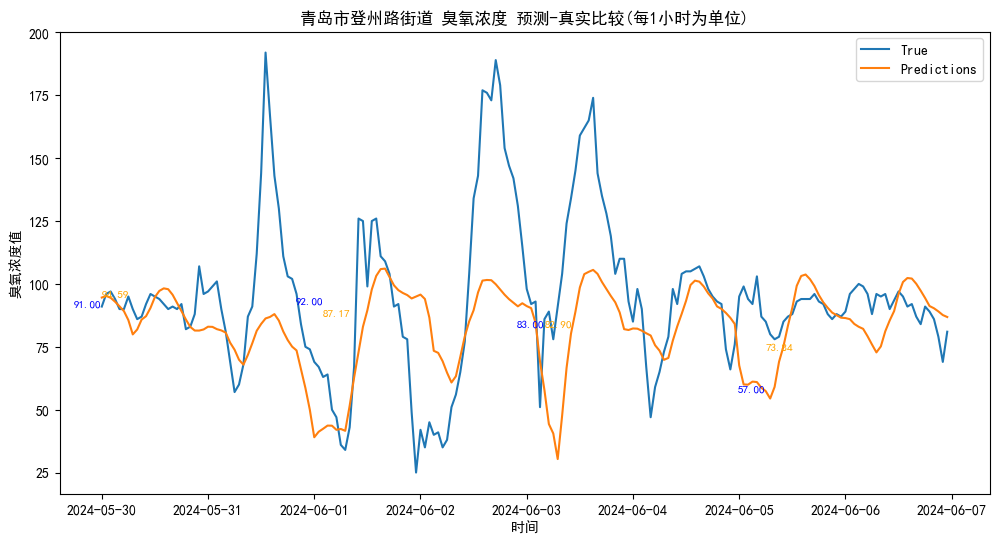

rmse: 29.526487377026378
r2 score: 0.06074450688012989
all
rmse: 29.526487377026378
r2 score: 0.06074450688012989
all-1
rmse: 32.75701294536763
r2 score: 0.11618409554605558
all-2
rmse: 35.45136301056448
r2 score: 0.08784344303519953


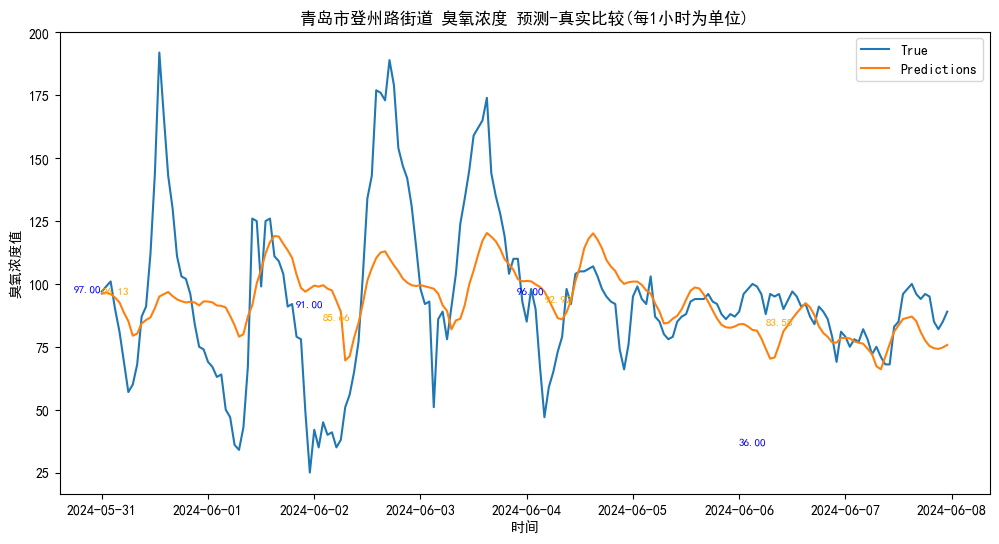

rmse: 27.224017417318517
r2 score: 0.22015171454161686
all
rmse: 27.224017417318517
r2 score: 0.22015171454161686
all-1
rmse: 30.775848766360596
r2 score: 0.223260504212755
all-2
rmse: 33.646656851224584
r2 score: 0.21764405791250163


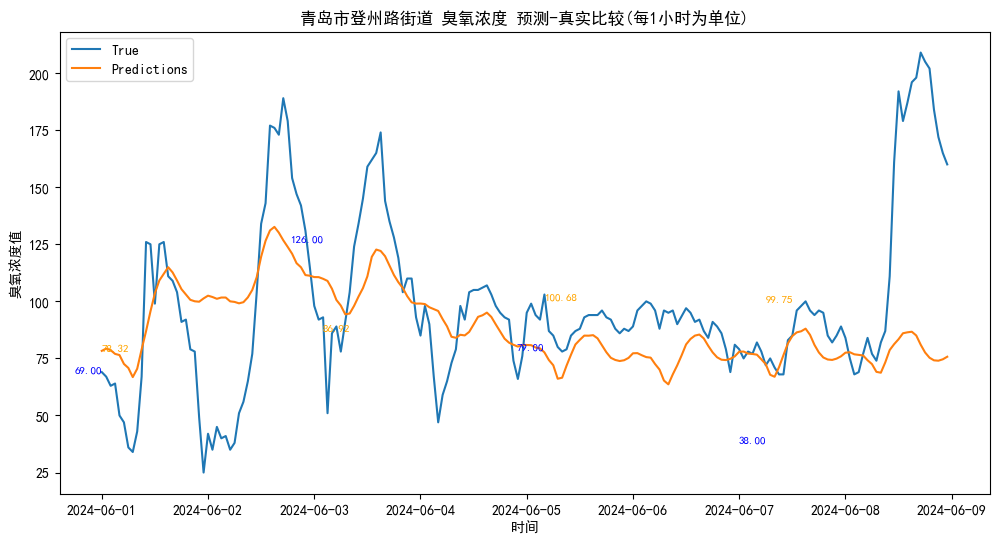

rmse: 36.4841537117576
r2 score: 0.04400730776678041
all
rmse: 36.4841537117576
r2 score: 0.04400730776678041
all-1
rmse: 26.952282709162578
r2 score: 0.30593227661052624
all-2
rmse: 28.465639211463547
r2 score: 0.3481117114085156


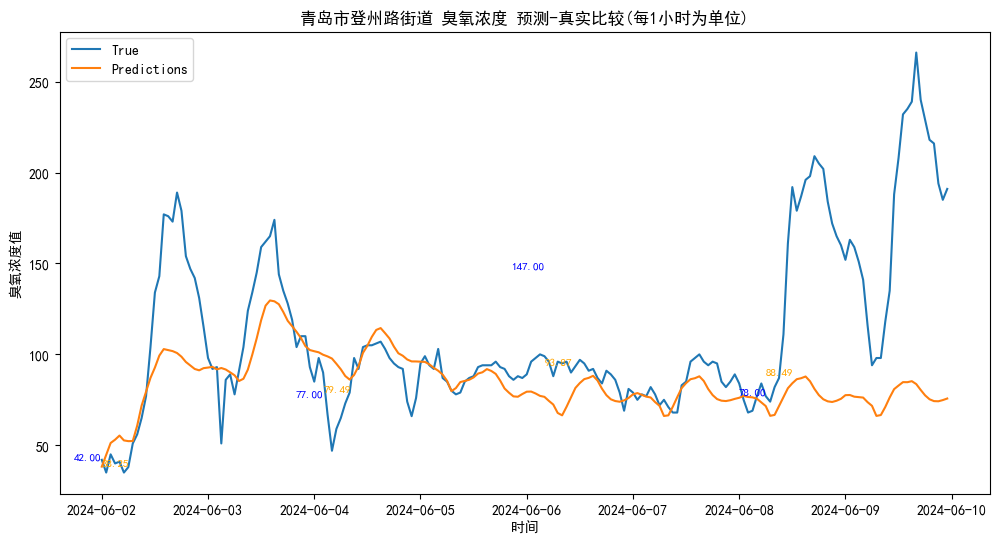

rmse: 52.096539737480484
r2 score: -0.24947579008777132
all
rmse: 52.096539737480484
r2 score: -0.24947579008777132
all-1
rmse: 22.992823714879425
r2 score: 0.3951124714765343
all-2
rmse: 24.842117249352533
r2 score: 0.38177003848385005


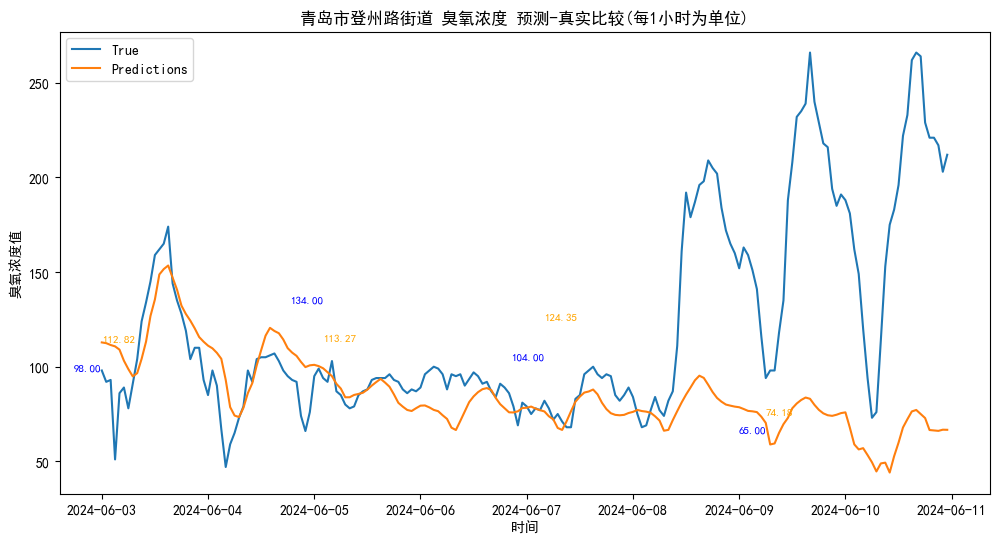

rmse: 67.48067269520934
r2 score: -0.6641635540526132
all
rmse: 67.48067269520934
r2 score: -0.6641635540526132
all-1
rmse: 33.347685770798755
r2 score: -0.008809394520186808
all-2
rmse: 15.109824745405847
r2 score: 0.4510561529782633


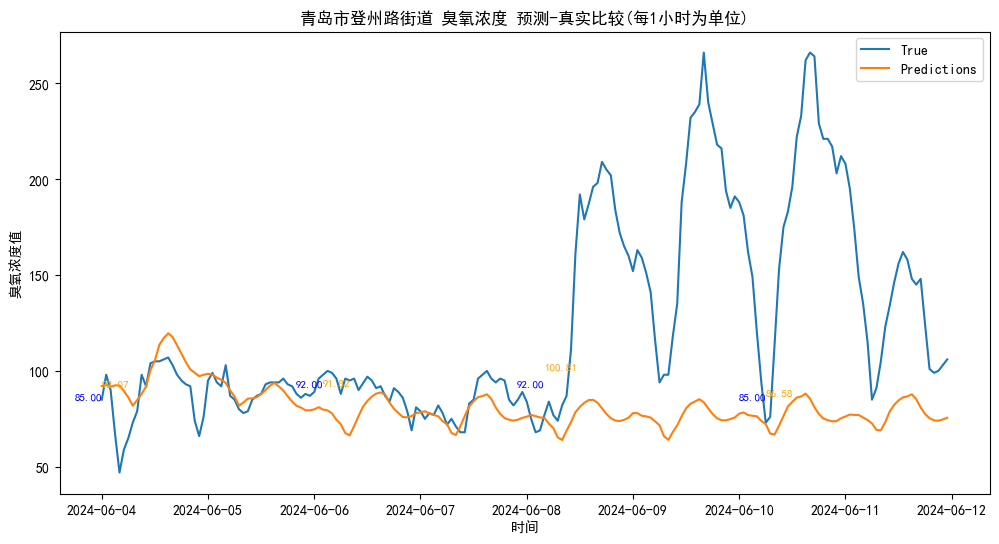

rmse: 68.48600027582594
r2 score: -0.6994477544099718
all
rmse: 68.48600027582594
r2 score: -0.6994477544099718
all-1
rmse: 56.99748686506477
r2 score: -0.46725715226006526
all-2
rmse: 37.44329159972551
r2 score: -0.300401039463952


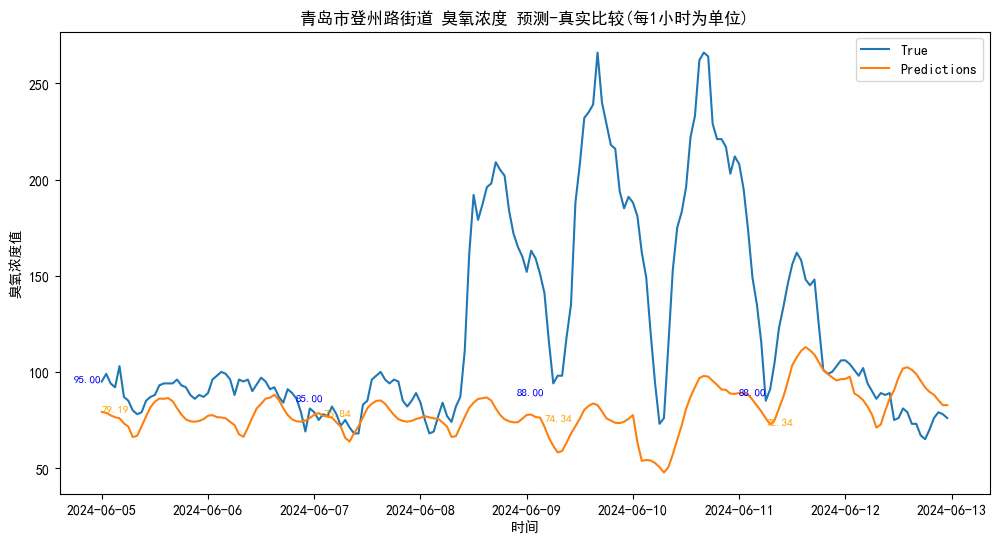

rmse: 66.98588747136188
r2 score: -0.6219088848041641
all
rmse: 66.98588747136188
r2 score: -0.6219088848041641
all-1
rmse: 74.24002714186337
r2 score: -0.7196734645713367
all-2
rmse: 62.705051897067875
r2 score: -0.6000312909559904


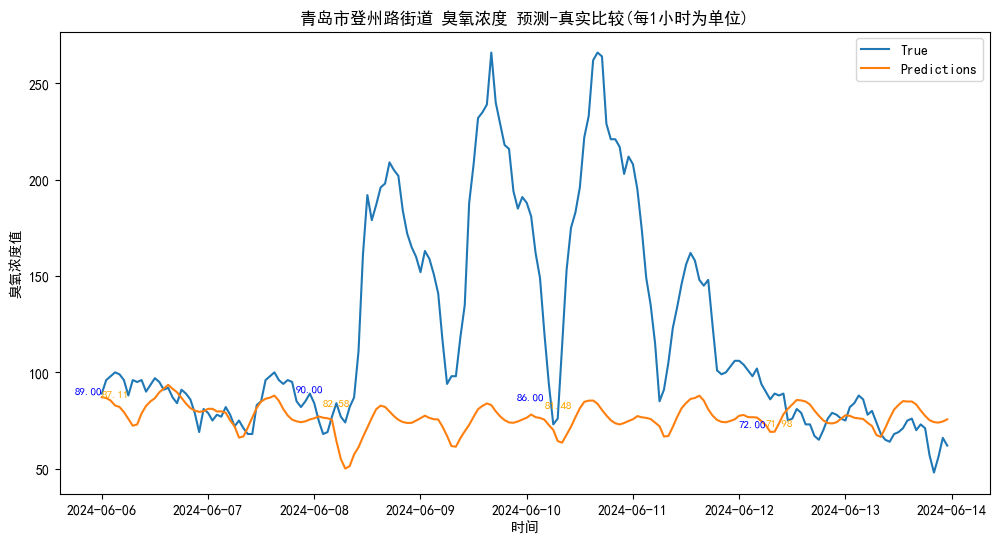

rmse: 69.39355220248342
r2 score: -0.6236598395578052
all
rmse: 69.39355220248342
r2 score: -0.6236598395578052
all-1
rmse: 79.74206798050977
r2 score: -1.0580639318515819
all-2
rmse: 82.59301850028683
r2 score: -0.9467660679476539


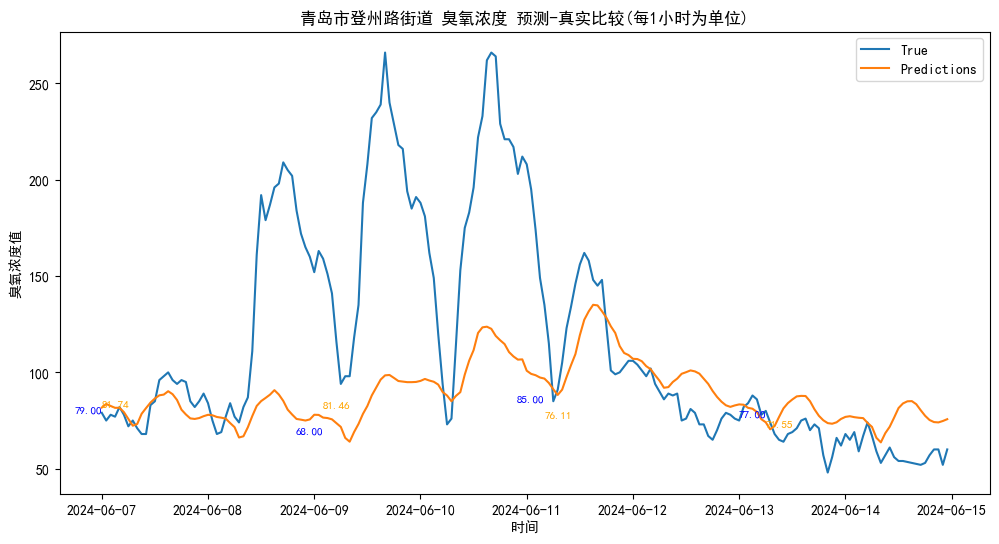

rmse: 58.29543655711626
r2 score: -0.02705017795123532
all
rmse: 58.29543655711626
r2 score: -0.02705017795123532
all-1
rmse: 66.6539925834166
r2 score: -0.3840937139253331
all-2
rmse: 72.70812349409844
r2 score: -0.6330684911497817


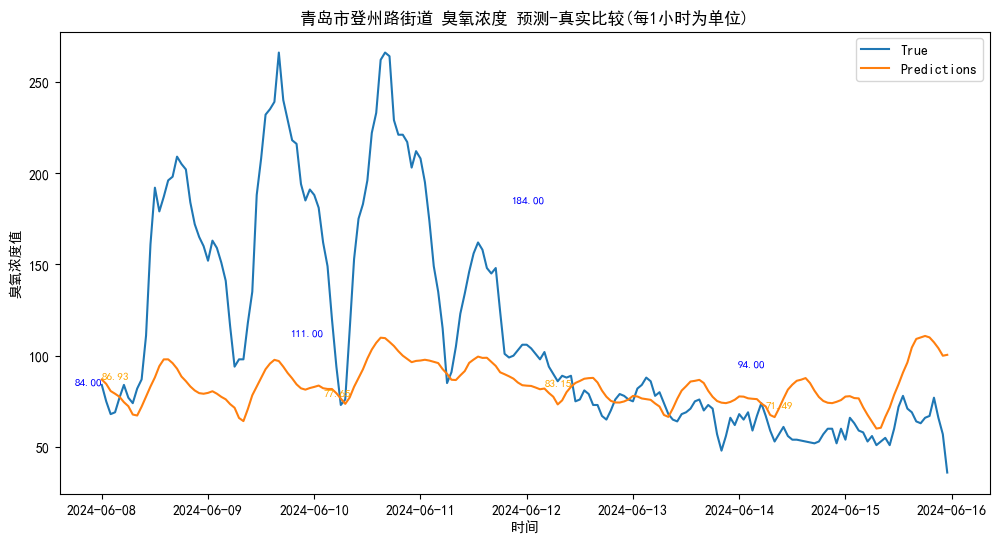

rmse: 61.860656428032684
r2 score: -0.07855254149944857
all
rmse: 61.860656428032684
r2 score: -0.07855254149944857
all-1
rmse: 69.8728800088106
r2 score: -0.4196254190911304
all-2
rmse: 76.35600121111153
r2 score: -0.800440069415028


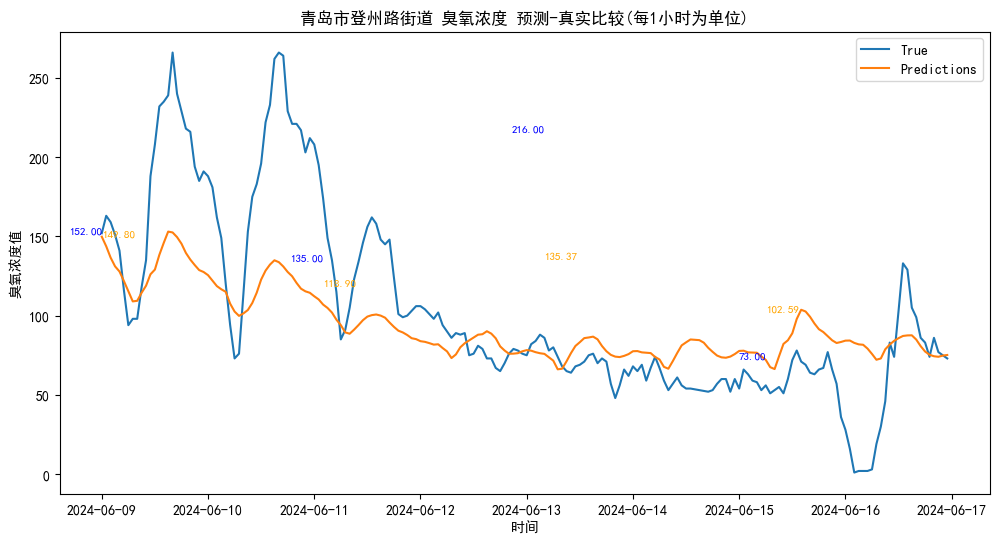

rmse: 44.154564013509756
r2 score: 0.4579684054174151
all
rmse: 44.154564013509756
r2 score: 0.4579684054174151
all-1
rmse: 46.45954033857056
r2 score: 0.4091940793601945
all-2
rmse: 50.10528193625555
r2 score: 0.289630840024094


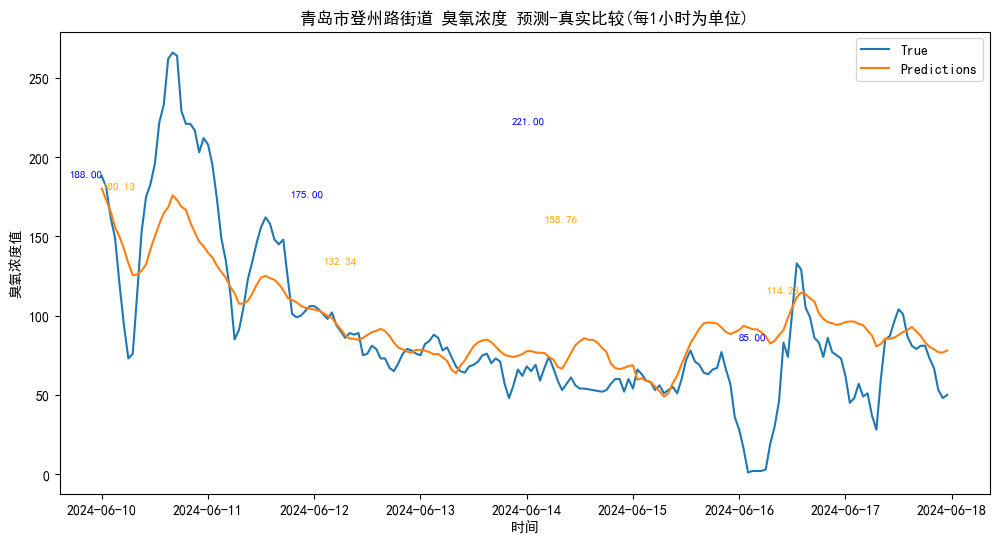

rmse: 32.02522627654275
r2 score: 0.6090989363780113
all
rmse: 32.02522627654275
r2 score: 0.6090989363780113
all-1
rmse: 28.23183007049611
r2 score: 0.7173827003154232
all-2
rmse: 29.593445450772577
r2 score: 0.7105009454135309


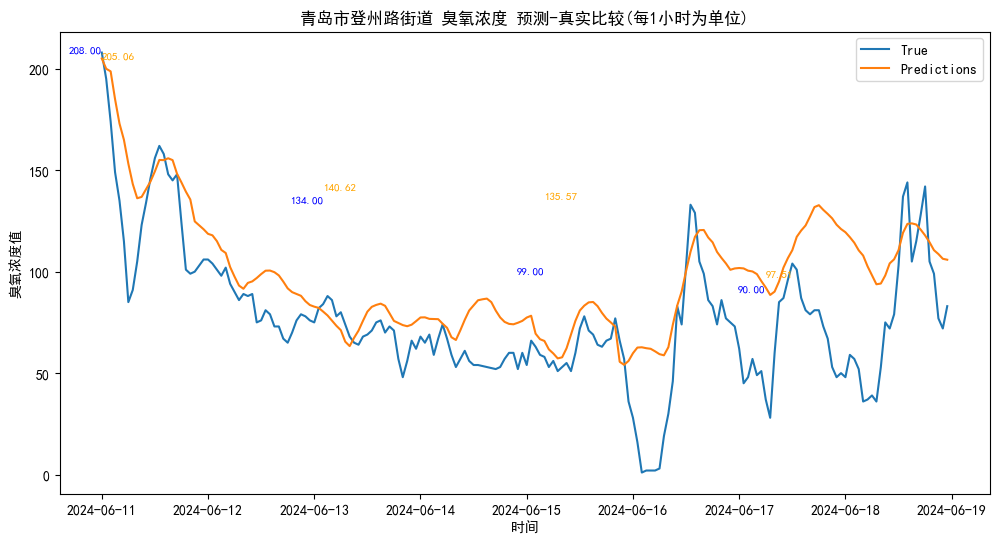

rmse: 29.754706115018873
r2 score: 0.21216959897094934
all
rmse: 29.754706115018873
r2 score: 0.21216959897094934
all-1
rmse: 22.653975802197447
r2 score: 0.5771444056510813
all-2
rmse: 18.728731251379916
r2 score: 0.6587995177870435


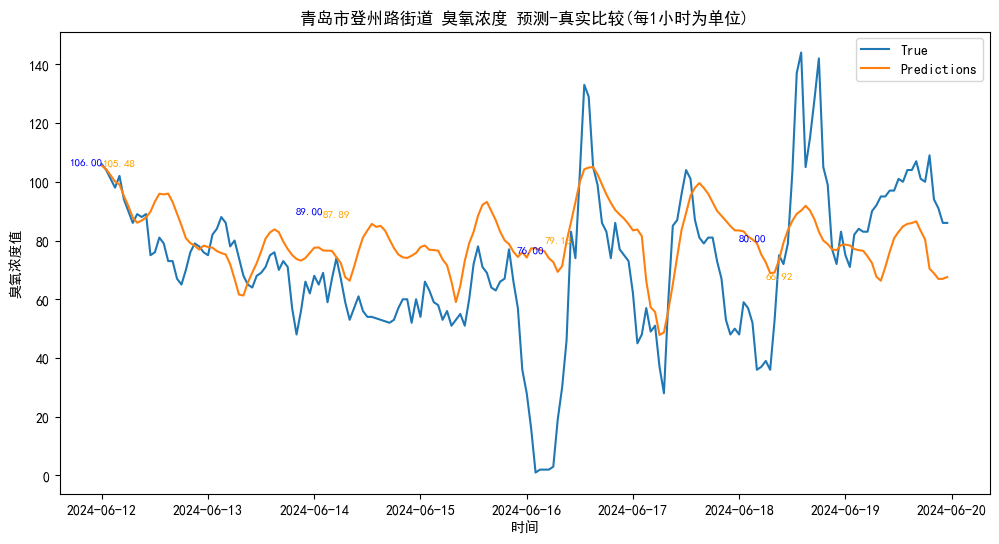

rmse: 23.514813858301803
r2 score: 0.09645773177472527
all
rmse: 23.514813858301803
r2 score: 0.09645773177472527
all-1
rmse: 22.913621200407373
r2 score: -0.06232673749921935
all-2
rmse: 23.32308038559218
r2 score: -0.06931143533846407


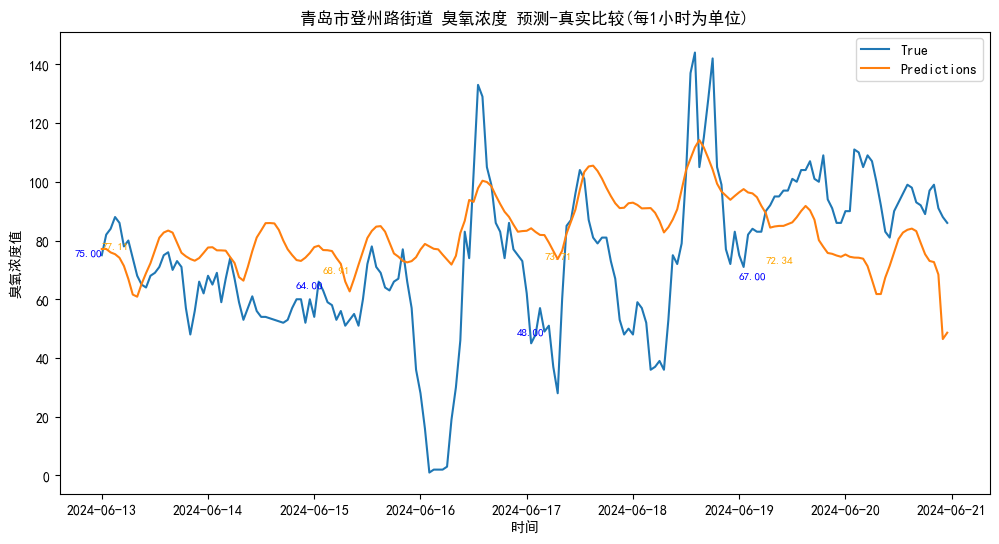

rmse: 25.530082084945093
r2 score: -0.0007016331588682867
all
rmse: 25.530082084945093
r2 score: -0.0007016331588682867
all-1
rmse: 26.79047012531072
r2 score: -0.10263874971846243
all-2
rmse: 25.932585765428385
r2 score: -0.35666076937667257


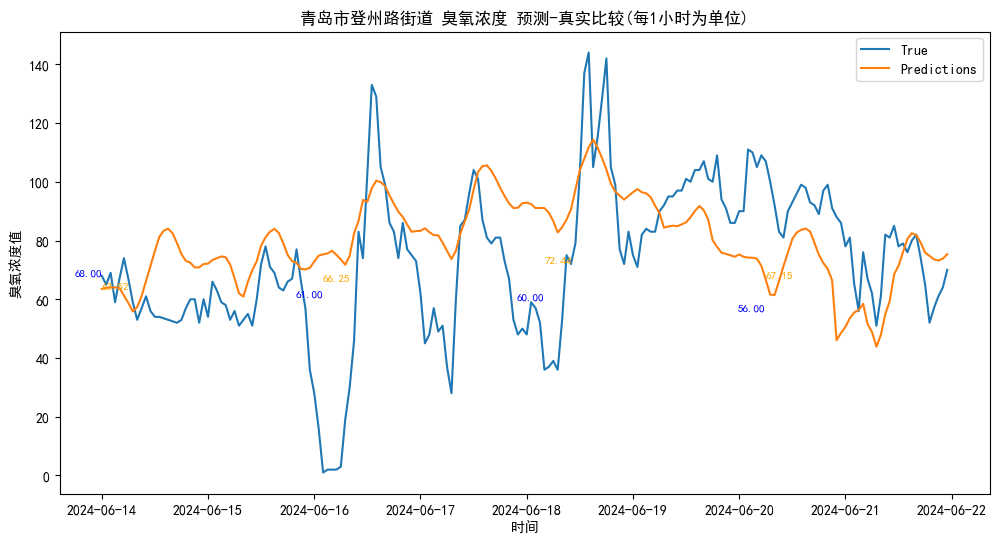

rmse: 25.1863766200225
r2 score: 0.02979445569211836
all
rmse: 25.1863766200225
r2 score: 0.02979445569211836
all-1
rmse: 26.349666492584088
r2 score: 0.07448053076407235
all-2
rmse: 28.037932169425133
r2 score: -0.03704701564152235


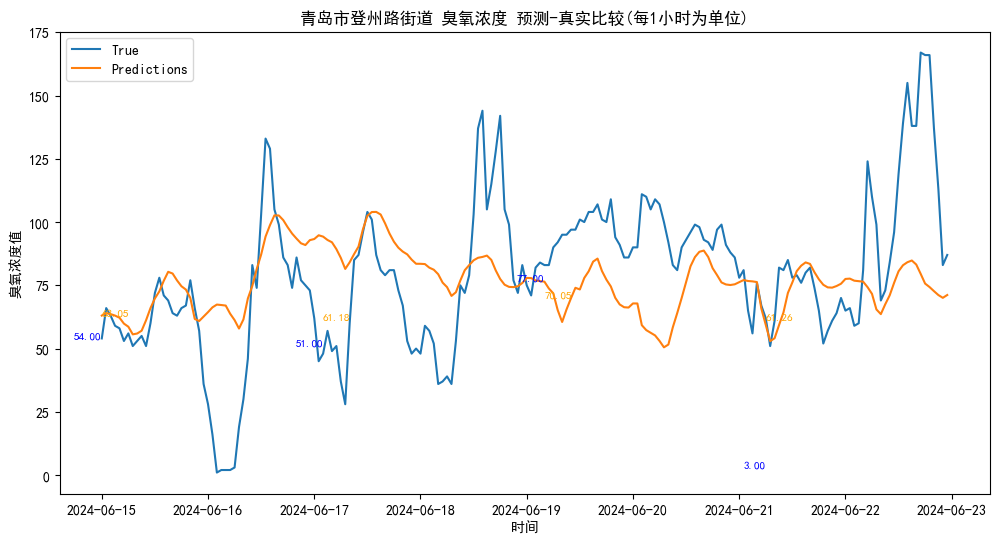

rmse: 29.735957335433216
r2 score: 0.010775866178734606
all
rmse: 29.735957335433216
r2 score: 0.010775866178734606
all-1
rmse: 28.15596234875725
r2 score: 0.013583237388120506
all-2
rmse: 27.68205249904342
r2 score: 0.11179714001522723


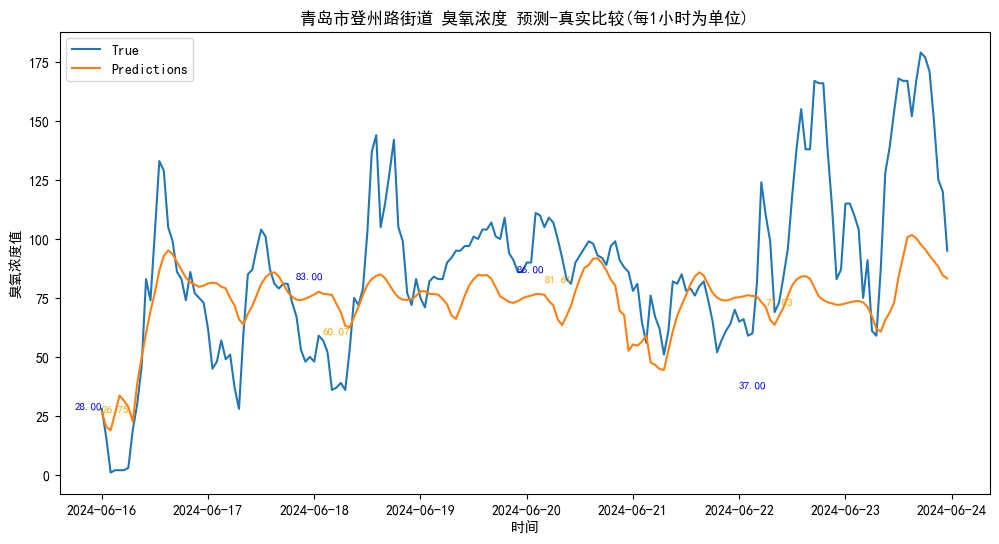

rmse: 31.64644537816982
r2 score: 0.18979514834334588
all
rmse: 31.64644537816982
r2 score: 0.18979514834334588
all-1
rmse: 21.70150051097686
r2 score: 0.3903566226769156
all-2
rmse: 22.854224928150813
r2 score: 0.4145508697224234


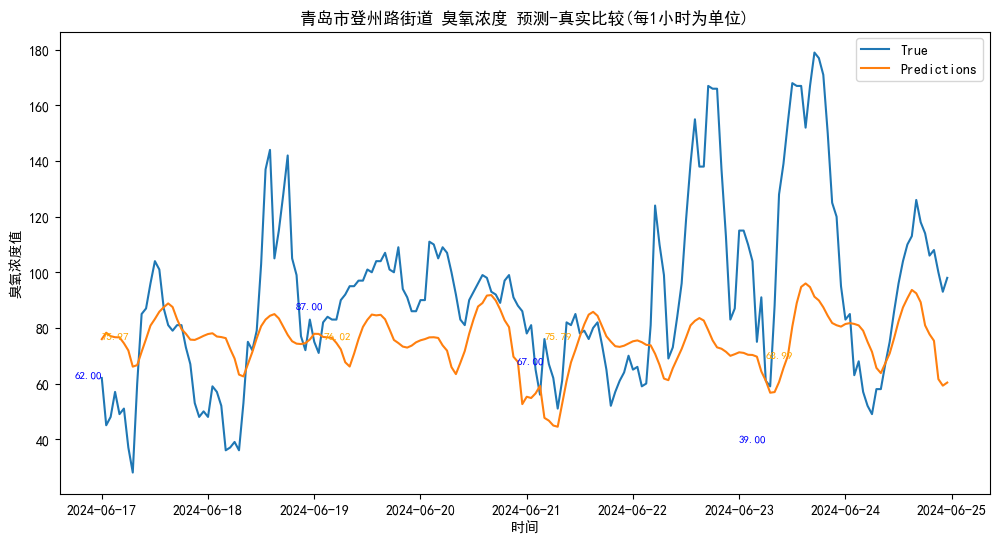

rmse: 32.94501193786704
r2 score: -0.11414426612499207
all
rmse: 32.94501193786704
r2 score: -0.11414426612499207
all-1
rmse: 28.037376732271653
r2 score: -0.08235490927534106
all-2
rmse: 22.01992580181855
r2 score: 0.033552596231372966


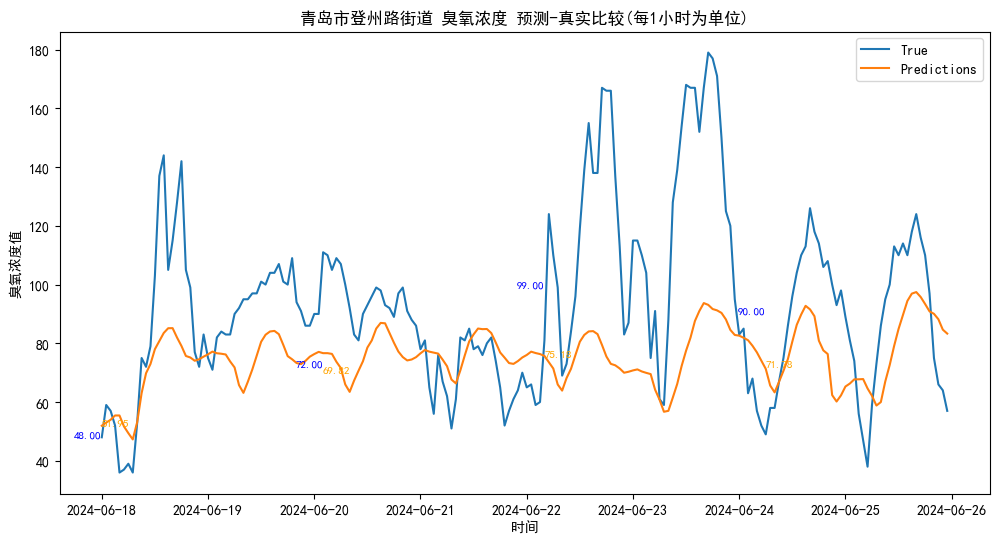

rmse: 32.22965228869515
r2 score: -0.12664453008638143
all
rmse: 32.22965228869515
r2 score: -0.12664453008638143
all-1
rmse: 35.00628042023244
r2 score: -0.20409217605633412
all-2
rmse: 27.924793394962798
r2 score: -0.10916273246310948


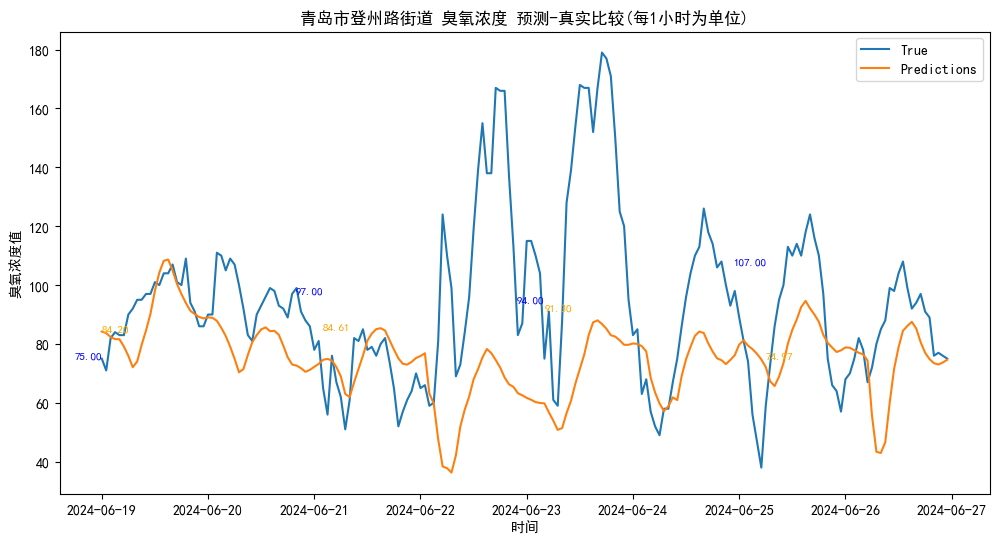

rmse: 34.04527581526168
r2 score: -0.4780197345526578
all
rmse: 34.04527581526168
r2 score: -0.4780197345526578
all-1
rmse: 37.41210290972739
r2 score: -0.5742281032493883
all-2
rmse: 39.735072270019494
r2 score: -0.6840570243124298


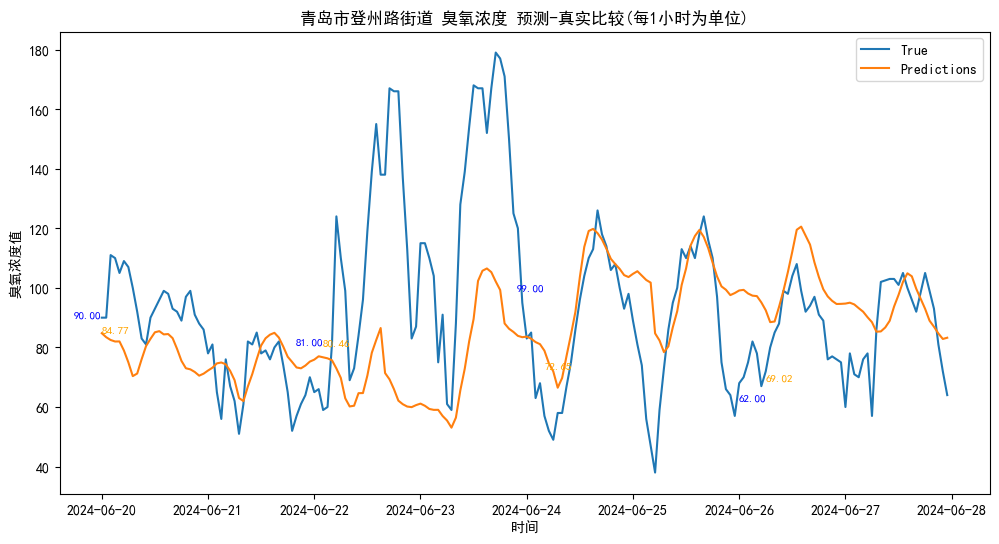

rmse: 30.74949536604996
r2 score: -0.17161695665300658
all
rmse: 30.74949536604996
r2 score: -0.17161695665300658
all-1
rmse: 34.134503301212526
r2 score: -0.17729173770481998
all-2
rmse: 35.70976642607867
r2 score: -0.22165354195213505


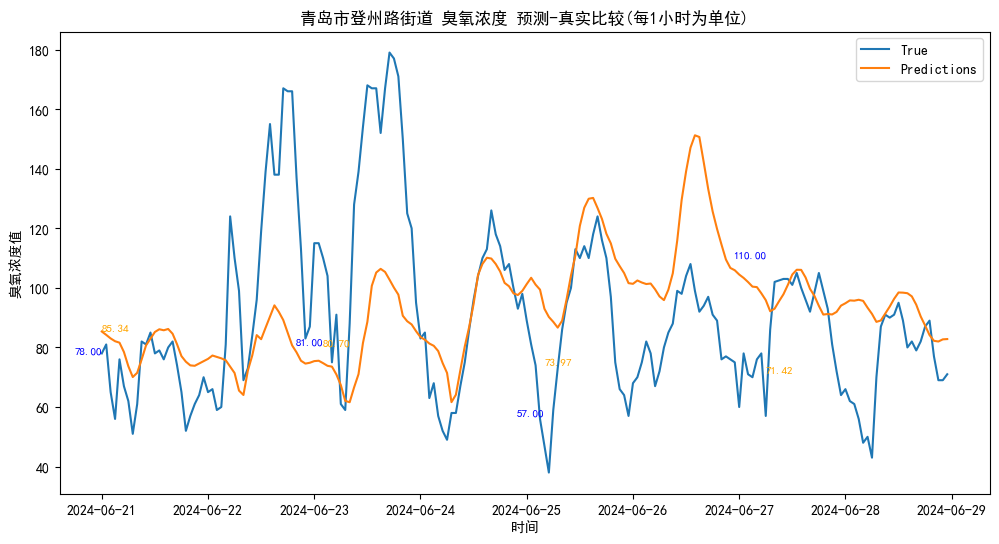

rmse: 30.532486762482563
r2 score: -0.07889301050608433
all
rmse: 30.532486762482563
r2 score: -0.07889301050608433
all-1
rmse: 33.00487508705757
r2 score: -0.07003883952790102
all-2
rmse: 32.94012621362843
r2 score: 0.07588693218162035


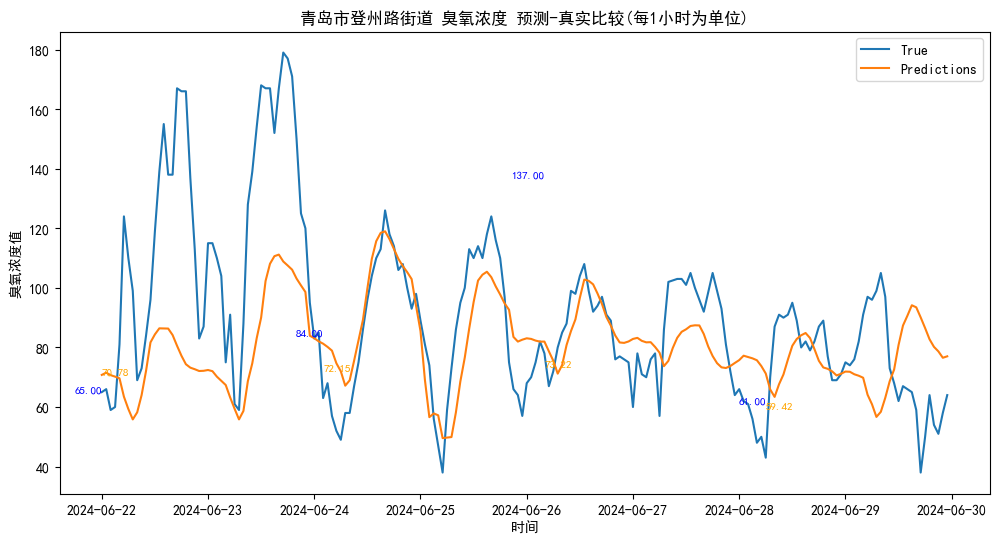

rmse: 28.031044326832664
r2 score: 0.10593589878262011
all
rmse: 28.031044326832664
r2 score: 0.10593589878262011
all-1
rmse: 29.752318386160386
r2 score: 0.06197248844762204
all-2
rmse: 31.754373687485007
r2 score: 0.05092301840386615


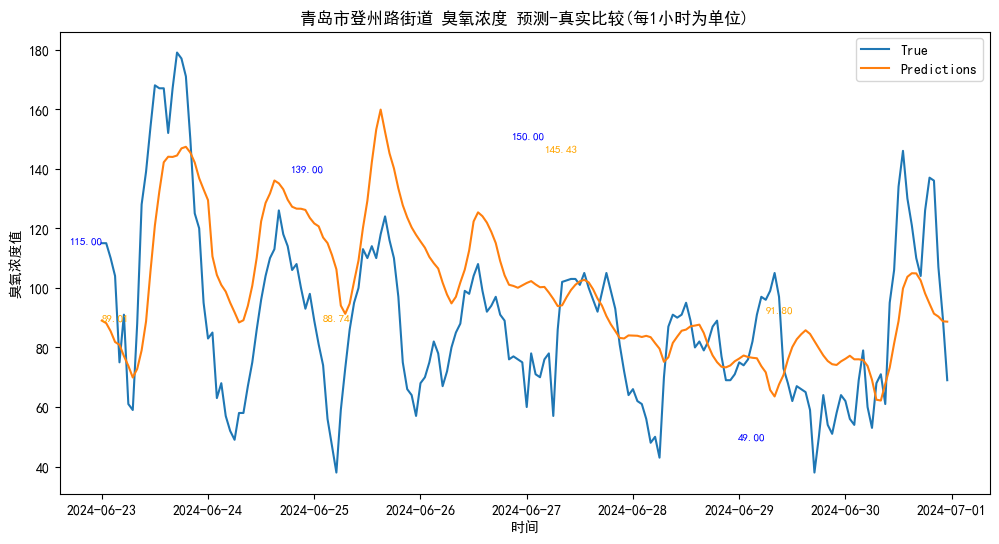

rmse: 26.604457192369313
r2 score: 0.11468391862308946
all
rmse: 26.604457192369313
r2 score: 0.11468391862308946
all-1
rmse: 27.77444331713712
r2 score: 0.04090238869066165
all-2
rmse: 29.51692517395888
r2 score: -0.0225476492940051


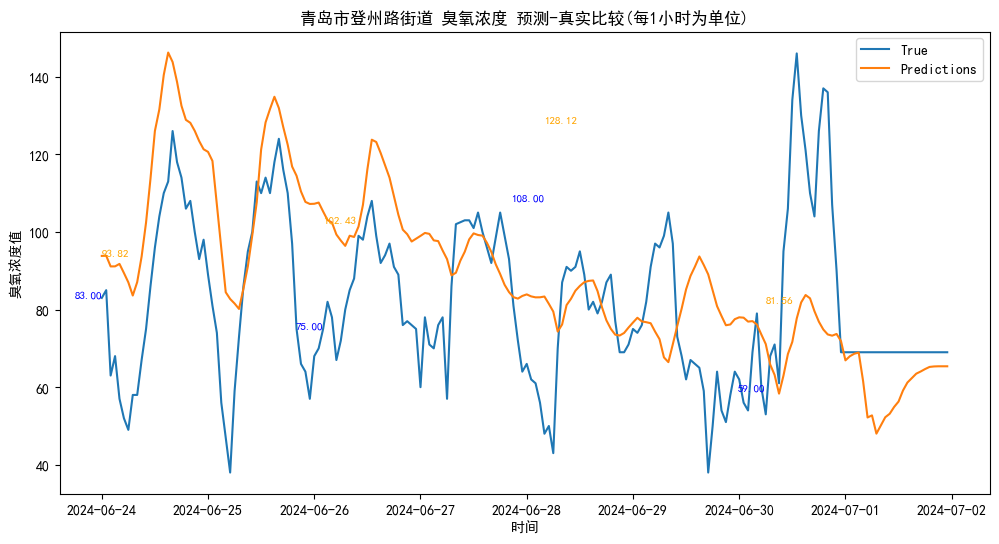

rmse: 23.74484530557577
r2 score: -0.2889813132885324
all
rmse: 23.74484530557577
r2 score: -0.2889813132885324
all-1
rmse: 22.98823805920307
r2 score: -0.39782181524205806
all-2
rmse: 22.751566953650595
r2 score: -0.39972379001548486


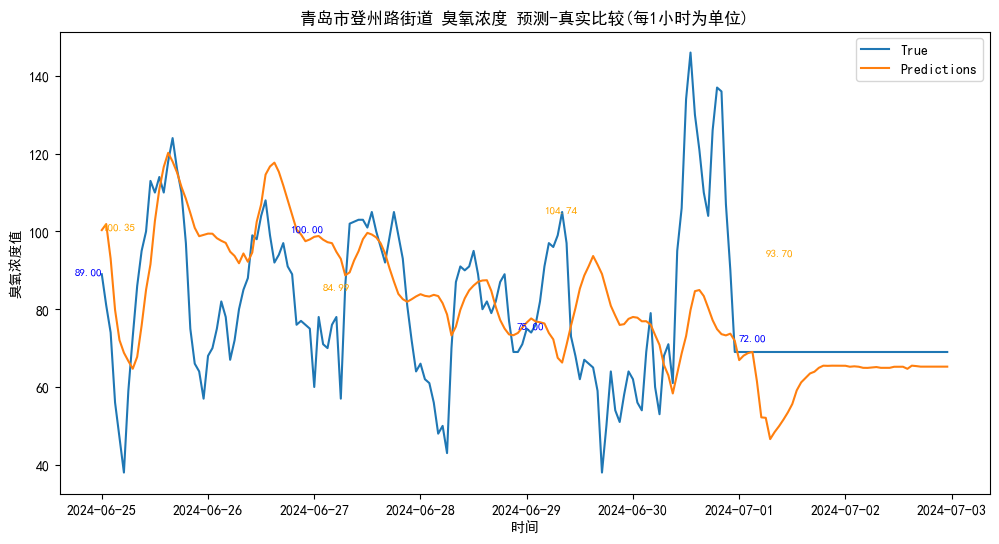

rmse: 20.184472765491005
r2 score: -0.06211286189654053
all
rmse: 20.184472765491005
r2 score: -0.06211286189654053
all-1
rmse: 22.80475640708935
r2 score: -0.1259943575525282
all-2
rmse: 19.647298833032128
r2 score: -0.12805684299038966


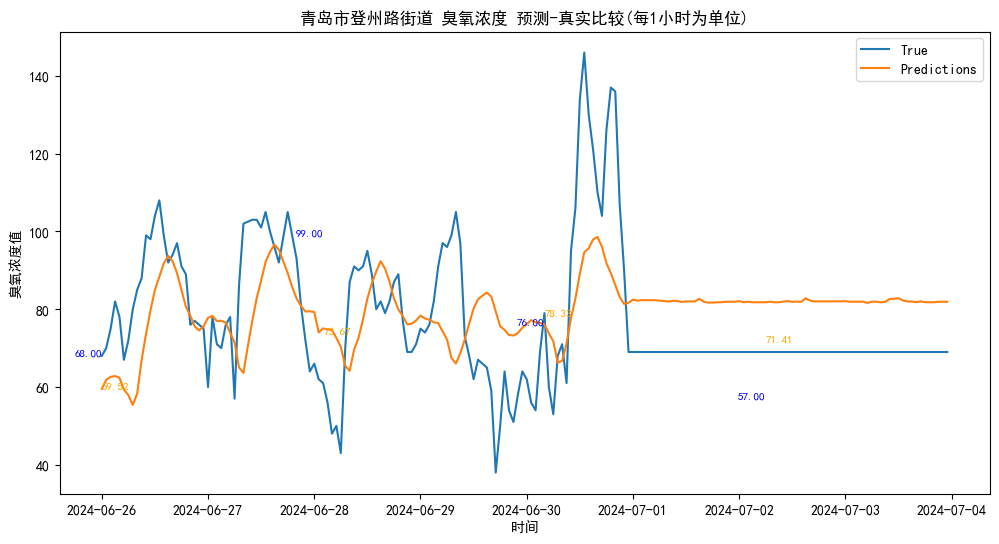

rmse: 16.8294604634516
r2 score: 0.08870138463806654
all
rmse: 16.8294604634516
r2 score: 0.08870138463806654
all-1
rmse: 17.92626570988252
r2 score: 0.16111638942127582
all-2
rmse: 18.74614799749514
r2 score: 0.1820030835093437


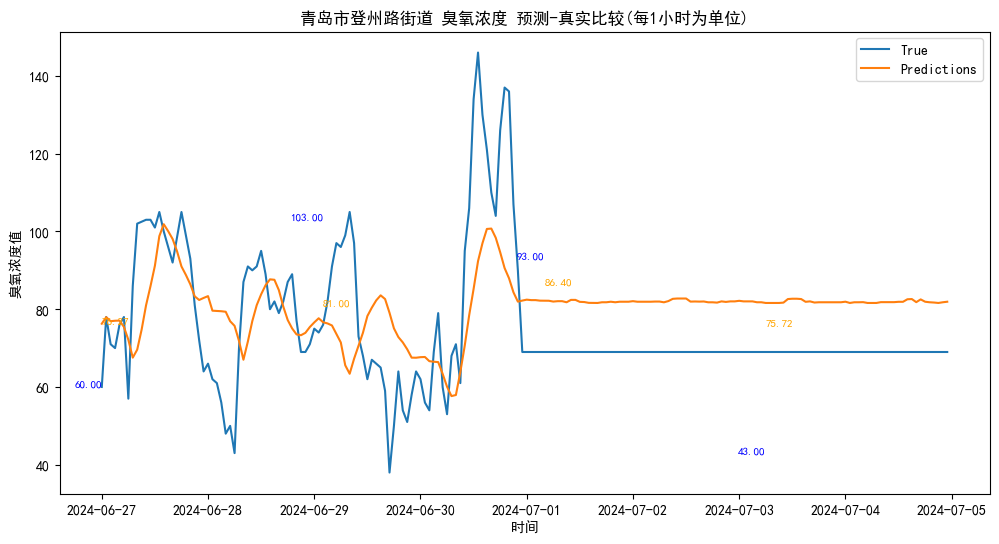

rmse: 16.441168157933657
r2 score: 0.0716811991913292
all
rmse: 16.441168157933657
r2 score: 0.0716811991913292
all-1
rmse: 17.457574310052948
r2 score: 0.1764507976360462
all-2
rmse: 18.20875126594558
r2 score: 0.22283307695335342


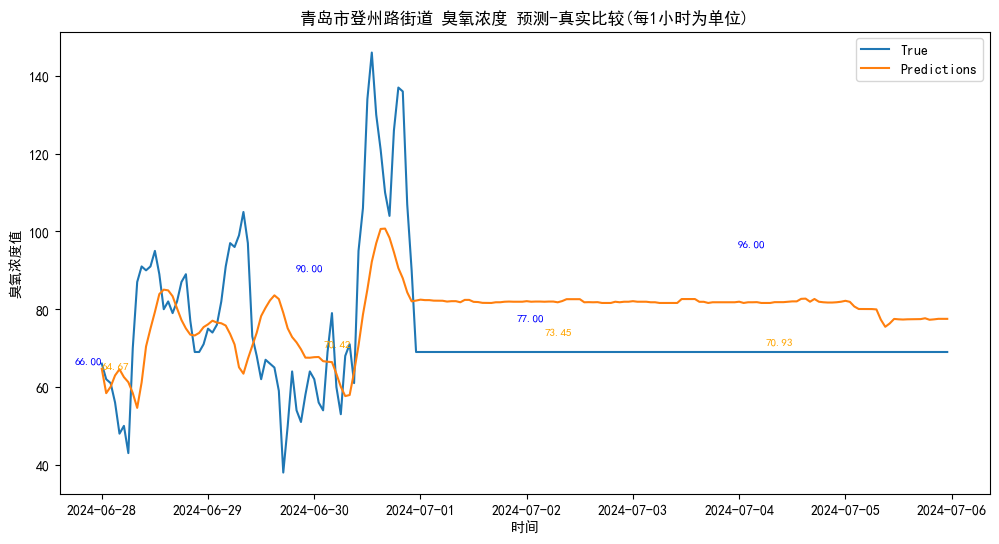

rmse: 15.786098237235919
r2 score: -0.0203950212516395
all
rmse: 15.786098237235919
r2 score: -0.0203950212516395
all-1
rmse: 17.009132615786385
r2 score: 0.09045647512362998
all-2
rmse: 17.71345672438966
r2 score: 0.162078716414902


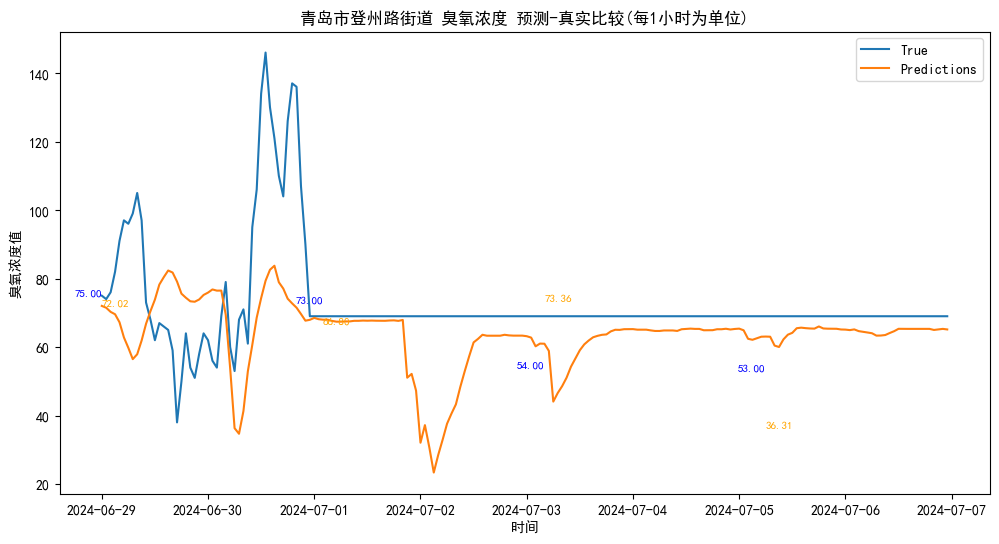

rmse: 18.28122268958784
r2 score: -0.5303515716222067
all
rmse: 18.28122268958784
r2 score: -0.5303515716222067
all-1
rmse: 20.928032468292354
r2 score: -0.5320608248192831
all-2
rmse: 22.85741014101881
r2 score: -0.5458985044126086


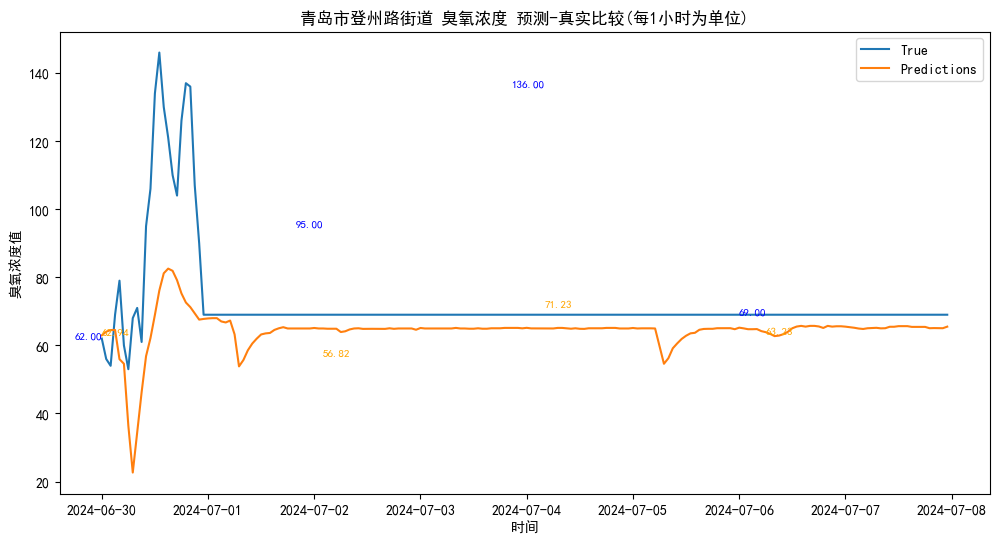

rmse: 14.279927176700784
r2 score: -0.1210208509030144
all
rmse: 14.279927176700784
r2 score: -0.1210208509030144
all-1
rmse: 16.323538738292335
r2 score: -0.11784239007826325
all-2
rmse: 17.642497356930885
r2 score: -0.1035942170944304


In [60]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for i in range(len(df_list)):
# 绘制真实值和预测值的曲线
    plt.figure(figsize=(12, 6))
    plt.title("青岛市登州路街道 臭氧浓度 预测-真实比较(每1小时为单位)")
    plt.plot(df_list[i]['日期'],y_list[i].values, label='True')
    plt.plot(df_list[i]['日期'],y_pred_list[i], label='Predictions')
    plt.xlabel('时间')
    plt.ylabel('臭氧浓度值')

# 显示每个具体的数值
    for j in range(0, len(df_list[i]), 10):
        if 5 * j < len(df_list[i]) and j < len(y_list[i]) and j < len(y_pred_list[i]):
            plt.text(df_list[i].iloc[5*j]['日期'], y_list[i].values[j], f'{y_list[i].values[j]:.2f}', color='blue', fontsize=8, ha='right')
            plt.text(df_list[i].iloc[5*j]['日期'], y_pred_list[i][j], f'{y_pred_list[i][j]:.2f}', color='orange', fontsize=8, ha='left')
    plt.legend()
    plt.show()
    print("rmse:", math.sqrt(mean_squared_error(y_list[i].values, y_pred_list[i])))
    print("r2 score:", r2_score(y_list[i].values, y_pred_list[i]))
    print("all")
    print("rmse:", math.sqrt(mean_squared_error(y_list[i].values, y_pred_list[i])))
    print("r2 score:", r2_score(y_list[i].values, y_pred_list[i]))
    print("all-1")
    print("rmse:", math.sqrt(mean_squared_error(y_list[i].values[:-(2*24)], y_pred_list[i][:-(2*24)])))
    print("r2 score:", r2_score(y_list[i].values[:-(2*24)], y_pred_list[i][:-(2*24)]))
    print("all-2")
    print("rmse:", math.sqrt(mean_squared_error(y_list[i].values[:-(3 *24)], y_pred_list[i][:-(3 *24)])))
    print("r2 score:", r2_score(y_list[i].values[:-(3 *24)], y_pred_list[i][:-(3 *24)]))

In [61]:
# from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# import matplotlib.dates as mdates
# from datetime import datetime, timedelta
# date_range_list = []
# date_range_list111 = []
# start_date111 = datetime(2024, 5, 16, 0, 0, 0) 
# end_date111 = datetime(2024, 5, 22, 23, 0, 0)
# date_range111 = pd.date_range(start=start_date111, end=end_date111, freq='H')
# merged_data111 = pd.merge(pd.DataFrame(date_range111, columns=['日期']), datat, on='日期', how='inner')
# while end_date111 < datetime(2024, 7, 1, 0, 0, 0):
#     date_range111 = pd.date_range(start=start_date111, end=end_date111, freq='H')
#     date_range_list111.append(date_range111)
#     end_date111 += timedelta(hours=1)
#     start_date111 = end_date111
#     end_date111 += timedelta(days=1)
#     end_date111 -= timedelta(hours=1)


# true_value_list1 = []
# true_value_list1 = merged_data111['O3VAL'].tolist()



# start_date = datetime(2024, 5, 16, 0, 0, 0) 
# end_date = datetime(2024, 5, 16, 23, 0, 0)
# while end_date < datetime(2024, 7, 1, 0, 0, 0):
#     date_range = pd.date_range(start=start_date, end=end_date, freq='H')
#     date_range_list.append(date_range)
#     end_date += timedelta(hours=1)
#     start_date = end_date
#     end_date += timedelta(days=1)
#     end_date -= timedelta(hours=1)

# num = 0
# colors = [
#  '#d3e5f3','#a1cae1', 
#     '#5d9fcd', '#4292c6',  '#3171ad',
#     '#2864a0', '#2171b5',   '#08306b','orange'
# ]
# true_legend_added = 0 
# pred_value_list_7 = np.array([])
# pred_value_list_6 = np.array([])
# pred_value_list_5 = np.array([])
# pred_value_list_4 = np.array([])
# pred_value_list_3 = np.array([])
# pred_value_list_2 = np.array([])
# pred_value_list_1 = np.array([])
# pred_value_list_0 = np.array([])

# for date_ranges in date_range_list:
#     num = 7
#     for i in range(len(df_list)):
#         is_in_list = df_list[i]['日期'].isin(date_ranges)
#         rmse_list = []
#         r2_list = []
#         if is_in_list.any():
#             matching_indices = df_list[i].index[is_in_list].tolist()
#             matching_values = df_list[i].loc[is_in_list, '日期'].tolist()
#             if num == 7:
#                 pred_value_list_7 = np.concatenate((pred_value_list_7, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
#             elif num == 6:
#                 pred_value_list_6 = np.concatenate((pred_value_list_6, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
#             elif num == 5:
#                 pred_value_list_5 = np.concatenate((pred_value_list_5, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
#             elif num == 4:
#                 pred_value_list_4 = np.concatenate((pred_value_list_4, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
#             elif num == 3:
#                 pred_value_list_3 = np.concatenate((pred_value_list_3, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
#             elif num == 2:
#                 pred_value_list_2 = np.concatenate((pred_value_list_2, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
#             elif num == 1:
#                 pred_value_list_1 = np.concatenate((pred_value_list_1, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
#             elif num == 0:
#                 pred_value_list_0 = np.concatenate((pred_value_list_0, y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[-1]/5)+1]))
#             num-=1



# plt.figure(figsize=(15, 6))
# plt.title("青岛市八大关街道 臭氧浓度 预测-真实比较(每1小时为单位)")
# plt.plot(date_range111,pred_value_list_7,color=colors[0], label='n-7')
# plt.plot(date_range111,pred_value_list_6,color=colors[1], label='n-6')
# plt.plot(date_range111,pred_value_list_5,color=colors[2], label='n-5')
# plt.plot(date_range111,pred_value_list_4,color=colors[3], label='n-4')
# plt.plot(date_range111,pred_value_list_3,color=colors[4], label='n-3')
# plt.plot(date_range111,pred_value_list_2,color=colors[5], label='n-2')
# # plt.plot(date_range111,pred_value_list_1,color=colors[6], label='n-1')
# # plt.plot(date_range111,pred_value_list_0,color=colors[7], label='n-0')
# plt.plot(date_range111,true_value_list,color=colors[-1], label='True')
# plt.legend()
# plt.show()   


# print('n-7 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_7)))
# print('n-7 R2:',r2_score(true_value_list, pred_value_list_7))
# print('n-6 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_6)))
# print('n-6 R2:',r2_score(true_value_list, pred_value_list_6))
# print('n-5 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_5)))
# print('n-5 R2:',r2_score(true_value_list, pred_value_list_5))
# print('n-4 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_4)))
# print('n-4 R2:',r2_score(true_value_list, pred_value_list_4))
# print('n-3 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_3)))
# print('n-3 R2:',r2_score(true_value_list, pred_value_list_3))
# print('n-2 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_2)))
# print('n-2 R2:',r2_score(true_value_list, pred_value_list_2))
# # print('n-1 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_1)))
# # print('n-1 R2:',r2_score(true_value_list, pred_value_list_1))
# # print('n-0 MASE:',math.sqrt(mean_squared_error(true_value_list, pred_value_list_0)))
# # print('n-0 R2:',r2_score(true_value_list, pred_value_list_0))
# # r2_list.append(r2_score(y_list[i].values[int(matching_indices[0]/5):int(matching_indices[(j+1)*24-1]/5)+1], y_pred_list[i][int(matching_indices[0]/5):int(matching_indices[(j+1)*24-1]/5)+1]))
# # print(f"第{num}条线,前{j+1}天 rmse:", rmse_list[j])
# # print(f"第{num}条线,前{j+1}天 r2 score:", r2_list[j])

In [62]:
# for i in range(46):

#     mase7 = math.sqrt(mean_squared_error(true_value_list[i*24:i*24+24], pred_value_list_7[i*24:i*24+24]))
#     mase6 = math.sqrt(mean_squared_error(true_value_list[i*24:i*24+24], pred_value_list_6[i*24:i*24+24]))
#     mase5 = math.sqrt(mean_squared_error(true_value_list[i*24:i*24+24], pred_value_list_5[i*24:i*24+24]))
#     mase4 = math.sqrt(mean_squared_error(true_value_list[i*24:i*24+24], pred_value_list_4[i*24:i*24+24]))
#     mase3 = math.sqrt(mean_squared_error(true_value_list[i*24:i*24+24], pred_value_list_3[i*24:i*24+24]))
#     mase2 = math.sqrt(mean_squared_error(true_value_list[i*24:i*24+24], pred_value_list_2[i*24:i*24+24]))
#     mase1 = math.sqrt(mean_squared_error(true_value_list[i*24:i*24+24], pred_value_list_1[i*24:i*24+24]))
#     mase0 = math.sqrt(mean_squared_error(true_value_list[i*24:i*24+24], pred_value_list_0[i*24:i*24+24]))
    
#     r27 = r2_score(true_value_list[i*24:i*24+24], pred_value_list_7[i*24:i*24+24])
#     r26 = r2_score(true_value_list[i*24:i*24+24], pred_value_list_6[i*24:i*24+24])
#     r25 = r2_score(true_value_list[i*24:i*24+24], pred_value_list_5[i*24:i*24+24])
#     r24 = r2_score(true_value_list[i*24:i*24+24], pred_value_list_4[i*24:i*24+24])
#     r23 = r2_score(true_value_list[i*24:i*24+24], pred_value_list_3[i*24:i*24+24])
#     r22 = r2_score(true_value_list[i*24:i*24+24], pred_value_list_2[i*24:i*24+24])
#     r21 = r2_score(true_value_list[i*24:i*24+24], pred_value_list_1[i*24:i*24+24])
#     r20 = r2_score(true_value_list[i*24:i*24+24], pred_value_list_0[i*24:i*24+24])
#     rmse_list = []
#     r2_list = []
#     rmse_list.append(mase7)
#     rmse_list.append(mase6)
#     rmse_list.append(mase5)
#     rmse_list.append(mase4)
#     rmse_list.append(mase3)
#     rmse_list.append(mase2)
#     rmse_list.append(mase1)
#     rmse_list.append(mase0)
#     std_dev1 = np.std(rmse_list)
#     r2_list.append(r27)
#     r2_list.append(r26)
#     r2_list.append(r25)
#     r2_list.append(r24)
#     r2_list.append(r23)
#     r2_list.append(r22)
#     r2_list.append(r21)
#     r2_list.append(r20)
#     std_dev2 = np.std(r2_list)
#     col_name1 = 'rmse'
#     col_name2 = 'r2'
    
    
    


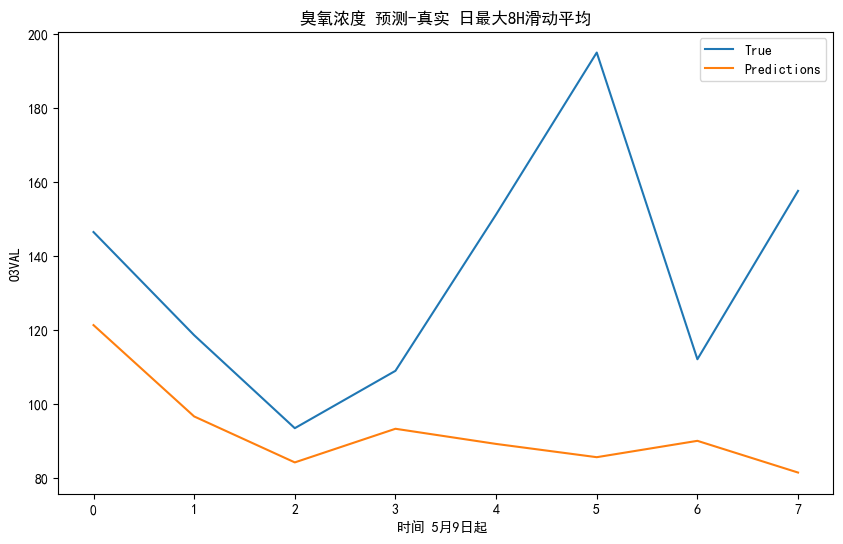

rmse: 54.225360130844855
r2 score: -2.056452029795985
rmse: 23.60405643063649
r2 score: -1.8681610101761947
rmse: 19.998408742396435
r2 score: 0.14650530598317968
rmse: 19.006269219628145
r2 score: 0.029650277351493393
rmse: 32.525414282348386
r2 score: -1.1743383364952371
rmse: 53.60996870562165
r2 score: -1.58913713089659


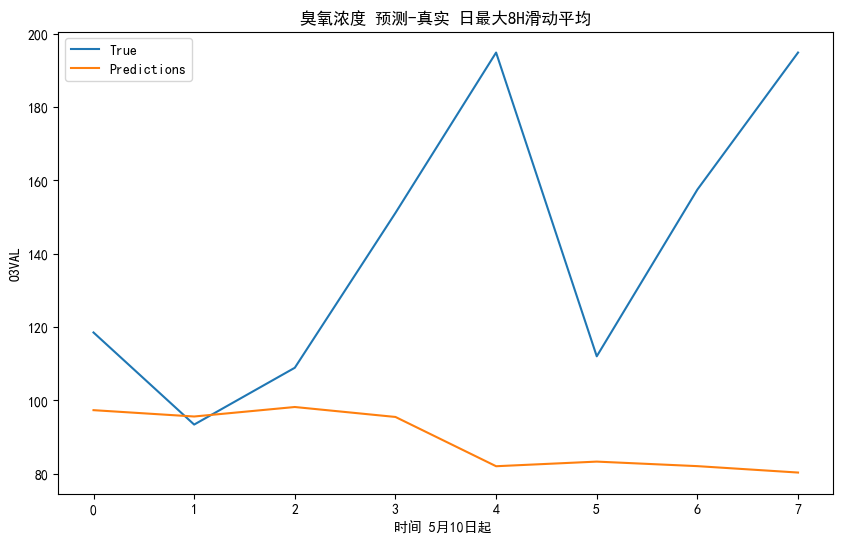

rmse: 67.13563833114745
r2 score: -2.330649364457411
rmse: 15.06685502084914
r2 score: -0.43844436464784176
rmse: 13.767922919764786
r2 score: -0.7694241091329965
rmse: 30.282441536954597
r2 score: -1.0524679973544275
rmse: 57.282339887377255
r2 score: -1.5167621948533752
rmse: 53.59055909266418
r2 score: -1.4978250083362217


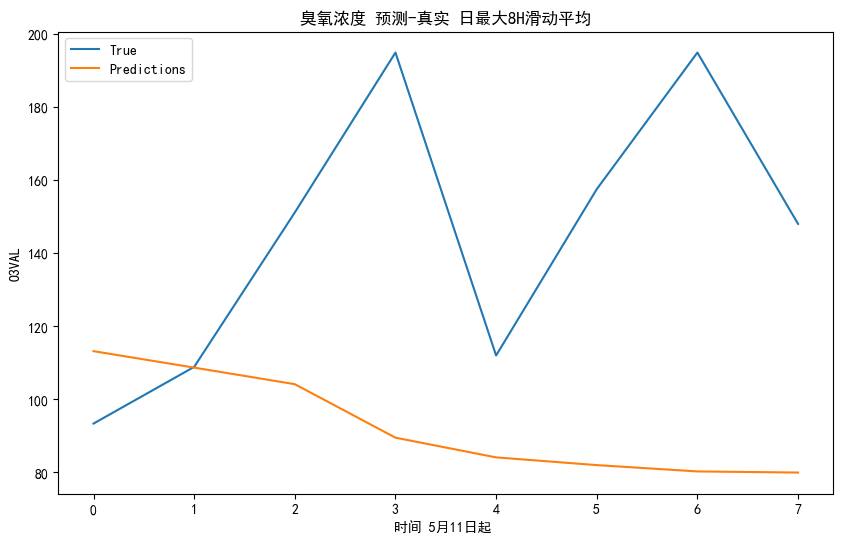

rmse: 68.85890109651156
r2 score: -2.705454791966047
rmse: 14.010171887291587
r2 score: -2.2680110936350557
rmse: 29.43318483543049
r2 score: -0.45452721610139957
rmse: 58.52212546596595
r2 score: -1.194294334755447
rmse: 53.807621870208656
r2 score: -1.14601220139375
rmse: 57.98631059510617
r2 score: -1.7691545145987813


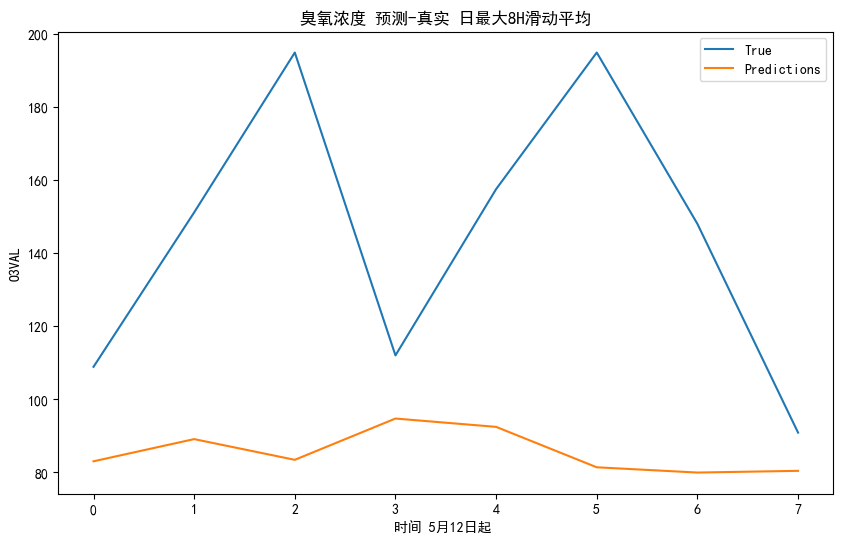

rmse: 69.89894085468954
r2 score: -2.7222464385845058
rmse: 47.5173021770498
r2 score: -4.0595293020497865
rmse: 75.13541593153738
r2 score: -3.579306366070332
rmse: 65.63997747647917
r2 score: -2.53455611295116
rmse: 65.52319804216528
r2 score: -3.229659540953591
rmse: 75.65951184991708
r2 score: -3.7979214232682352


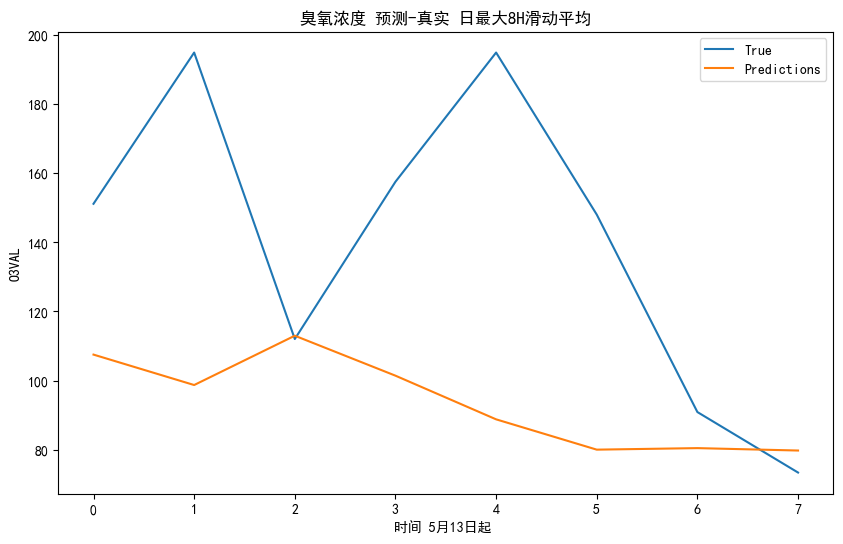

rmse: 61.57761484392645
r2 score: -1.1434963472835054
rmse: 74.67981254954803
r2 score: -10.654947322640991
rmse: 60.97833205777647
r2 score: -2.2449247176615694
rmse: 59.79607444032106
r2 score: -3.139327524166066
rmse: 71.49953832695779
r2 score: -4.325170845393162
rmse: 70.9283706427965
r2 score: -5.079426680120577


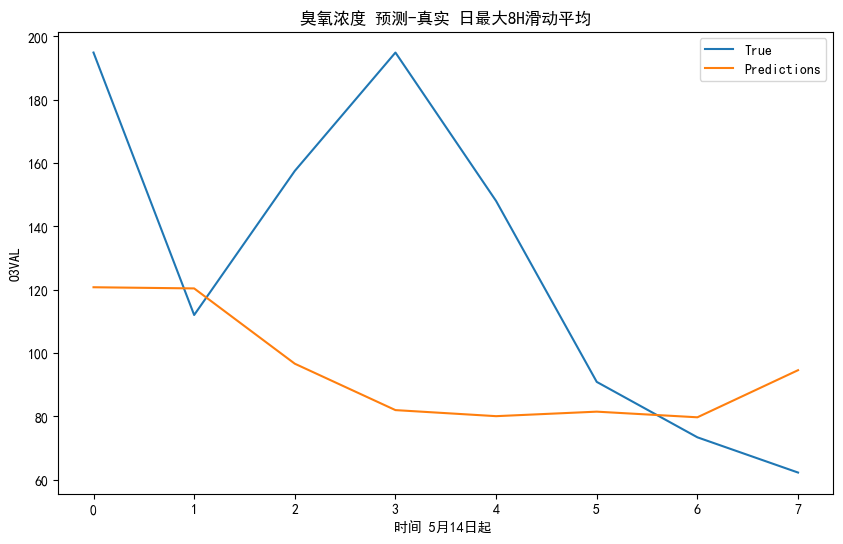

rmse: 58.95654936000135
r2 score: -0.45250874862292223
rmse: 52.739482773122745
r2 score: -0.6198867050524188
rmse: 55.585640782574764
r2 score: -1.6905445686651115
rmse: 74.1914321636257
r2 score: -3.734797547323529
rmse: 72.98483211076964
r2 score: -4.461948460323511
rmse: 66.73605834290308
r2 score: -1.9602663713625024


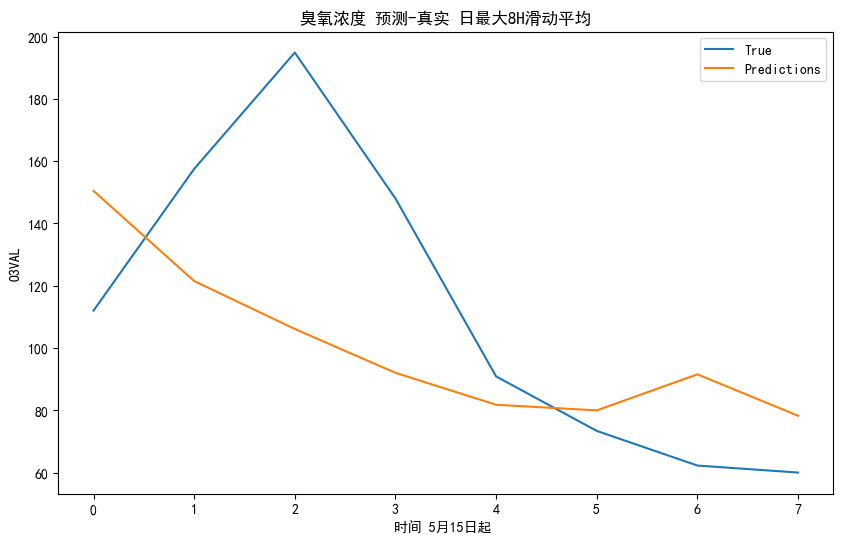

rmse: 43.45483907968047
r2 score: 0.1293386840172921
rmse: 37.25102430497657
r2 score: -1.6811038507812195
rmse: 59.59819499982535
r2 score: -2.093008910523944
rmse: 58.71466741949004
r2 score: -2.962849653030415
rmse: 52.67374761717949
r2 score: -1.1093685827177482
rmse: 48.15966412864583
r2 score: -0.34477694061259734


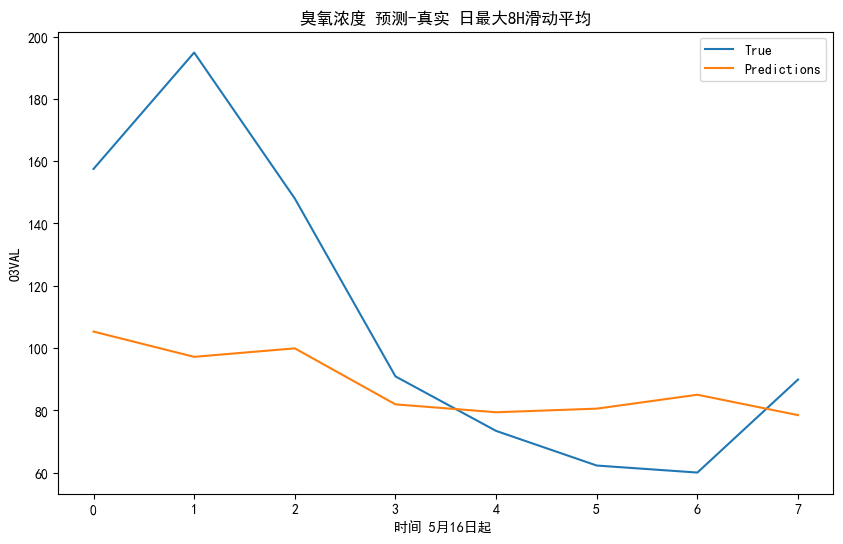

rmse: 44.43538169996713
r2 score: 0.11233000343518851
rmse: 78.343839607983
r2 score: -16.575483991873355
rmse: 69.73854526867319
r2 score: -10.880118340836335
rmse: 60.56190547282495
r2 score: -1.6431142942167214
rmse: 54.23438843346834
r2 score: -0.4731307621480545
rmse: 50.067679741381625
r2 score: -0.06325375491747542


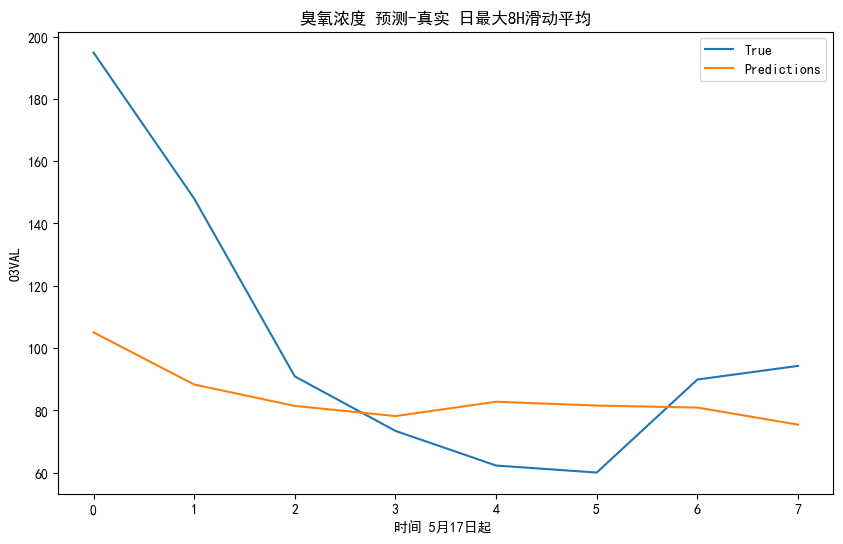

rmse: 40.4234012713152
r2 score: 0.14196457891224445
rmse: 76.29103213038411
r2 score: -9.595572091597802
rmse: 62.530839004177096
r2 score: -1.1620670828802573
rmse: 54.20545807300614
r2 score: -0.2735495057302366
rmse: 49.340881343678674
r2 score: 0.030835691241334673
rmse: 45.89026442746592
r2 score: 0.15643386025349537


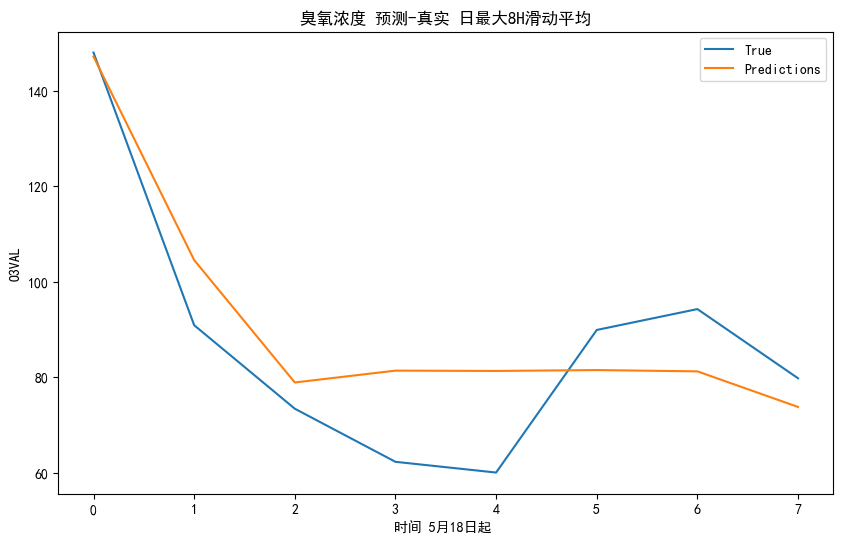

rmse: 12.808421535645303
r2 score: 0.7558652041776153
rmse: 9.670081071113316
r2 score: 0.8853780492700112
rmse: 8.50953900677271
r2 score: 0.9286844697925225
rmse: 12.065403589523074
r2 score: 0.8664047307900674
rmse: 14.390650647620372
r2 score: 0.8032641210089866
rmse: 13.577197435146482
r2 score: 0.7901465798744137


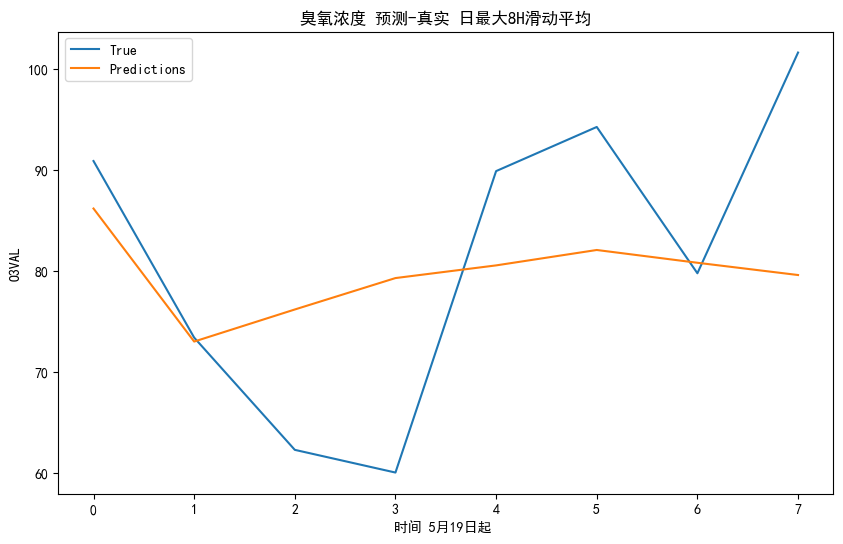

rmse: 12.799149106446876
r2 score: 0.19474915957451377
rmse: 3.3404067286561903
r2 score: 0.8542587152607144
rmse: 8.481872794750782
r2 score: 0.48177024490072706
rmse: 12.11755293103424
r2 score: 0.015613502505561705
rmse: 11.615981779900185
r2 score: 0.21834054201917152
rmse: 11.71400413900444
r2 score: 0.29217343954719566


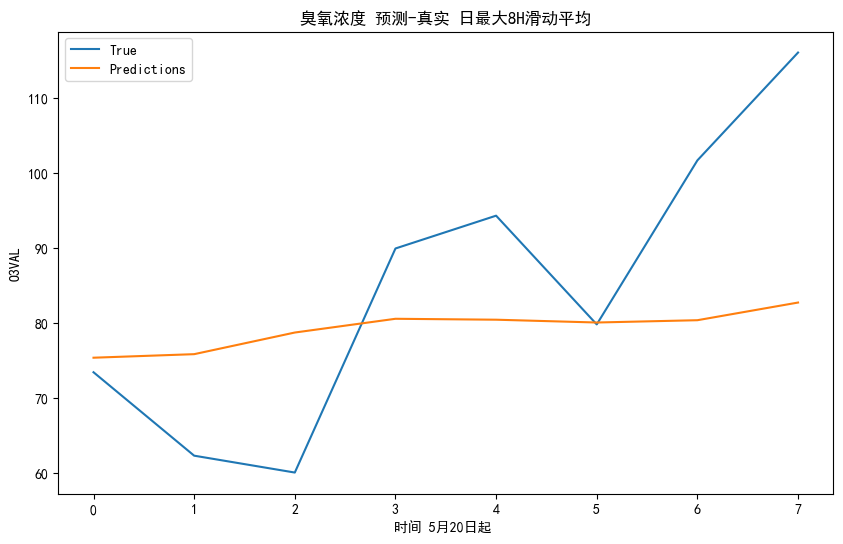

rmse: 17.252119246240362
r2 score: 0.10179977166163656
rmse: 9.667712729163988
r2 score: -2.0206988221047446
rmse: 13.35992294625984
r2 score: -4.220311957493659
rmse: 12.483041769636005
r2 score: -0.11522339800263226
rmse: 12.772610172269738
r2 score: 0.16554249924736264
rmse: 11.660210975528488
r2 score: 0.17562386689633402


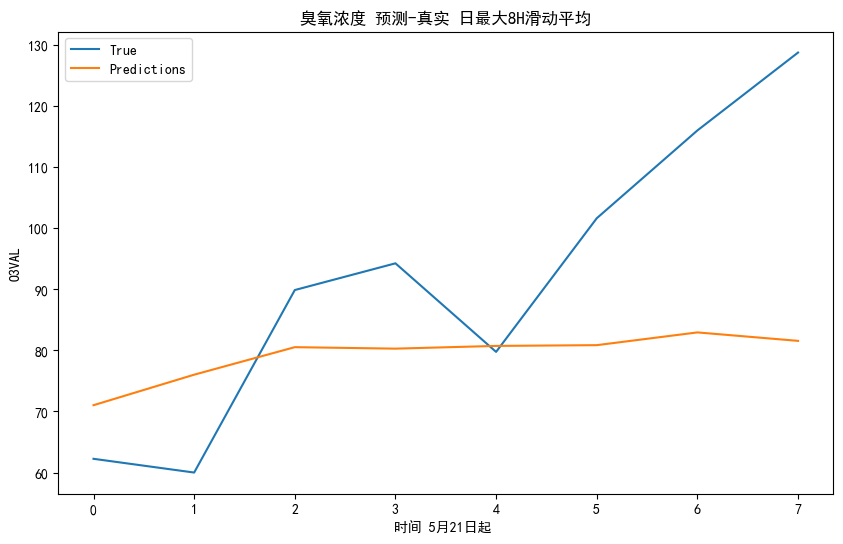

rmse: 23.368886907788884
r2 score: -0.06912336789262219
rmse: 12.914864640157306
r2 score: -130.7876374704873
rmse: 11.846403852740039
r2 score: 0.23946450404083996
rmse: 12.410672644228818
r2 score: 0.36434191681632677
rmse: 11.109067974570761
r2 score: 0.3685458899732207
rmse: 13.219526123410628
r2 score: 0.2883245075349211


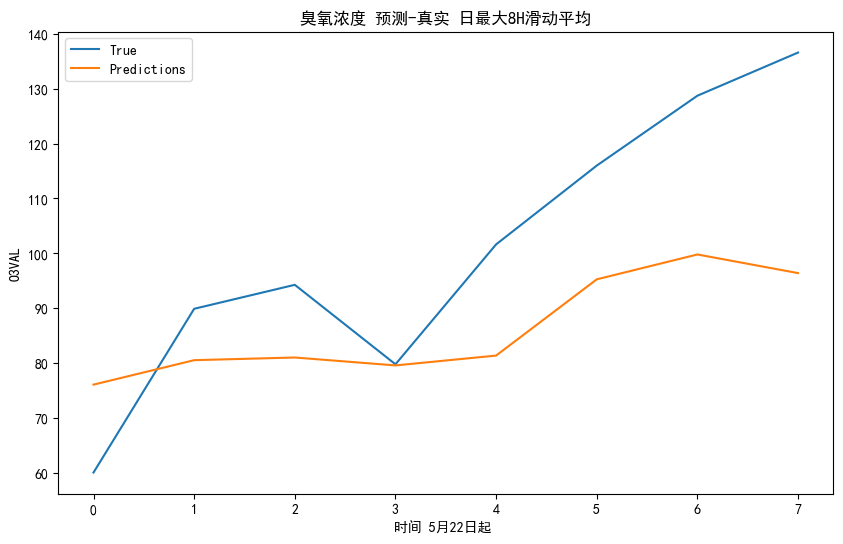

rmse: 21.855087041250997
r2 score: 0.1631875400884395
rmse: 13.136059316702482
r2 score: 0.2266530712135102
rmse: 13.177739004166819
r2 score: 0.250318419519441
rmse: 11.412716266109957
r2 score: 0.25238872220518527
rmse: 13.65625438300436
r2 score: 0.10187020582685313
rmse: 15.072502487444202
r2 score: 0.2567330050791474


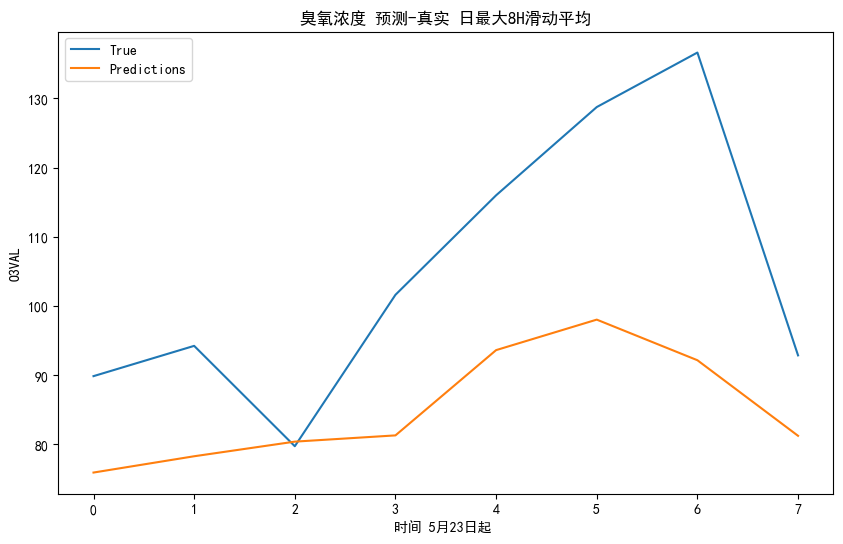

rmse: 23.493074569965305
r2 score: -0.5626999223474598
rmse: 14.972680241906806
r2 score: -45.84928598233056
rmse: 12.231127064766143
r2 score: -3.0565799031205163
rmse: 14.673700233725167
r2 score: -2.435203446877843
rmse: 16.501535778267435
r2 score: -0.8502930056411728
rmse: 19.598355269179404
r2 score: -0.4284544476498964


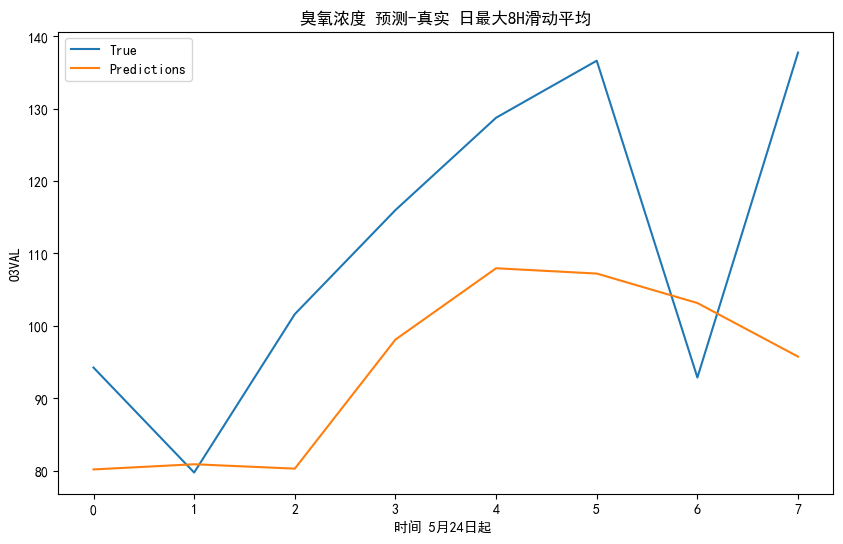

rmse: 22.747937314114647
r2 score: -0.2226872614514519
rmse: 9.982169918202901
r2 score: -0.8957187400879889
rmse: 14.76993548311196
r2 score: -1.6419194450394614
rmse: 15.607418770196244
r2 score: -0.4240319997049182
rmse: 16.772229326373928
r2 score: 0.026819080549098318
rmse: 19.453579053290834
r2 score: 0.024726337292912848


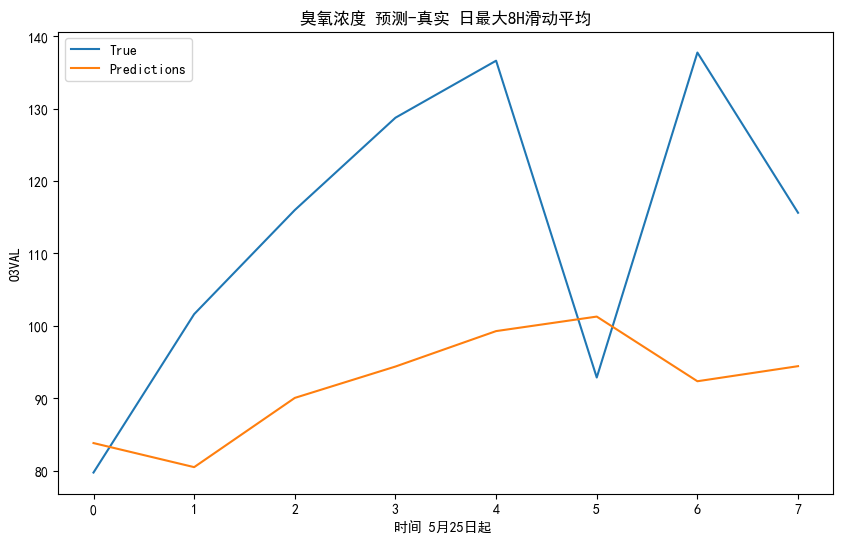

rmse: 28.041889339602193
r2 score: -1.0481134500654274
rmse: 15.214218007082533
r2 score: -0.9349205540950465
rmse: 19.45874915492415
r2 score: -0.704558977384717
rmse: 24.065286036035335
r2 score: -0.7488205899733889
rmse: 27.242931104992962
r2 score: -0.8109449256339214
rmse: 25.10531535308931
r2 score: -0.5944725286281611


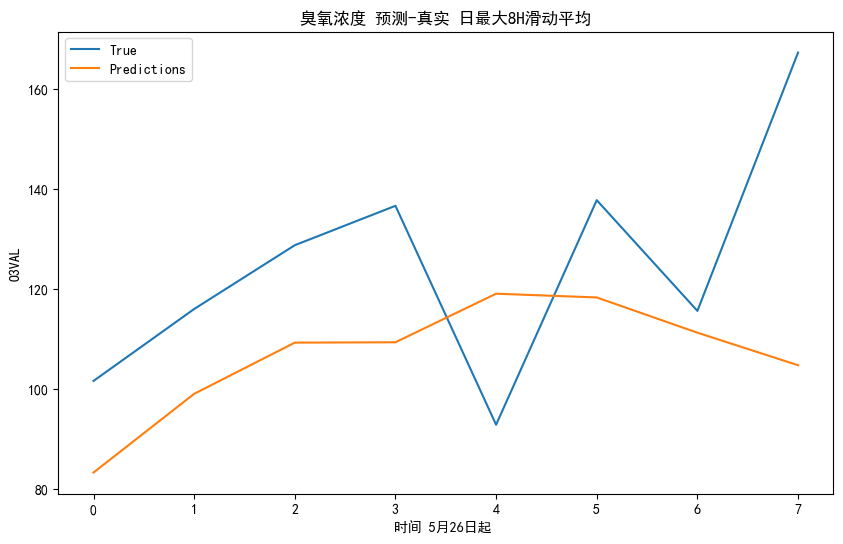

rmse: 29.008099287189193
r2 score: -0.7518788172815325
rmse: 17.639389599226078
r2 score: -5.022979565287033
rmse: 18.269778457408506
r2 score: -1.7186861564592593
rmse: 20.88752070625163
r2 score: -1.477702237034633
rmse: 22.04911073361796
r2 score: -0.8332553737853217
rmse: 21.63619881505135
r2 score: -0.6044058503245757


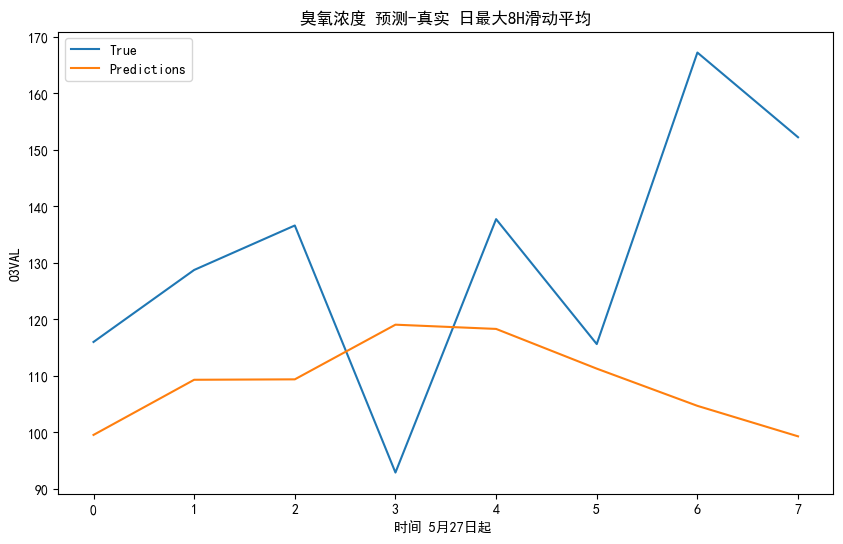

rmse: 33.8990236287951
r2 score: -1.4432316051566243
rmse: 18.015184647100934
r2 score: -6.985774772635538
rmse: 21.536080936557347
r2 score: -5.422193434612877
rmse: 22.787445458070863
r2 score: -0.8943542908122202
rmse: 22.15854172227072
r2 score: -0.7649446074762407
rmse: 20.30567883205748
r2 score: -0.7309463779562837


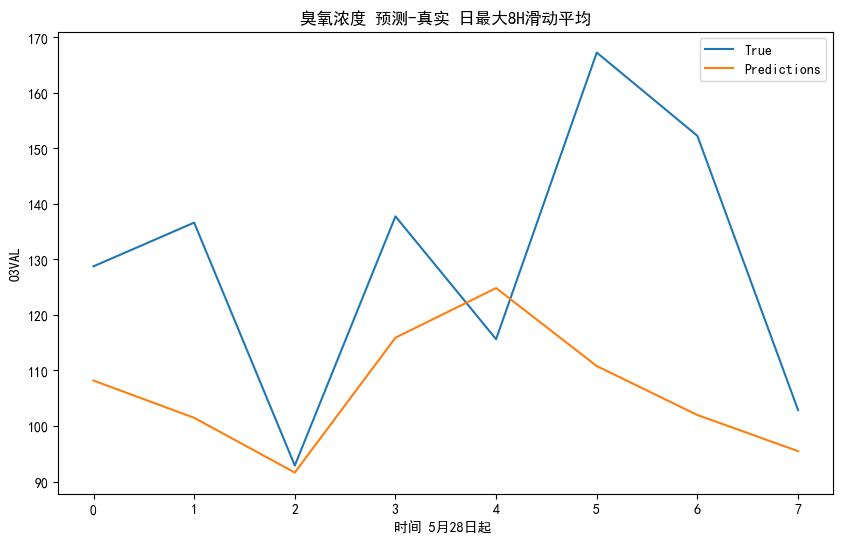

rmse: 31.608353316700427
r2 score: -0.8569060669147361
rmse: 28.799893546208718
r2 score: -52.498380014582104
rmse: 23.526285182662846
r2 score: -0.526580365784413
rmse: 23.119201779051146
r2 score: -0.5957754025904798
rmse: 21.0847300958596
r2 score: -0.5924057372391263
rmse: 30.028450419091097
r2 score: -0.757844466883659


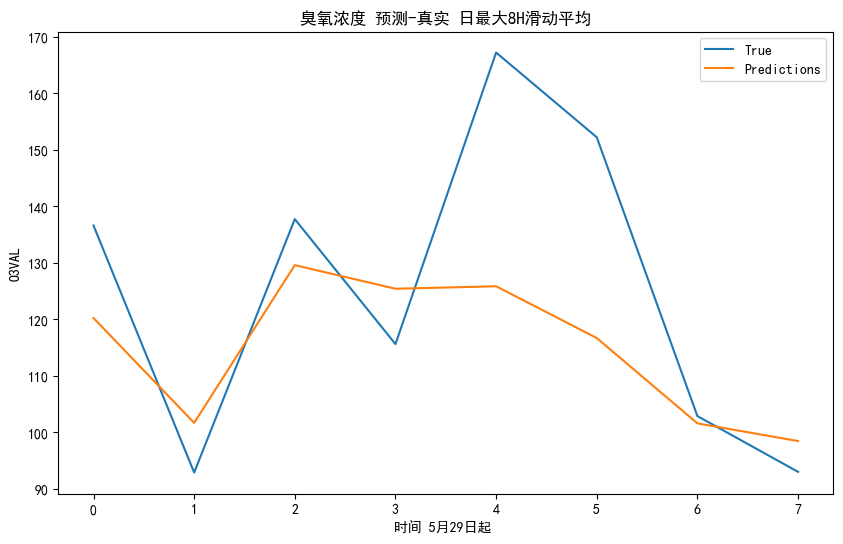

rmse: 20.964790565561437
r2 score: 0.35581842941693265
rmse: 13.149639984849783
r2 score: 0.6386470520556979
rmse: 11.721140930377745
r2 score: 0.6853049631640914
rmse: 11.270877835576451
r2 score: 0.6220089217527911
rmse: 21.07720100330523
r2 score: 0.2779780026146782
rmse: 24.09977840642429
r2 score: 0.000931282732839267


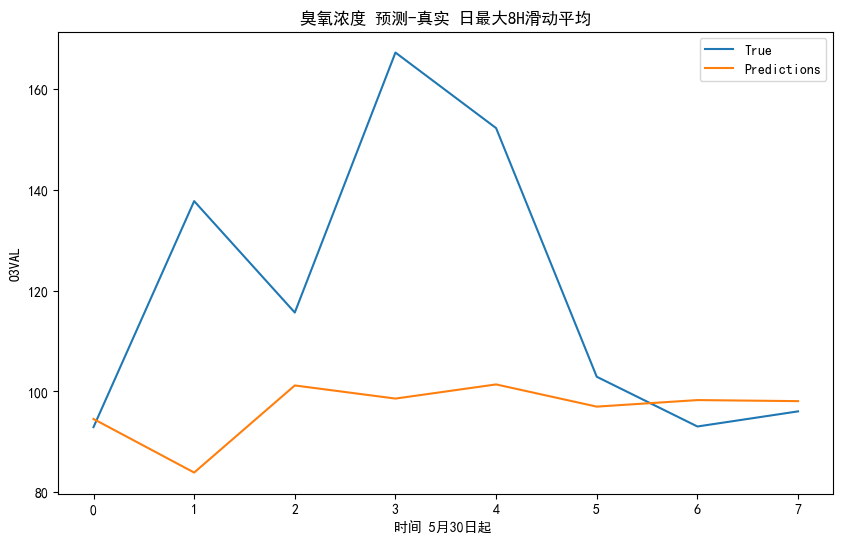

rmse: 36.21978571964245
r2 score: -0.7667862644806598
rmse: 38.12761392121745
r2 score: -1.8875553843569355
rmse: 32.23347242609765
r2 score: -2.095483075480477
rmse: 44.265400183175366
r2 score: -1.5935750042109622
rmse: 45.668731719949676
r2 score: -1.9983385576169184
rmse: 41.75992545484469
r2 score: -1.4667269499398676


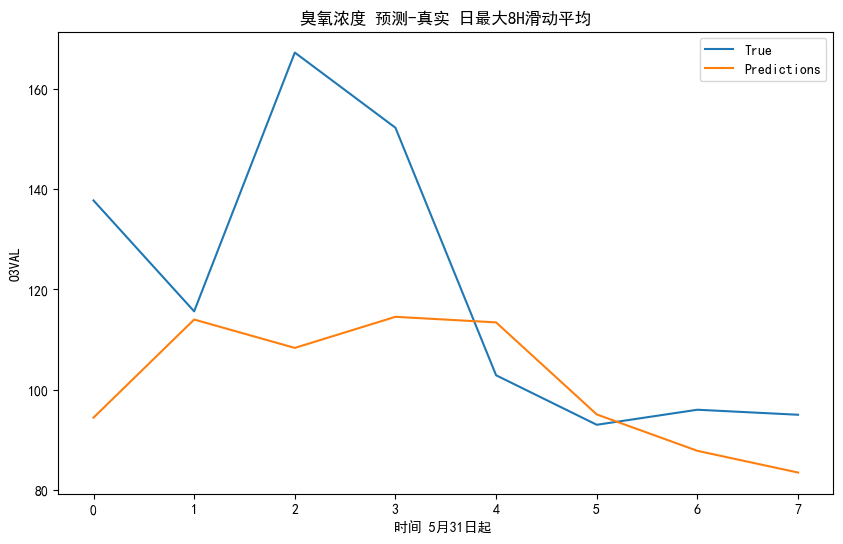

rmse: 29.768707122493783
r2 score: -0.2160039261785749
rmse: 30.660287882059105
r2 score: -6.681497423178191
rmse: 42.23532196693605
r2 score: -2.988764159378061
rmse: 41.15147119834493
r2 score: -3.6703229142850624
rmse: 37.10800475054695
r2 score: -1.5013867334547966
rmse: 33.88531034645007
r2 score: -0.6275184369599378


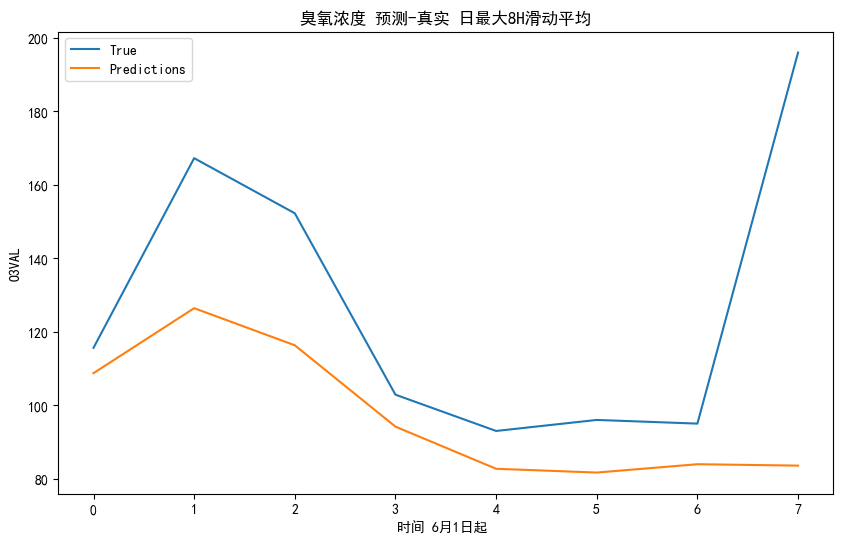

rmse: 44.938486421446726
r2 score: -0.4861960398489644
rmse: 29.280919285042707
r2 score: -0.2867947396617181
rmse: 31.6525223954215
r2 score: -1.1308928218204546
rmse: 27.754827863681438
r2 score: -0.12291792557768799
rmse: 25.24780046267801
r2 score: 0.22673759605854304
rmse: 23.77796461074504
r2 score: 0.3051118997113257


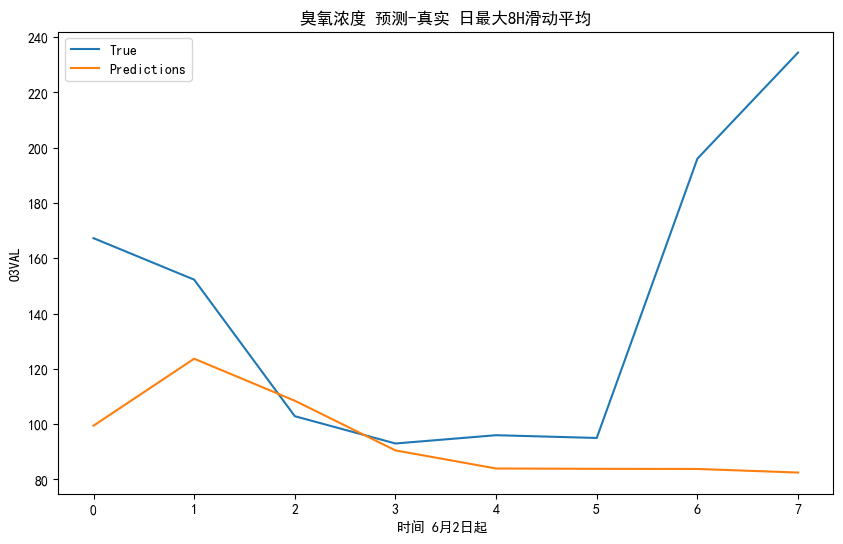

rmse: 71.91994245355141
r2 score: -1.023615621080391
rmse: 52.03668826404779
r2 score: -47.138967564261144
rmse: 42.610199775837664
r2 score: -1.4005563547884639
rmse: 36.92258794895376
r2 score: -0.36942520364231113
rmse: 33.46041543115879
r2 score: -0.1554143573682516
rmse: 30.882881220223567
r2 score: -0.047130087081193706


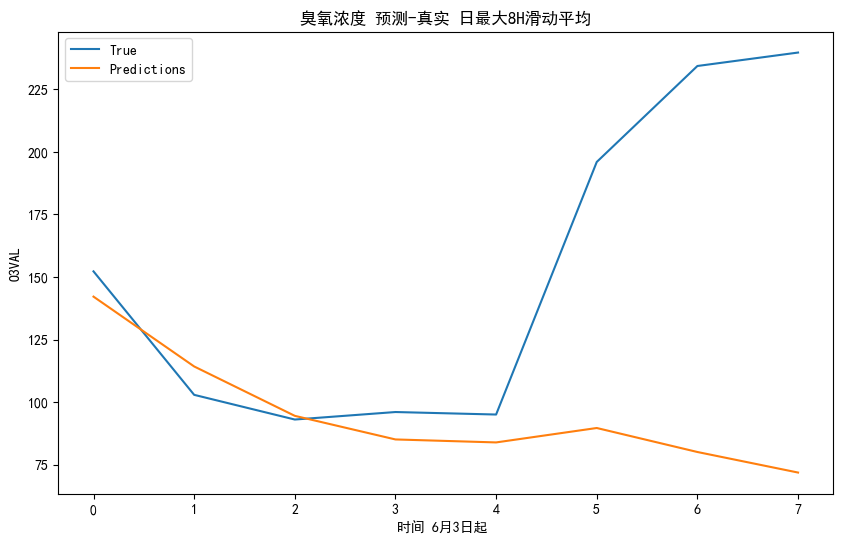

rmse: 89.32387851767072
r2 score: -1.2244047717908613
rmse: 10.745832160010071
r2 score: 0.8105363585602094
rmse: 8.815189108421071
r2 score: 0.8843249014221204
rmse: 9.39804738498335
r2 score: 0.8474932614970554
rmse: 9.774370083081275
r2 score: 0.8106033274435076
rmse: 44.33963635885479
r2 score: -0.3104940932391076


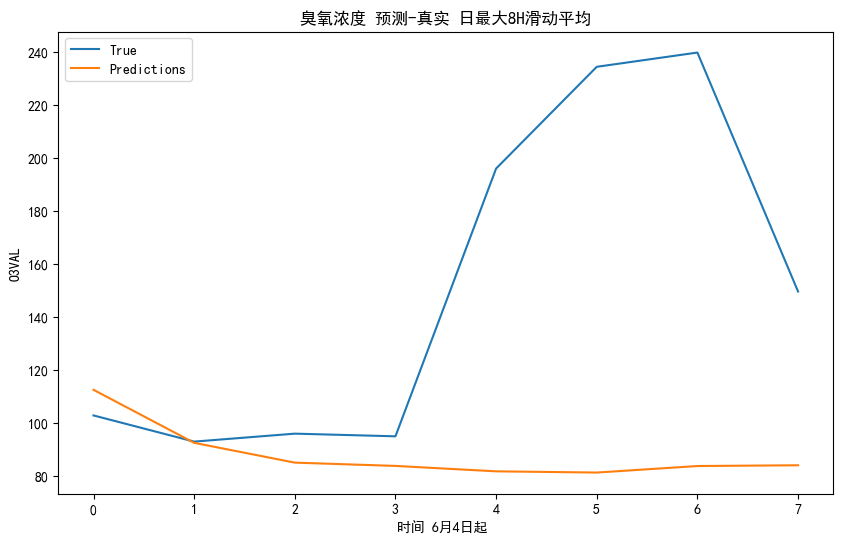

rmse: 90.4333662734104
r2 score: -1.2799835981066585
rmse: 6.840708167087843
r2 score: -0.9194990844703017
rmse: 8.427679849386092
r2 score: -3.1567622112171376
rmse: 9.189590075364503
r2 score: -5.119547896915681
rmse: 51.73446016503453
r2 score: -0.6852946599318024
rmse: 78.3213514023545
r2 score: -0.8870070662880913


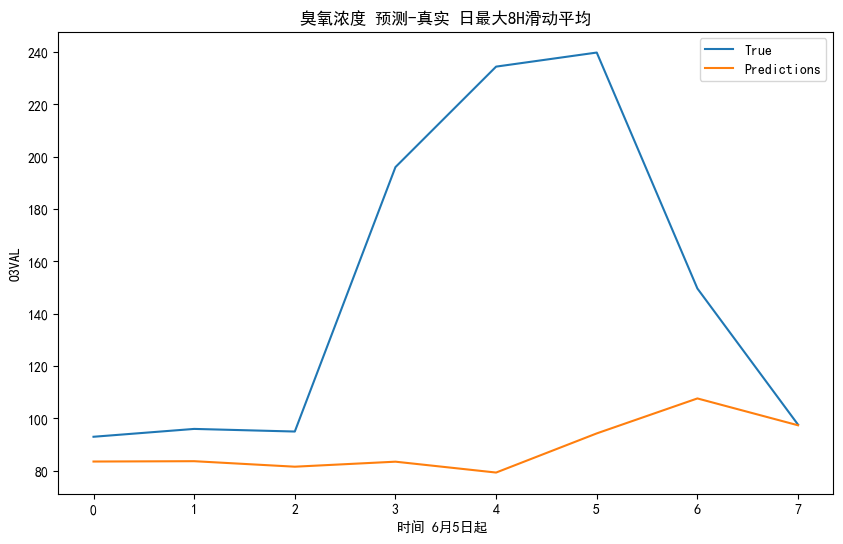

rmse: 86.63280325862057
r2 score: -1.0545950507371984
rmse: 10.989744051625928
r2 score: -52.67754414233221
rmse: 11.859511000008895
r2 score: -89.41657217385627
rmse: 57.187887746529626
r2 score: -0.6976145885853482
rmse: 86.16251487609743
r2 score: -1.042774557361696
rmse: 98.55544531059718
r2 score: -1.242196281325953


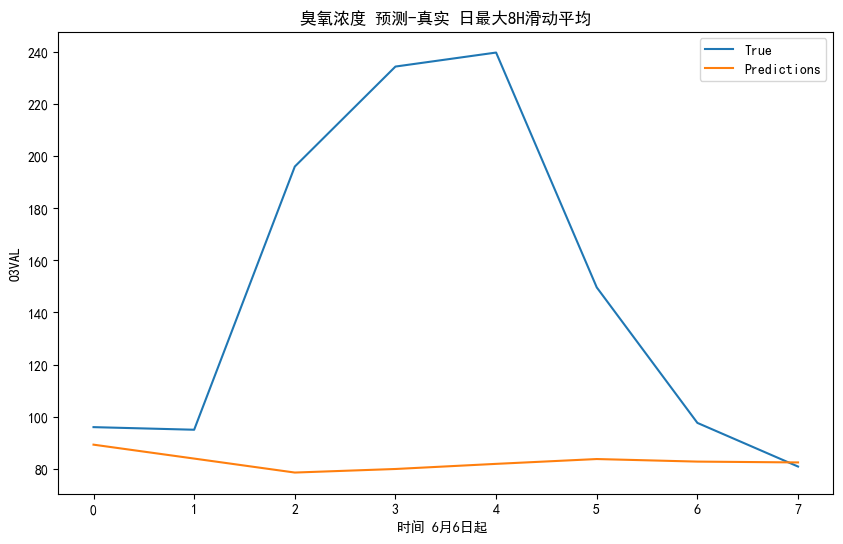

rmse: 91.70966506673273
r2 score: -1.1889724243829405
rmse: 9.157107578572205
r2 score: -334.410476822178
rmse: 68.20860021542826
r2 score: -1.0726521280137158
rmse: 97.22191453979626
r2 score: -1.510198418659396
rmse: 112.00315527378699
r2 score: -2.021153819045403
rmse: 105.72150326218865
r2 score: -2.1652406542713574


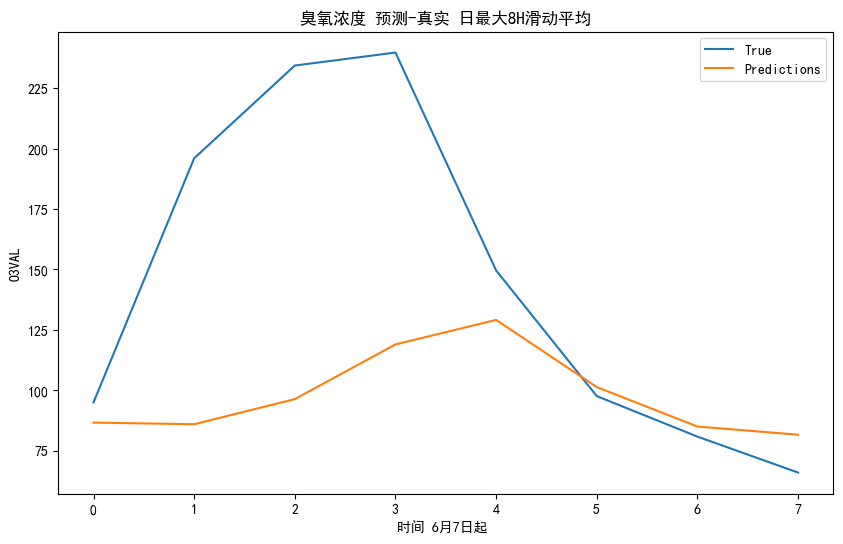

rmse: 76.23388878832063
r2 score: -0.34042397407777036
rmse: 78.01157427983182
r2 score: -1.386356522543954
rmse: 102.00517801709262
r2 score: -2.0112033499657263
rmse: 107.00188692243329
r2 score: -2.3927585558496123
rmse: 96.1421620397586
r2 score: -2.1045274734605455
rmse: 87.77855647066656
r2 score: -1.2063044649051715


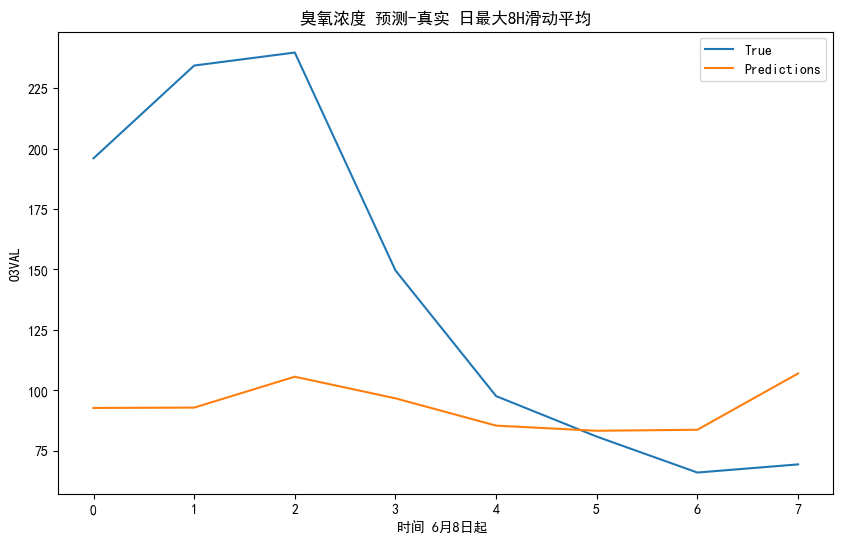

rmse: 81.66865391949831
r2 score: -0.41094052234304623
rmse: 123.87596484577958
r2 score: -40.68092175637982
rmse: 127.37761158803598
r2 score: -41.75259708648108
rmse: 113.44122439758902
r2 score: -8.865339435897305
rmse: 101.61180438788031
r2 score: -2.577451498602442
rmse: 92.76366172010833
r2 score: -1.2251773574414258


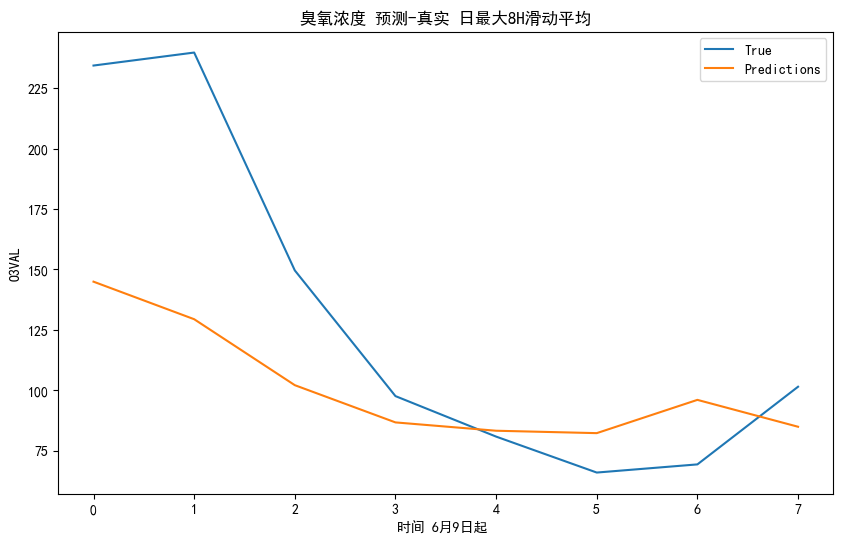

rmse: 54.53653654705777
r2 score: 0.3272732577523718
rmse: 100.40708435072571
r2 score: -1394.8275513684798
rmse: 86.44318806716323
r2 score: -3.385806699190943
rmse: 75.05938189818067
r2 score: -0.5831693906341235
rmse: 67.14389594455338
r2 score: -0.017687627813425033
rmse: 61.65408434841349
r2 score: 0.22905768431328555


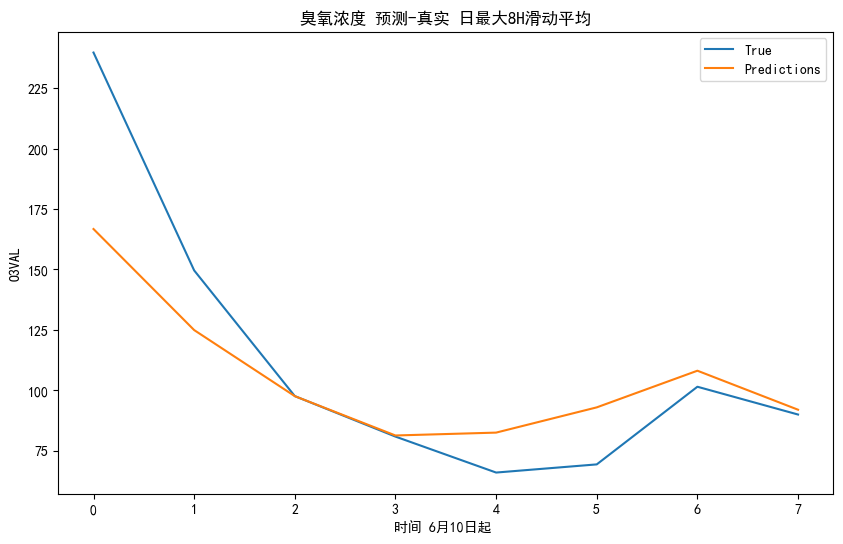

rmse: 29.189059221401713
r2 score: 0.709190480322623
rmse: 54.49045510578041
r2 score: -0.46221187362016103
rmse: 44.49127113460118
r2 score: 0.4257963991268344
rmse: 38.5312632819887
r2 score: 0.6123254814194052
rmse: 35.246592219427754
r2 score: 0.6884162318658793
rmse: 33.58598606735128
r2 score: 0.7015987271845918


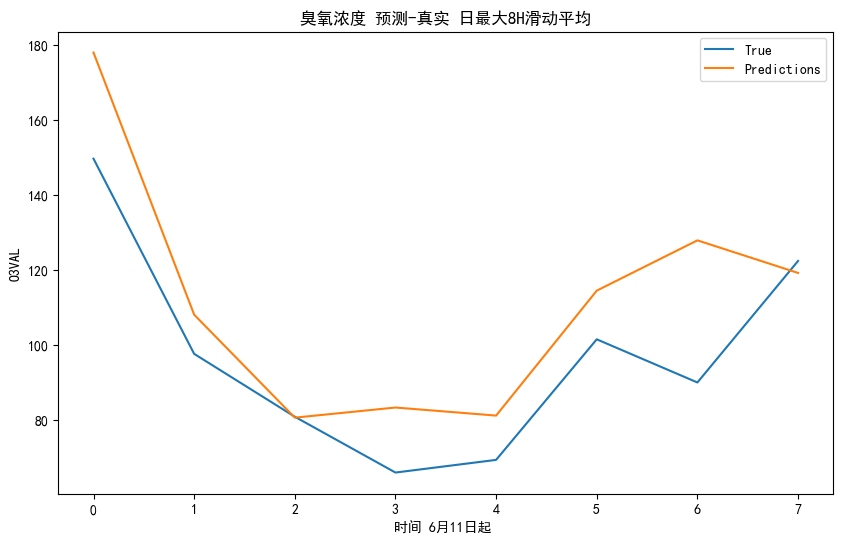

rmse: 19.236696404331894
r2 score: 0.45848004781998
rmse: 21.315770305488908
r2 score: 0.327866769650351
rmse: 17.40483193433602
r2 score: 0.646438934401615
rmse: 17.38483811949891
r2 score: 0.6963568268256237
rmse: 16.42088133707131
r2 score: 0.7107732844009804
rmse: 15.897343090492836
r2 score: 0.6791480280141855


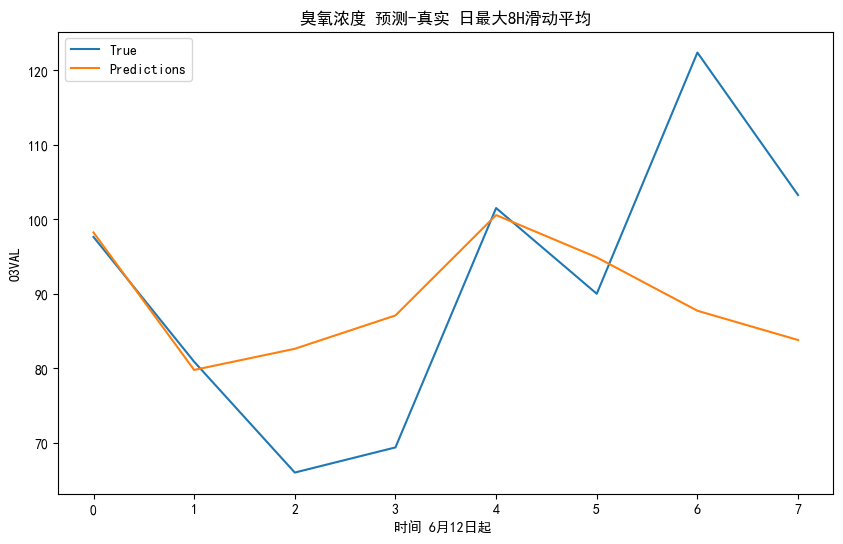

rmse: 16.567018158318458
r2 score: 0.11591777129621894
rmse: 0.886574235869067
r2 score: 0.9887937429170781
rmse: 9.618878519783081
r2 score: 0.44559071831214914
rmse: 12.158065800495955
r2 score: 0.03215441960798049
rmse: 10.882599940429785
r2 score: 0.42801817661625374
rmse: 10.13226741442886
r2 score: 0.42712159884600265


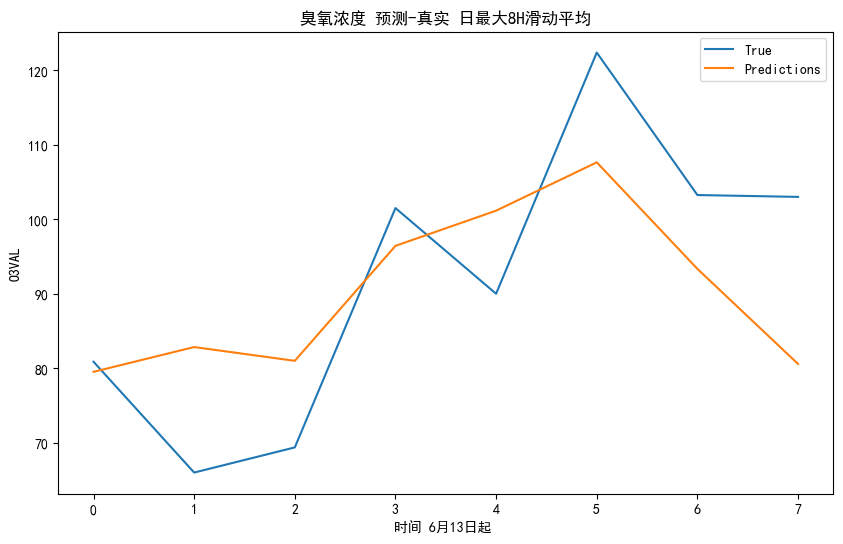

rmse: 13.175950392305555
r2 score: 0.46087117252236387
rmse: 11.949610631570371
r2 score: -1.5813895718531001
rmse: 11.840888661671936
r2 score: -2.458038328154147
rmse: 10.56356626313779
r2 score: 0.4207991191966922
rmse: 10.683473155118469
r2 score: 0.33633313036560064
rmse: 11.458879633651815
r2 score: 0.649663135054513


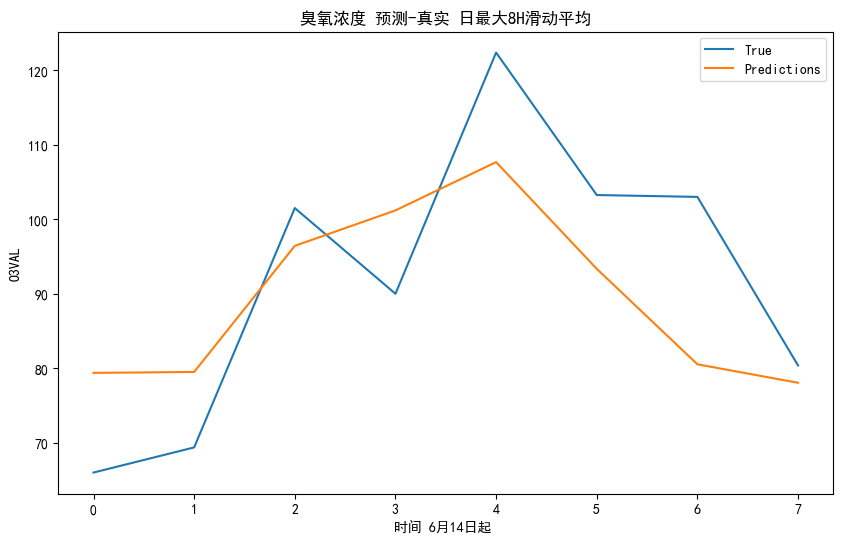

rmse: 12.535442578760518
r2 score: 0.5141615052007695
rmse: 11.865371828670638
r2 score: -48.439622016390075
rmse: 10.121098312497185
r2 score: 0.5997972008796448
rmse: 10.397540111865116
r2 score: 0.4967727522675781
rmse: 11.390461299717124
r2 score: 0.7026528233941254
rmse: 11.156425207195467
r2 score: 0.6796661634880458


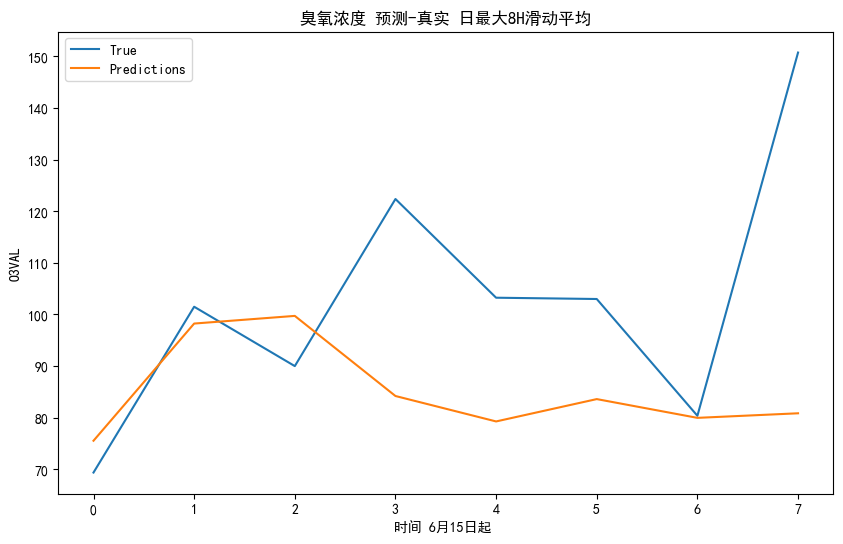

rmse: 30.488013472421702
r2 score: -0.6643605684269978
rmse: 4.930039096541781
r2 score: 0.9057948933925085
rmse: 6.9093333492770235
r2 score: 0.7297214501670504
rmse: 20.00067918637151
r2 score: -0.08803513548023889
rmse: 20.855841888226188
r2 score: -0.43563250183945246
rmse: 20.619226902972517
r2 score: -0.6543234799392619


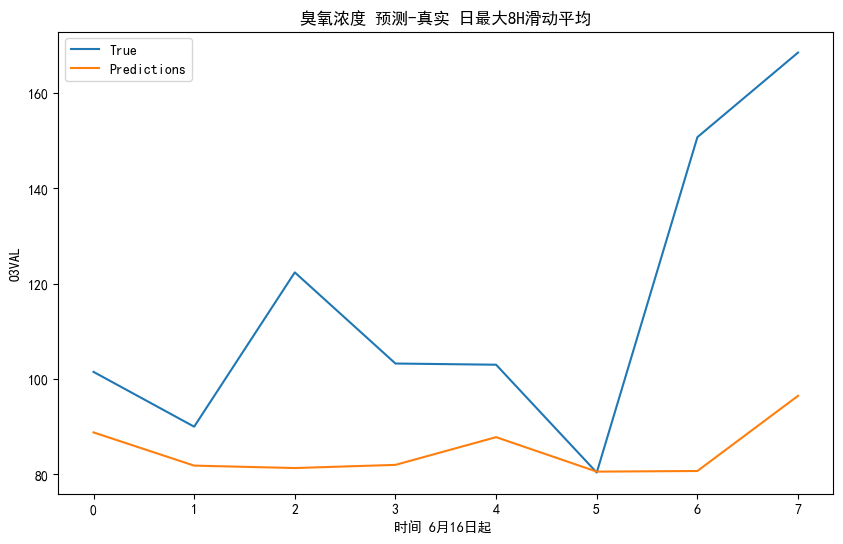

rmse: 39.82949825343128
r2 score: -0.9576292257718535
rmse: 10.678514004732147
r2 score: -2.4489424982763124
rmse: 25.255345836988017
r2 score: -2.551941490875533
rmse: 24.319346100278633
r2 score: -3.3798584633449344
rmse: 22.78914384746714
r2 score: -3.7958729088609235
rmse: 20.803697554133755
r2 score: -1.5772990146099723


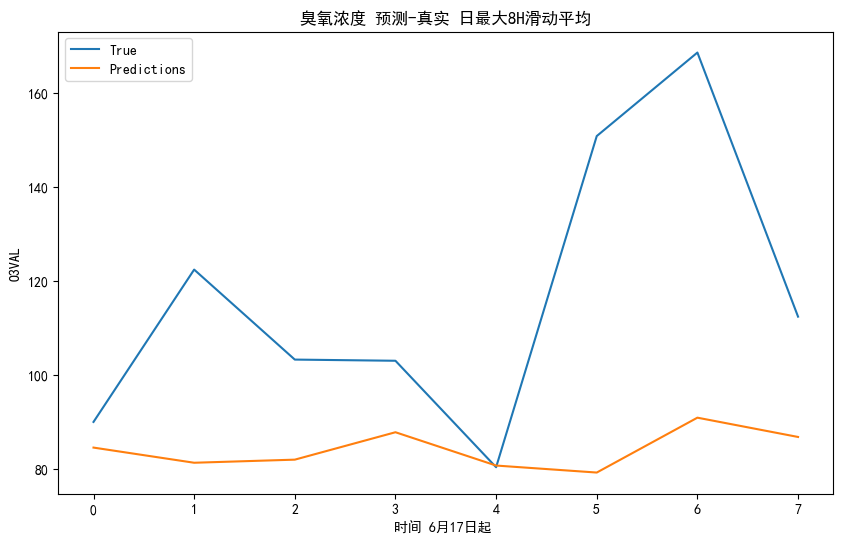

rmse: 42.10961933898242
r2 score: -1.2540566629042456
rmse: 29.28073846799176
r2 score: -2.271933650051709
rmse: 26.87593836752379
r2 score: -3.0899480208179204
rmse: 24.482996479577785
r2 score: -3.494388467667914
rmse: 21.898838296834207
r2 score: -1.3855250492822173
rmse: 35.38123362385854
r2 score: -1.3705971575446614


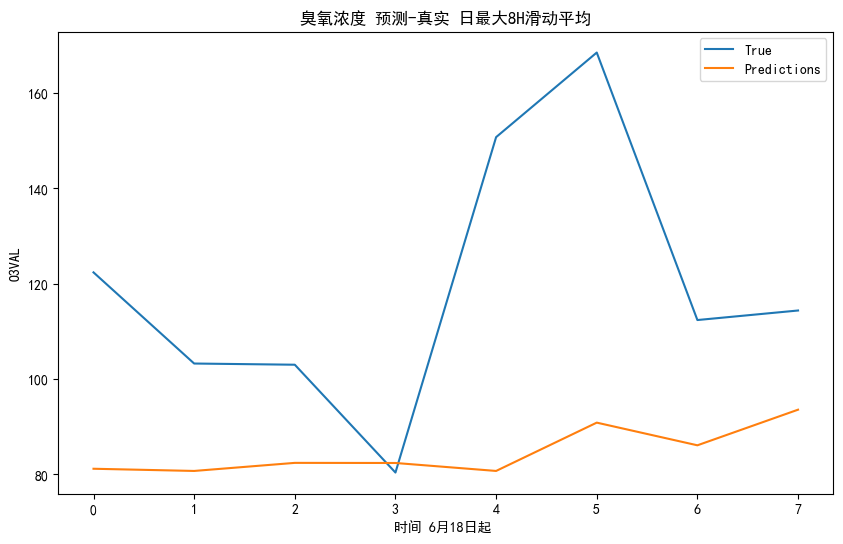

rmse: 42.85539223458405
r2 score: -1.6569937314584129
rmse: 33.20916365034466
r2 score: -11.060712926266627
rmse: 29.607601519089606
r2 score: -9.64394365282688
rmse: 25.660570634254473
r2 score: -1.9757972430629547
rmse: 38.83069893486846
r2 score: -1.7247580066462516
rmse: 47.554856891108486
r2 score: -1.4980218819414053


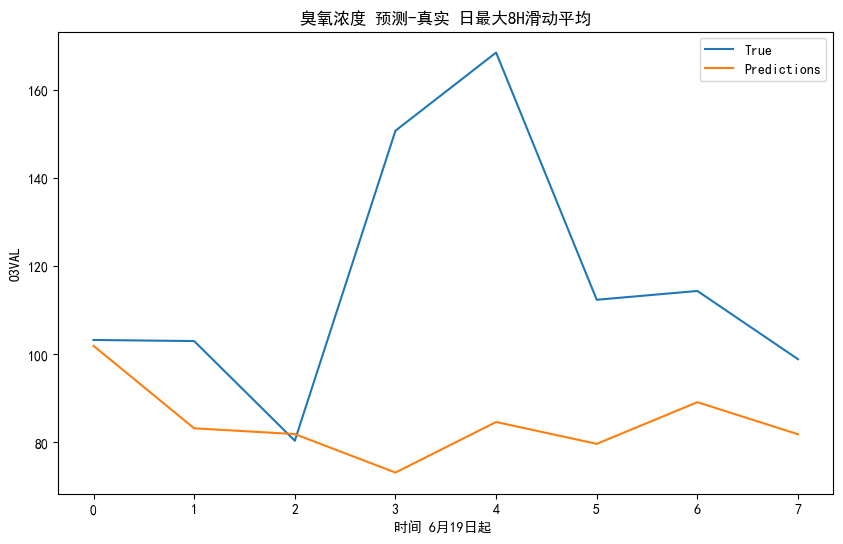

rmse: 43.94699840497506
r2 score: -1.6312375892848054
rmse: 14.034761035932576
r2 score: -12605.369109486799
rmse: 11.492470710285529
r2 score: -0.14825194891508375
rmse: 40.05631890124886
r2 score: -1.4393500265498789
rmse: 51.87077538756302
r2 score: -1.477231932224048
rmse: 49.19835159215887
r2 score: -1.6428537543478763


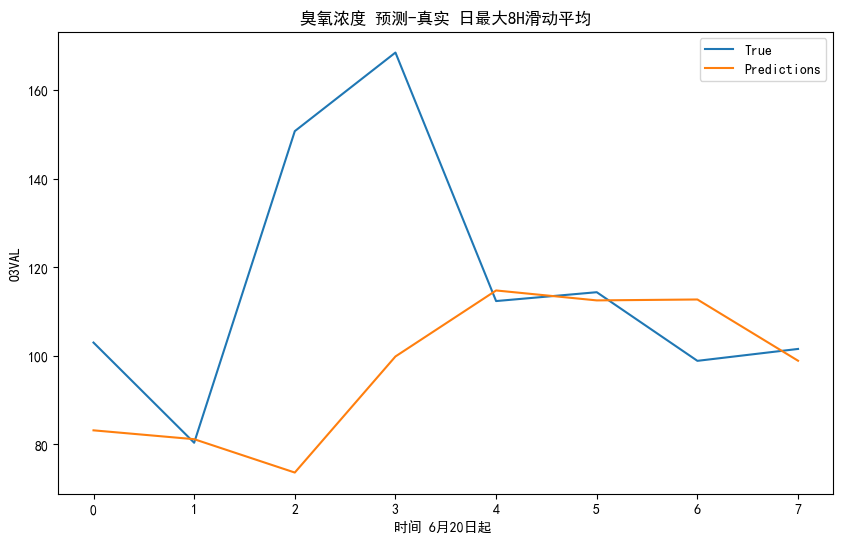

rmse: 37.51290744130374
r2 score: -0.9019576432019729
rmse: 14.026845910758155
r2 score: -0.5374566096353319
rmse: 45.965613506284875
r2 score: -1.455330678266039
rmse: 52.55828933257186
r2 score: -1.1971640532164964
rmse: 47.02175470314361
r2 score: -1.1383030195174002
rmse: 42.93143529062019
r2 score: -1.113621402396213


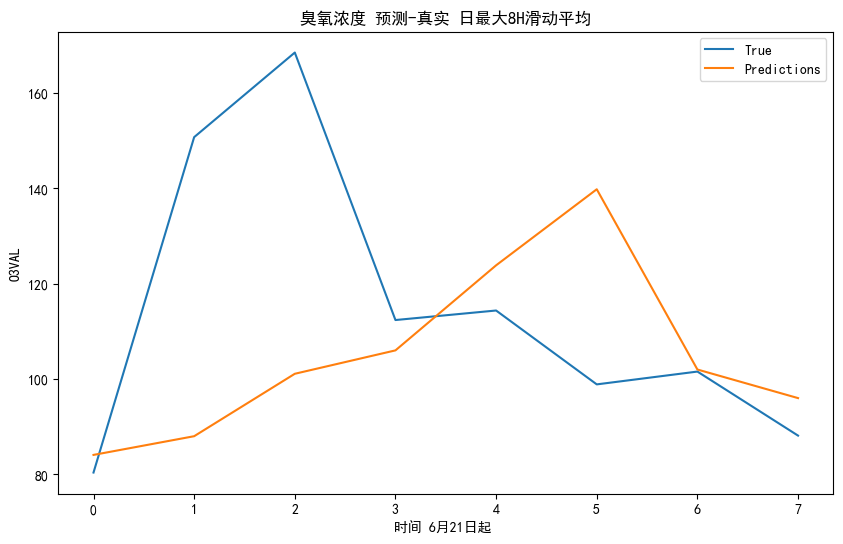

rmse: 35.99075916153008
r2 score: -0.5927564435350288
rmse: 44.44737141101465
r2 score: -0.5955680817028248
rmse: 53.210549913270725
r2 score: -0.9551030743742324
rmse: 46.19148872607409
r2 score: -0.8275038960243826
rmse: 41.53189642354191
r2 score: -0.7898312614107172
rmse: 41.433771896493695
r2 score: -0.907718042409575


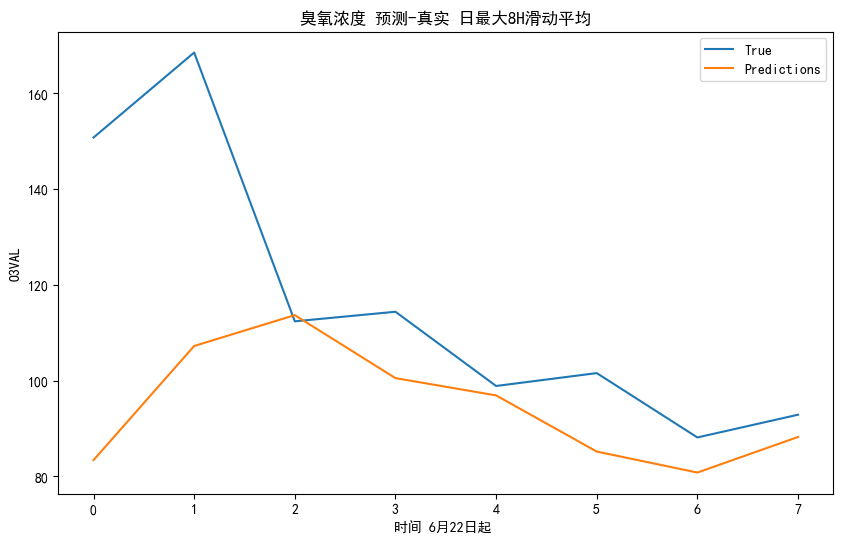

rmse: 33.2275754465342
r2 score: -0.5246865857138139
rmse: 64.3863132731202
r2 score: -51.63206299581033
rmse: 52.576514341261905
r2 score: -4.038482344198375
rmse: 46.05694900501901
r2 score: -2.691374435610331
rmse: 41.20397250611128
r2 score: -1.4740815739593809
rmse: 38.20391533748799
r2 score: -1.1583841762934934


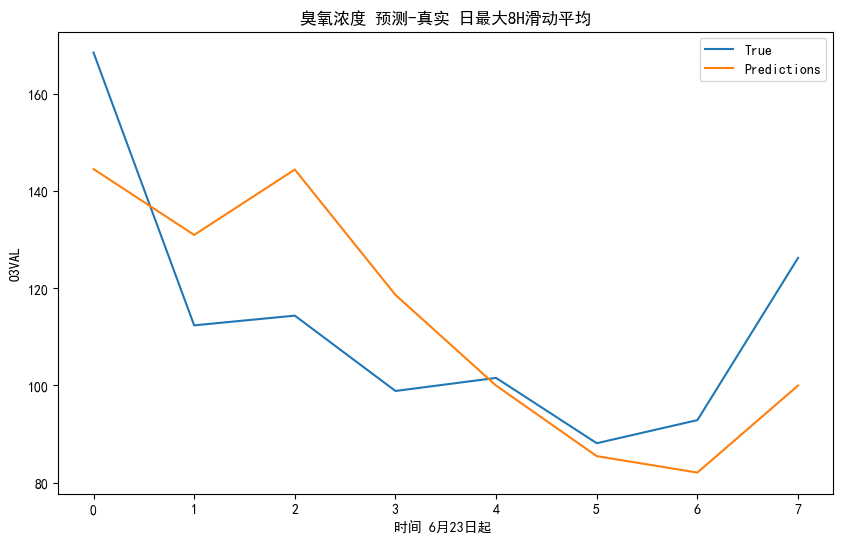

rmse: 19.460105527790304
r2 score: 0.34312177858980764
rmse: 21.45437211711865
r2 score: 0.41550755585245946
rmse: 24.654706076485724
r2 score: 0.1007376208577676
rmse: 23.526756399456566
r2 score: 0.21997637730129238
rmse: 21.054824401047945
r2 score: 0.3126018718933422
rmse: 19.251032908227256
r2 score: 0.4476863668804131


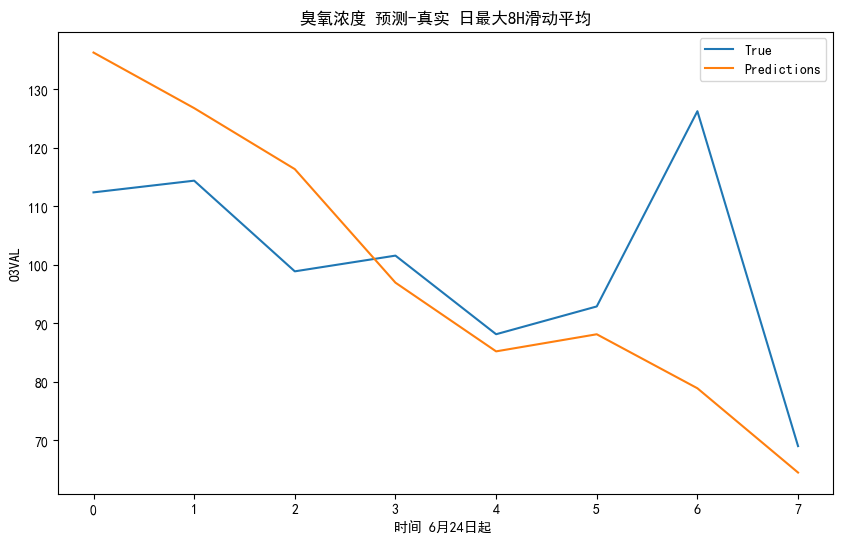

rmse: 20.453369460040562
r2 score: -0.5185765886644351
rmse: 19.04063017723161
r2 score: -361.545597546103
rmse: 18.533387183829372
r2 score: -6.248248451469115
rmse: 16.21597561108747
r2 score: -4.886076142673498
rmse: 14.56303405743945
r2 score: -1.3172816439582489
rmse: 13.435248765357828
r2 score: -0.9905190544241329


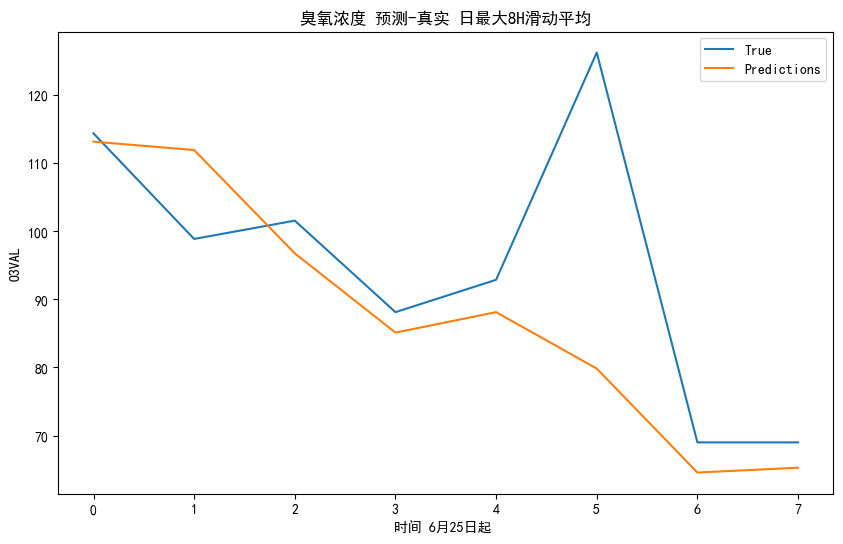

rmse: 17.371392281882354
r2 score: 0.14204687553581985
rmse: 9.271822571226302
r2 score: -0.43128730559503015
rmse: 8.062480834294394
r2 score: -0.42124815385138903
rmse: 7.142226076407049
r2 score: 0.4156871836353666
rmse: 6.73183662536527
r2 score: 0.431571281046615
rmse: 19.919287074691773
r2 score: -1.3569435683846813


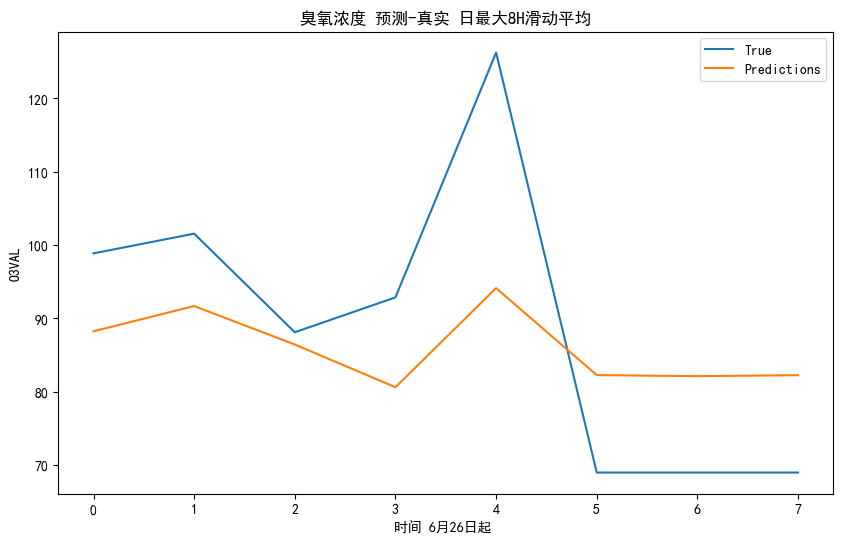

rmse: 15.488086584731809
r2 score: 0.32848177845135695
rmse: 10.25180338546614
r2 score: -57.20544077769449
rmse: 8.425809184218865
r2 score: -1.1062965307119619
rmse: 9.525379255021175
r2 score: -2.319089348164631
rmse: 16.69650593818264
r2 score: -0.5971314797296883
rmse: 16.17766276873206
r2 score: 0.1052275299590858


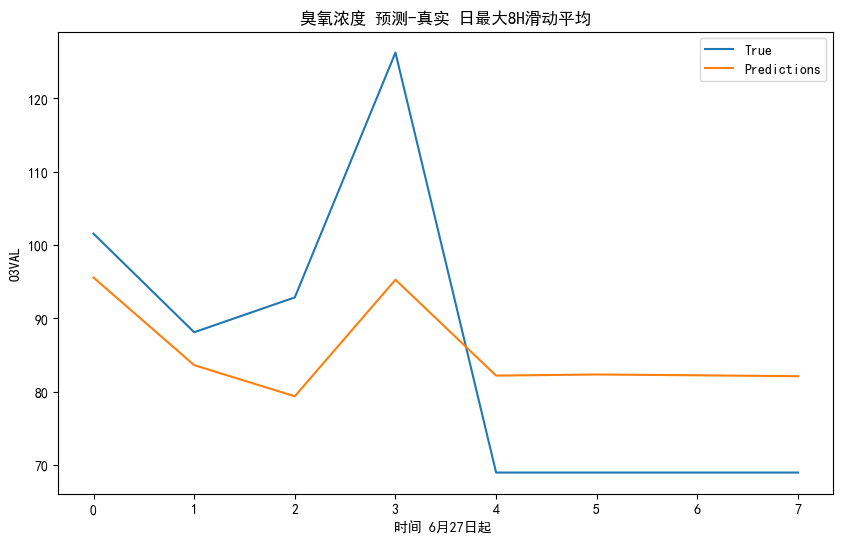

rmse: 15.401853189353425
r2 score: 0.381595994224469
rmse: 5.283706590846315
r2 score: 0.3815559401564421
rmse: 8.896614841533397
r2 score: -1.556869366973959
rmse: 17.293234885815547
r2 score: -0.38472655491139696
rmse: 16.55839858748702
r2 score: 0.2147549926139145
rmse: 16.070222179975026
r2 score: 0.336056149185215


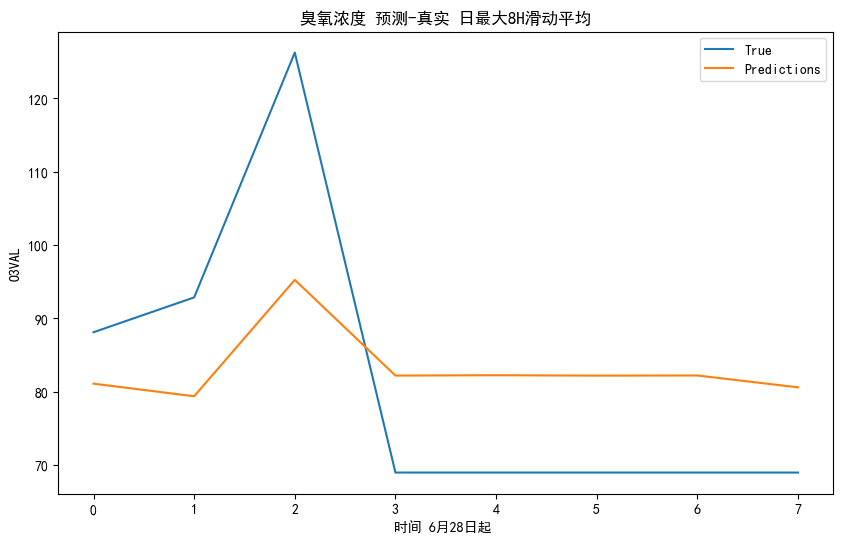

rmse: 15.913378624911525
r2 score: 0.31490494463239516
rmse: 10.741412282982
r2 score: -19.45481446346753
rmse: 19.92314305267743
r2 score: -0.3793157395729345
rmse: 18.476159063363628
r2 score: 0.19717119274538353
rmse: 17.558289222529496
r2 score: 0.30039225735577557
rmse: 16.911168687632642
r2 score: 0.32399510507311857


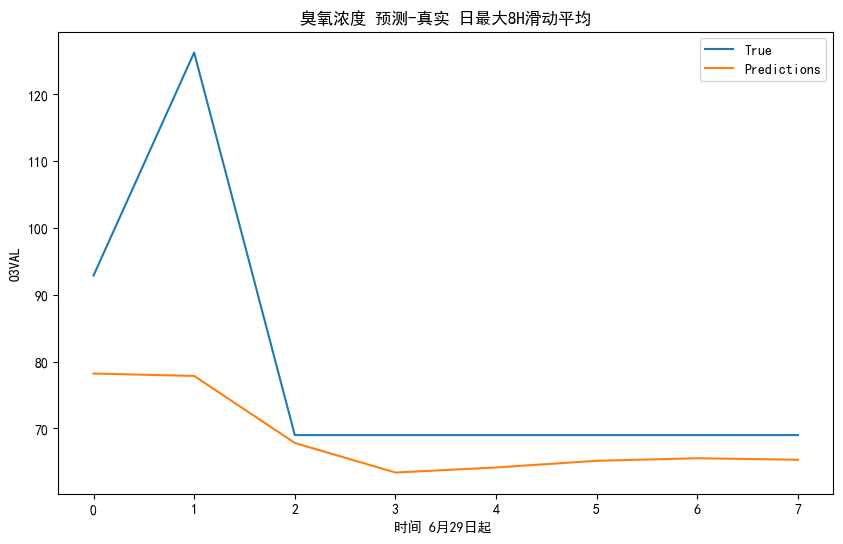

rmse: 18.212665112998355
r2 score: 0.12275054127681617
rmse: 35.756079468886014
r2 score: -3.591105052115119
rmse: 29.20260633878445
r2 score: -0.546947152050917
rmse: 25.44495386044007
r2 score: -0.1759650026108852
rmse: 22.86147806478888
r2 score: -0.03235890157688792
rmse: 20.928512559180252
r2 score: 0.044601254213444186


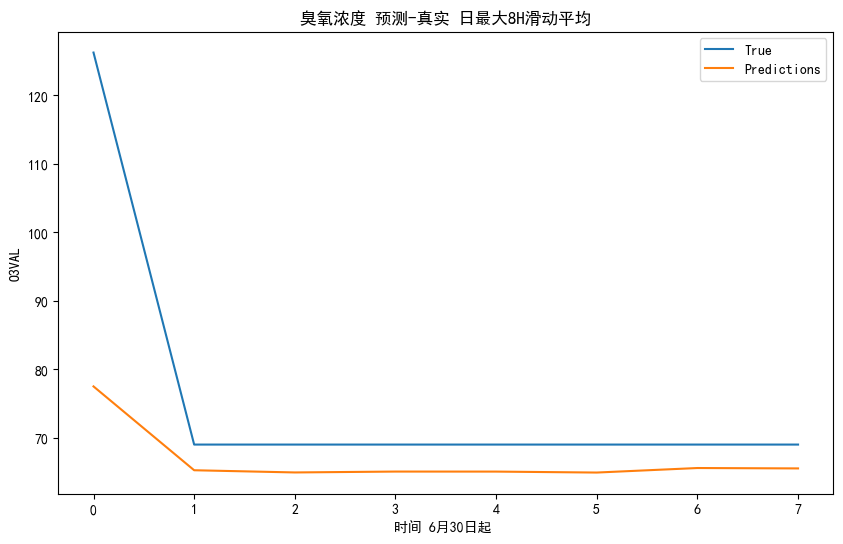

rmse: 17.6055840616971
r2 score: 0.1353669611913073
rmse: 34.578790986284886
r2 score: -0.459246358930671
rmse: 28.3311624454368
r2 score: -0.10202214139128629
rmse: 24.614580113969787
r2 score: 0.014100583691631474
rmse: 22.086598159190583
r2 score: 0.06977781078629153
rmse: 20.23111715425857
r2 score: 0.1008725754498303


In [63]:
# 创建滑动窗口计算平均值的函数
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def sliding_window_average(data, window_size):
    # 保存滑动平均值的列表
    averaged_data = []
    # 用滑动窗口计算平均值
    len1 = len(data)
    for i in range(len1 - window_size + 1):
        avg = np.mean(data[i:i + window_size])
        averaged_data.append(avg)
    return averaged_data


def max_values(data, interval):
    averaged_data = []
    for i in range(0, len(data), 24):
        avg = max(data[i:i+interval])
        averaged_data.append(avg)
    return averaged_data

# 使用滑动窗口大小为8来计算滑动平均值
window_size = 8
for i in range(len(df_list)):
    y_test_sw_avg_8 = sliding_window_average(y_list[i].values, window_size)
    y_pred_sw_avg_8 = sliding_window_average(y_pred_list[i], window_size)
    y_test_sw_max_8 = max_values(y_test_sw_avg_8, 16)
    y_pred_sw_max_8 = max_values(y_pred_sw_avg_8, 16)   
    plt.figure(figsize=(10, 6))
    # 绘制每8小时为单位的滑动平均图像
    plt.title("臭氧浓度 预测-真实 日最大8H滑动平均")
    plt.plot(y_test_sw_max_8, label='True')
    plt.plot(y_pred_sw_max_8, label='Predictions')
    if 9+i <= 31:
        plt.xlabel('时间 5月'+str(9+i)+'日起 ')
    else:
        plt.xlabel('时间 6月'+str(9+i-31)+'日起 ')
    plt.ylabel('O3VAL')
    plt.legend()

    # for i in range(0, 32, 2):
    #     plt.text(i, y_test_sw_max_8[i], f'{y_test_sw_max_8[i]:.2f}', color='blue', fontsize=8, ha='right')
    #     plt.text(i, y_pred_sw_max_8[i], f'{y_pred_sw_max_8[i]:.2f}', color='orange', fontsize=8, ha='left')
    plt.show()

    print("rmse:", math.sqrt(mean_squared_error(y_test_sw_max_8, y_pred_sw_max_8)))
    print("r2 score:", r2_score(y_test_sw_max_8, y_pred_sw_max_8))
    print("rmse:", math.sqrt(mean_squared_error(y_test_sw_max_8[:2], y_pred_sw_max_8[:2])))
    print("r2 score:", r2_score(y_test_sw_max_8[:2], y_pred_sw_max_8[:2]))
    print("rmse:", math.sqrt(mean_squared_error(y_test_sw_max_8[:3], y_pred_sw_max_8[:3])))
    print("r2 score:", r2_score(y_test_sw_max_8[:3], y_pred_sw_max_8[:3]))
    print("rmse:", math.sqrt(mean_squared_error(y_test_sw_max_8[:4], y_pred_sw_max_8[:4])))
    print("r2 score:", r2_score(y_test_sw_max_8[:4], y_pred_sw_max_8[:4]))
    print("rmse:", math.sqrt(mean_squared_error(y_test_sw_max_8[:5], y_pred_sw_max_8[:5])))
    print("r2 score:", r2_score(y_test_sw_max_8[:5], y_pred_sw_max_8[:5]))
    print("rmse:", math.sqrt(mean_squared_error(y_test_sw_max_8[:6], y_pred_sw_max_8[:6])))
    print("r2 score:", r2_score(y_test_sw_max_8[:6], y_pred_sw_max_8[:6]))

# print("\ny_pred_sw_max_8   y_test_sw_max_8 ")
# for i in range(0,15):
#     print(y_pred_sw_max_8[i] , y_test_sw_max_8[i])